In [1]:
# @title Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from datetime import datetime, timedelta
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
from matplot2tikz import save

In [ ]:
# @title Utils for saving figures


def save_for_latex(filename_base, use_tikz=True, use_pdf=True):
    """
    Save matplotlib figure in multiple formats optimized for LaTeX
    
    Parameters:
    - filename_base: base filename without extension
    - use_tikz: whether to generate TikZ code
    - use_pdf: whether to save as PDF vector format
    """
    
    if use_pdf:
        # Save as vector PDF (recommended)
        plt.savefig(f'{filename_base}.pdf', format='pdf', bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        print(f"PDF saved: {filename_base}.pdf")
    
    if use_tikz:
        # Generate TikZ code for LaTeX
        save(f'{filename_base}.tex', 
                        figurewidth='\\textwidth',  # or '\\columnwidth' for two-column
                        figureheight='\\textheight',
                        strict=True)
        print(f"TikZ code saved: {filename_base}.tex")

# Example: Updated engagement plot function with LaTeX export
def plot_engagement_by_error_latex(results_df):
    """Plot engagement types for each error with LaTeX optimization"""
    
    # Define engagement type labels
    engagement_labels = {
        1: "Engages with robot",
        2: "Disengages from robot", 
        3: "Engages then disengages",
        4: "Disengages then engages",
        5: "Mixed engagement",
        None: "No relevant reactions"
    }
    
    # Configure matplotlib for LaTeX
    plt.rcParams.update({
        'font.family': 'serif',
        'font.arial': ['Computer Modern Roman'],
        'text.usetex': False,  # Set to True if you have LaTeX installed
        'font.size': 12,  # Use smaller base font size for LaTeX
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 10,
        'figure.titlesize': 16
    })
    
    # Create figure with appropriate size for LaTeX (in inches)
    fig, ax = plt.subplots(figsize=(6.5, 4))  # Typical column width
    
    errors = [1, 2, 3]
    engagement_types = [1, 2, 3, 4, 5, None]
    colors = ['#7B9BD1', '#D8A7CA', '#B8D17B', '#F0D862', '#DDA0DD', '#D3D3D3']
    
    # Count engagement types for each error
    error_counts = {}
    for error in errors:
        col_name = f'error_{error}'
        counts = results_df[col_name].value_counts()
        error_counts[error] = counts
    
    # Filter out engagement types that have zero counts
    active_types = []
    active_colors = []
    active_labels = []
    
    for eng_type, color in zip(engagement_types, colors):
        total_count = sum(error_counts[error].get(eng_type, 0) for error in errors)
        if total_count > 0:
            active_types.append(eng_type)
            active_colors.append(color)
            active_labels.append(engagement_labels[eng_type])
    
    # Create grouped bar chart
    x = np.arange(len(errors))
    width = 0.15
    
    for i, (eng_type, color, label) in enumerate(zip(active_types, active_colors, active_labels)):
        counts = []
        for error in errors:
            count = error_counts[error].get(eng_type, 0)
            counts.append(count)
        
        ax.bar(x + i * width, counts, width, label=label, color=color, alpha=0.8, 
               edgecolor='black', linewidth=0.5)
        
        # Add value labels on bars (smaller font for LaTeX)
        for j, count in enumerate(counts):
            if count > 0:
                ax.text(x[j] + i * width, count + 0.5, str(count), 
                       ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_ylabel('Number of Participants')
    ax.set_xticks(x + width * (len(active_types)-1) / 2)
    ax.set_xticklabels(['Error I', 'Error II', 'Error III'])
    
    # Position legend below plot
    ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2, frameon=False)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save in multiple formats for LaTeX
    save_for_latex('plots/engagement_types_latex', use_tikz=True, use_pdf=True)
    
    plt.show()

# Function to update all your existing plots for LaTeX
def update_plot_for_latex():
    """Update matplotlib settings for LaTeX compatibility"""
    
    # LaTeX-optimized settings
    latex_settings = {
        'font.family': 'arial',
        'font.arial': ['Computer Modern Roman'],
        'text.usetex': False,  # Change to True if you have LaTeX installed
        'axes.unicode_minus': False,
        'font.size': 11,
        'axes.labelsize': 12,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'legend.fontsize': 10,
        'lines.linewidth': 1.0,
        'patch.linewidth': 0.5,
        'axes.linewidth': 0.8,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'figure.dpi': 100,  # For screen display
        'savefig.dpi': 300,  # For saving
        'savefig.format': 'pdf'  # Default to PDF
    }
    
    plt.rcParams.update(latex_settings)
    return latex_settings

# Example usage:
# update_plot_for_latex()
# plot_engagement_by_error_latex(results_df)

# For your existing functions, just change the save line:
def save_with_latex_optimization(filename_base):
    """Quick function to save current figure for LaTeX"""
    
    # Save as PDF (vector)
    plt.savefig(f'{filename_base}.pdf', format='pdf', bbox_inches='tight', 
               facecolor='white', edgecolor='none', dpi=300)
    
    # Optionally save as TikZ
    try:
        save(f'{filename_base}.tex', figurewidth='\\columnwidth')
        print(f"Both PDF and TikZ saved for {filename_base}")
    except Exception as e:
        print(f"PDF saved, TikZ failed: {e}")

# Usage in your existing code:
# Instead of: plt.savefig('plots/figure.png', format='png', dpi=500, bbox_inches='tight')
# Use: save_with_latex_optimization('plots/figure')

In [3]:
# @title Data Preprocessing


data = pd.read_csv('processed_codes.csv')


participants_excluded = ['P1','P15','P18','P31','P34','P39','P40','P45']

data = data[~data['participant_id'].isin(participants_excluded)]
print(f"After exclusion, {data['participant_id'].nunique()} participants remain.")
#print subcodes present
#print(f"Subcodes present: {data['subcode'].unique()}")

#remove "group" == quote
data = data[data['code_group'] != 'quote']
print(f"After removing 'quote' group, {data.shape[0]} rows remain.")    

#remove nan subcodes
data = data[~data['subcode'].isna()]
print(f"After removing NaN subcodes, {data.shape[0]} rows remain.")

#remove all codes, for each participant, that occur before "initialprompt" subcode
new_data = pd.DataFrame()
for pid in data['participant_id'].unique():
    participant_data = data[data['participant_id'] == pid]
    if 'initialprompt' in participant_data['subcode'].values:
        initial_prompt_time = participant_data[participant_data['subcode'] == 'initialprompt']['start'].min()
        print(f"Participant {pid} initialprompt at {initial_prompt_time}")
        new_data = pd.concat([new_data, data[(data['participant_id'] == pid) & (data['start'] >= initial_prompt_time)]])
        print()
    elif "7alldone_callisabel" in participant_data['subcode'].values:
        alldone_time = participant_data[participant_data['subcode'] == '7alldone_callisabel']['start'].min()
        print(f"Participant {pid} has no initialprompt code, but has 7alldone_callisabel at {alldone_time}. Removing all codes.")
        new_data = pd.concat([new_data, data[(data['participant_id'] == pid) & (data['start'] >= alldone_time)]])
        print()
    else:
        print(f"Participant {pid} has no initialprompt code.")

    if "6robotsmoreorless" in participant_data['subcode'].values:
        #remove that row
        robotsmoreorless_time = participant_data[participant_data['subcode'] == '6robotsmoreorless']['start'].min()
        #remove row
        print(f"Participant {pid} has 6robotsmoreorless at {robotsmoreorless_time}. Removing that row.")
        new_data = new_data[~((new_data['participant_id'] == pid) & (new_data['subcode'] == '6robotsmoreorless'))]

    if "5likelessvideo" in participant_data['subcode'].values:
        #remove that row
        likelessvideo_time = participant_data[participant_data['subcode'] == '5likelessvideo']['start'].min()
        #remove row
        print(f"Participant {pid} has 5likelessvideo at {likelessvideo_time}. Removing that row.")
        new_data = new_data[~((new_data['participant_id'] == pid) & (new_data['subcode'] == '5likelessvideo'))]
print(f"After removing codes before 'initialprompt', {new_data.shape[0]} rows remain.")
data = new_data.copy()


#REMOVE INITIAL PROMPT AND CALL ISABEL CODES
data = data[~data['subcode'].isin(['initialprompt','7alldone_callisabel', 'researcher_knows','no_standup'])]
print(f"After removing 'initialprompt' and '7alldone_callisabel' codes, {data.shape[0]} rows remain.")
#print participants remaining
print(f"Participants remaining: {len(data['participant_id'].unique())}")


After exclusion, 50 participants remain.
After removing 'quote' group, 1155 rows remain.
After removing NaN subcodes, 1153 rows remain.
Participant P10 initialprompt at 00:07:08.305

Participant P11 initialprompt at 00:06:19.335

Participant P12 initialprompt at 00:05:43.490

Participant P13 initialprompt at 00:08:54.165

Participant P14 has no initialprompt code, but has 7alldone_callisabel at 00:07:51.640. Removing all codes.

Participant P16 initialprompt at 00:09:17.470

Participant P19 initialprompt at 00:08:13.550

Participant P2 initialprompt at 00:05:50.345

Participant P20 initialprompt at 00:05:09.310

Participant P21 initialprompt at 00:08:23.870

Participant P22 initialprompt at 00:06:26.895

Participant P23 initialprompt at 00:06:35.585

Participant P24 has no initialprompt code, but has 7alldone_callisabel at 00:05:14.390. Removing all codes.

Participant P25 initialprompt at 00:06:04.655

Participant P26 initialprompt at 00:05:03.805

Participant P27 initialprompt at 00:

=== LOADING PROCESSED CODES DATA ===
Loaded 1391 rows from processed_codes.csv
Participants: ['P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P18', 'P19', 'P2', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P3', 'P30', 'P32', 'P33', 'P35', 'P36', 'P37', 'P38', 'P4', 'P41', 'P42', 'P43', 'P44', 'P46', 'P47', 'P48', 'P49', 'P5', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P6', 'P7', 'P8', 'P9']
Unique subcodes: 171
Relevant subcodes found: ['7alldone_callisabel', '9callisabel']

=== CALCULATING INTERACTION DURATIONS ===

Processing participant: P1
  ERROR: No start event found (neither 7alldone_call nor initial_prompt)
Processing participant: P10
  Start: End of '7alldone_callisabel' at 425.300s
  End: Start of '9callisabel' at 466.595s
  Duration: 41.295 seconds (0.69 minutes)

Processing participant: P11
  Start: End of '7alldone_callisabel' at 373.650s
  End: Start of '9callisabel' at 419.225s
  Duration: 45.575 seconds (0.76

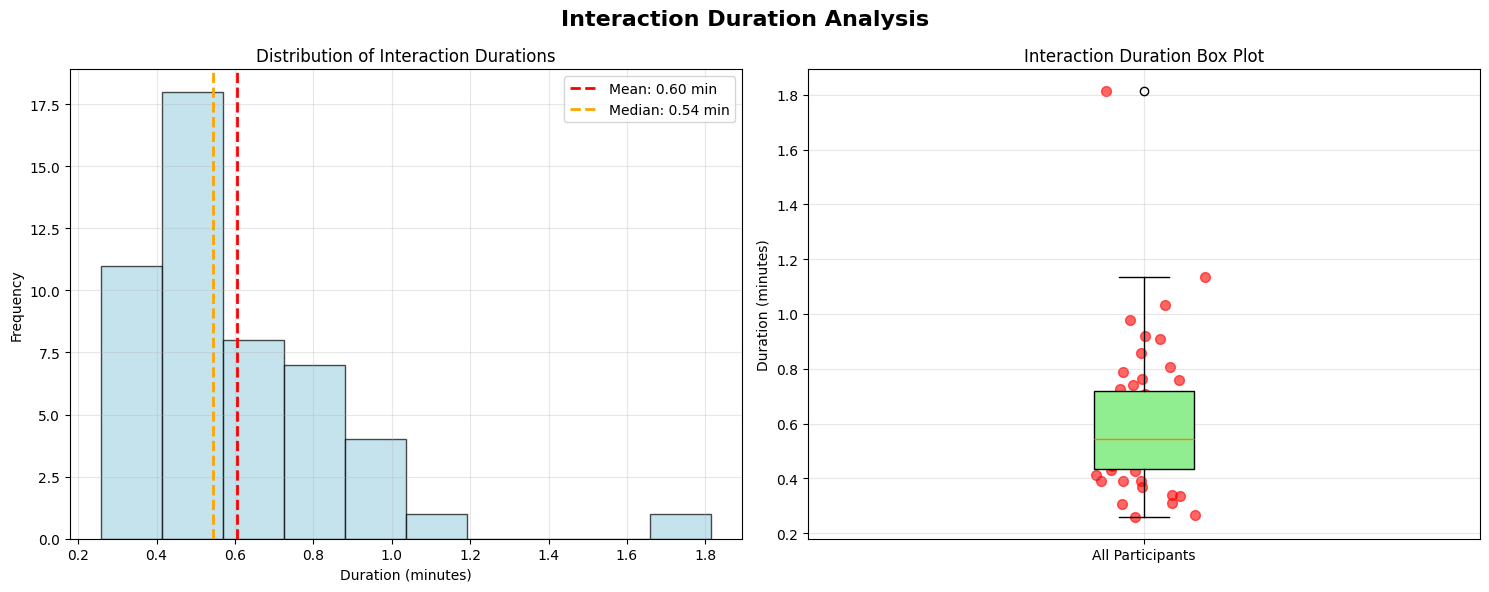


=== SUMMARY TABLE ===
          Metric Value
           Count    50
  Mean (minutes)  0.60
   Std (minutes)  0.27
   Min (minutes)  0.26
   Max (minutes)  1.82
Median (minutes)  0.54

=== START/END EVENT PATTERNS ===
Start events:
  End of '7alldone_callisabel': 50 participants

End events:
  Start of '9callisabel': 48 participants
  End of last annotation 'researcher_knows': 1 participants
  End of last annotation 'robô simão sabes o codigo ?': 1 participants


In [4]:
# @title Calculate Interaction Durations
def time_to_seconds(time_str):
    """Convert HH:MM:SS.fff to total seconds"""
    try:
        # Handle the format "HH:MM:SS.fff"
        parts = time_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds_parts = parts[2].split('.')
        seconds = int(seconds_parts[0])
        milliseconds = int(seconds_parts[1]) if len(seconds_parts) > 1 else 0
        
        total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    except:
        return np.nan

def calculate_interaction_durations(df):
    """Calculate interaction duration for each participant"""
    participants = df['participant_id'].unique()
    durations = []
    
    print("=== CALCULATING INTERACTION DURATIONS ===\n")
    
    for participant in participants:
        print(f"Processing participant: {participant}")
        
        # Filter data for current participant and sort by start time
        p_data = df[df['participant_id'] == participant].copy()
        p_data['start_seconds'] = p_data['start'].apply(time_to_seconds)
        p_data['end_seconds'] = p_data['end'].apply(time_to_seconds)
        p_data = p_data.sort_values('start_seconds')
        
        # Find start time
        start_time = None
        start_event = None
        
        # First try to find "7alldone_call isabel" and use its end time
        alldone_events = p_data[p_data['subcode'].str.contains('7alldone_call', na=False)]
        if len(alldone_events) > 0:
            start_time = alldone_events.iloc[0]['end_seconds']
            start_event = f"End of '{alldone_events.iloc[0]['subcode']}'"
            print(f"  Start: {start_event} at {start_time:.3f}s")
        else:
            # If not found, look for "initial_prompt" and use its start time
            initial_events = p_data[p_data['subcode'].str.contains('initial_prompt', na=False)]
            if len(initial_events) > 0:
                start_time = initial_events.iloc[0]['start_seconds']
                start_event = f"Start of '{initial_events.iloc[0]['subcode']}'"
                print(f"  Start: {start_event} at {start_time:.3f}s")
            else:
                print(f"  ERROR: No start event found (neither 7alldone_call nor initial_prompt)")
                continue
        
        # Find end time
        end_time = None
        end_event = None
        
        # First try to find "9callisabel" and use its start time
        callisabel_events = p_data[p_data['subcode'].str.contains('9callisabel', na=False)]
        if len(callisabel_events) > 0:
            end_time = callisabel_events.iloc[0]['start_seconds']
            end_event = f"Start of '{callisabel_events.iloc[0]['subcode']}'"
            print(f"  End: {end_event} at {end_time:.3f}s")
        else:
            # If not found, use the end time of the last annotation
            if len(p_data) > 0:
                last_annotation = p_data.iloc[-1]
                end_time = last_annotation['end_seconds']
                end_event = f"End of last annotation '{last_annotation['subcode']}'"
                print(f"  End: {end_event} at {end_time:.3f}s")
            else:
                print(f"  ERROR: No annotations found for participant")
                continue
        
        # Calculate duration
        if start_time is not None and end_time is not None:
            duration = end_time - start_time
            duration_minutes = duration / 60
            
            print(f"  Duration: {duration:.3f} seconds ({duration_minutes:.2f} minutes)")
            
            durations.append({
                'participant_id': participant,
                'start_time_seconds': start_time,
                'end_time_seconds': end_time,
                'duration_seconds': duration,
                'duration_minutes': duration_minutes,
                'start_event': start_event,
                'end_event': end_event
            })
        else:
            print(f"  ERROR: Could not determine start or end time")
        
        print()
    
    return pd.DataFrame(durations)

def analyze_interaction_durations(durations_df):
    """Analyze and visualize interaction durations"""
    
    if len(durations_df) == 0:
        print("No valid durations found!")
        return
    
    print("=== INTERACTION DURATION STATISTICS ===")
    
    # Basic statistics
    duration_seconds = durations_df['duration_seconds']
    duration_minutes = durations_df['duration_minutes']
    
    print(f"Number of participants: {len(durations_df)}")
    print(f"\nDuration in seconds:")
    print(f"  Mean: {duration_seconds.mean():.3f} seconds")
    print(f"  Std:  {duration_seconds.std():.3f} seconds")
    print(f"  Min:  {duration_seconds.min():.3f} seconds")
    print(f"  Max:  {duration_seconds.max():.3f} seconds")
    print(f"  Median: {duration_seconds.median():.3f} seconds")
    
    print(f"\nDuration in minutes:")
    print(f"  Mean: {duration_minutes.mean():.2f} minutes")
    print(f"  Std:  {duration_minutes.std():.2f} minutes")
    print(f"  Min:  {duration_minutes.min():.2f} minutes")
    print(f"  Max:  {duration_minutes.max():.2f} minutes")
    print(f"  Median: {duration_minutes.median():.2f} minutes")
    
    # Show individual durations
    print(f"\n=== INDIVIDUAL PARTICIPANT DURATIONS ===")
    for _, row in durations_df.iterrows():
        print(f"{row['participant_id']}: {row['duration_minutes']:.2f} minutes ({row['duration_seconds']:.1f}s)")
    
    # Create visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Interaction Duration Analysis', fontsize=16, fontweight='bold')
    
    # Histogram
    axes[0].hist(duration_minutes, bins=min(10, len(durations_df)), alpha=0.7, color='lightblue', edgecolor='black')
    axes[0].axvline(duration_minutes.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {duration_minutes.mean():.2f} min')
    axes[0].axvline(duration_minutes.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {duration_minutes.median():.2f} min')
    axes[0].set_title('Distribution of Interaction Durations')
    axes[0].set_xlabel('Duration (minutes)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot
    bp = axes[1].boxplot([duration_minutes], labels=['All Participants'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    axes[1].set_title('Interaction Duration Box Plot')
    axes[1].set_ylabel('Duration (minutes)')
    axes[1].grid(True, alpha=0.3)
    
    # Add data points
    x_positions = np.random.normal(1, 0.04, len(duration_minutes))
    axes[1].scatter(x_positions, duration_minutes, alpha=0.6, color='red', s=50)
    
    plt.tight_layout()
    plt.show()
    
    # Summary table
    print(f"\n=== SUMMARY TABLE ===")
    summary_stats = {
        'Metric': ['Count', 'Mean (minutes)', 'Std (minutes)', 'Min (minutes)', 'Max (minutes)', 'Median (minutes)'],
        'Value': [
            len(durations_df),
            f"{duration_minutes.mean():.2f}",
            f"{duration_minutes.std():.2f}",
            f"{duration_minutes.min():.2f}",
            f"{duration_minutes.max():.2f}",
            f"{duration_minutes.median():.2f}"
        ]
    }
    summary_df = pd.DataFrame(summary_stats)
    print(summary_df.to_string(index=False))
    
    # Check for start/end event patterns
    print(f"\n=== START/END EVENT PATTERNS ===")
    print("Start events:")
    start_events = durations_df['start_event'].value_counts()
    for event, count in start_events.items():
        print(f"  {event}: {count} participants")
    
    print("\nEnd events:")
    end_events = durations_df['end_event'].value_counts()
    for event, count in end_events.items():
        print(f"  {event}: {count} participants")
    
    return durations_df

def main():
    print("=== LOADING PROCESSED CODES DATA ===")
    
    try:
        df = pd.read_csv('processed_codes.csv')
        print(f"Loaded {len(df)} rows from processed_codes.csv")
        print(f"Participants: {sorted(df['participant_id'].unique())}")
        print(f"Unique subcodes: {len(df['subcode'].unique())}")
        
        # Show relevant subcodes
        relevant_codes = df[df['subcode'].str.contains('7alldone_call|initial_prompt|9callisabel', na=False)]['subcode'].unique()
        print(f"Relevant subcodes found: {sorted(relevant_codes)}")
        
    except FileNotFoundError:
        print("Error: processed_codes.csv not found!")
        return
    
    print()
    
    # Calculate interaction durations
    durations_df = calculate_interaction_durations(df)
    
    if len(durations_df) > 0:
        # Save results
        durations_df.to_csv('interaction_durations.csv', index=False)
        print(f"Results saved to 'interaction_durations.csv'")
        
        # Analyze results
        analyze_interaction_durations(durations_df)
        
        return durations_df
    else:
        print("No valid interaction durations could be calculated.")
        return None

# Run the analysis
if __name__ == "__main__":
    results = main()

In [5]:
# @title Code Definitions
annotation_list = ["slower", "demanding", "interrogative", "filler", "assertive", "initialprompt", "longerprompt", 
                   "swappingterms", "simplerprompt", "noprompt", "prompt2researcher", "repeatprompt", "newprompt",
                     "lookingatPC", "humor", "frustration", "confusion", "quitting", "moves", "standups", "leaveroom",
                     "try2look2researcher", "look2researcher", "look2robot", "movecloser2robot","pf","researcher_knows",
                     "closer","lookingrobot","closerrobot","closer2robot","no_standup"
                   ]


code_groups = {
    "childprompttone": [
        "slower",
        "demanding", 
        "interrogative",
        "filler",
        "assertive"
    ],
    "childprompt": [
        "initialprompt",
        "longerprompt",
        "swappingterms",
        "simplerprompt",
        "noprompt",
        "prompt2researcher",
        "repeatprompt",
        "newprompt"
    ],
    "childreaction2failure": [
        "lookingatPC",
        "humor",
        "frustration",
        "confusion",
        "quitting",
        "moves",
        "standsup",
        "leaveroom",
        "try2look2researcher",
        "look2researcher",
        "look2robot",
        "movecloser2robot"
    ]
}

#code conversion dictionary
conversion_dict = {
    "repeatprompt": "repeats prompt",
    "longerprompt": "more specific/longer prompt",
    "swappingterms": "swaps terms",
    "simplerprompt": "simpler prompt",
    "demanding": "demanding tone",
    "interrogative": "interrogative tone",
    "filler": "filler words",
    "humor": "amusement/humor",
    "slower": "slower speech",
    "assertive": "assertive tone",
    "noprompt": "no prompt",
    "prompt2researcher": "looks for researcher",
    "newprompt": "makes new prompt",
    "lookingatPC": "looks at PC",
    "moves": "changes position",
    "standups": "stands up",
    "standsup": "stands up",
    "leaveroom": "leaves room",
    "try2look2researcher": "looks for researcher",
    "look2researcher": "looks for researcher",
    "look2robot": "looks at robot",
    "movecloser2robot": "moves closer to robot",
    "pf": "'please'",
    "closer": "moves closer to robot",
    "lookingrobot": "looks at robot",
    "lookingatrobot": "looks at robot",
    "closerrobot": "moves closer to robot",
    "closer2robot": "moves closer to robot",
    "fillerprompt": "filler words",
}


categories = {
    
    "reprompting strategies": ["longer prompt", "more specific/longer prompt", "swaps terms", "simpler prompt",
                        "repeats prompt","makes new prompt","'please'"],
    "did not engage": ["no prompt"],
    "verbal tone or cadence": ["slower speech", "demanding tone", "interrogative tone", "filler words",
                                "assertive tone","moves closer to robot"],
    "emotion": ["amusement/humor", "confusion", "frustration"],
    "disengagement": [ "stands up", "leaves room", "quitting", 
                      "looks for researcher"],# removed looks at pc and robot
}

engagement_categories = {
    "engages with robot": ["longer prompt", "more specific/longer prompt", "swaps terms", "simpler prompt",
                        "repeats prompt","makes new prompt","'please'",
                        "slower speech", "demanding tone", "interrogative tone", "filler words",
                                "assertive tone","moves closer to robot"],
   
    "disengages from robot": ["looks for researcher",
                          "stands up", "leaves room", "no prompt","quitting"],
}

category_colors = {
    "reprompting strategies": "blue",
    "did not engage": "darkgrey",
    "verbal tone or cadence": "green",
    "emotion": "red",
    
    "disengagement": "purple",
}


category_colormaps = {
    "reprompting strategies": cm.Blues,
    "did not engage": cm.Greys,
    "verbal tone or cadence": cm.Greens,
    "emotion": cm.Reds,
    "disengagement": cm.Purples,
}

# Example usage - Verbal Tone or Cadence
verbal_tone_list = [
    "slower speech", 
    "demanding tone", 
    "interrogative tone", 
    "filler words",
    "assertive tone",
    "moves closer to robot",
]


# Example usage - Reprompting Strategies
reprompting_list = [
    "repeats prompt", 
    "more specific/longer prompt", 
    "swaps terms", 
    "simpler prompt",
    "makes new prompt",
    "'please'",
    "longer prompt"
]


# Example usage - Emotional Reactions
emotion_list = [
    "amusement/humor", 
    "confusion", 
    "frustration"

]


# Example usage - Disengagement Behaviors
disengagement_list = [
    "stands up", 
    "leaves room", 
    "quitting",
    "looks for researcher",
    "no prompt"
]



=== LOADING DATA ===
Loaded processed_codes.csv: 1391 rows
Loaded reactions_between_errors.csv: 402 rows

=== FINDING ERRORS IN PROCESSED CODES ===
Processing participant: P1
  Found 2 error events
    Error 1: 8nounderstanding3x at 00:08:34.083
    Error 2: 8nounderstanding3x at 00:08:45.000
Processing participant: P10
  Found 3 error events
    Error 1: 8nounderstanding3x at 00:07:12.725
    Error 2: 8nounderstanding3x at 00:07:17.405
    Error 3: 8nounderstanding3x at 00:07:31.195
Processing participant: P11
  Found 3 error events
    Error 1: 8nounderstanding3x at 00:06:22.430
    Error 2: 8nounderstanding3x at 00:06:30.460
    Error 3: 8nounderstanding3x at 00:06:46.795
Processing participant: P12
  Found 3 error events
    Error 1: 8nounderstanding3x at 00:05:46.175
    Error 2: 8nounderstanding3x at 00:05:49.715
    Error 3: 8nounderstanding3x at 00:06:00.900
Processing participant: P13
  Found 3 error events
    Error 1: 8nounderstanding3x at 00:08:56.675
    Error 2: 8nounders

/tmp/ipykernel_92616/2953071409.py:248: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


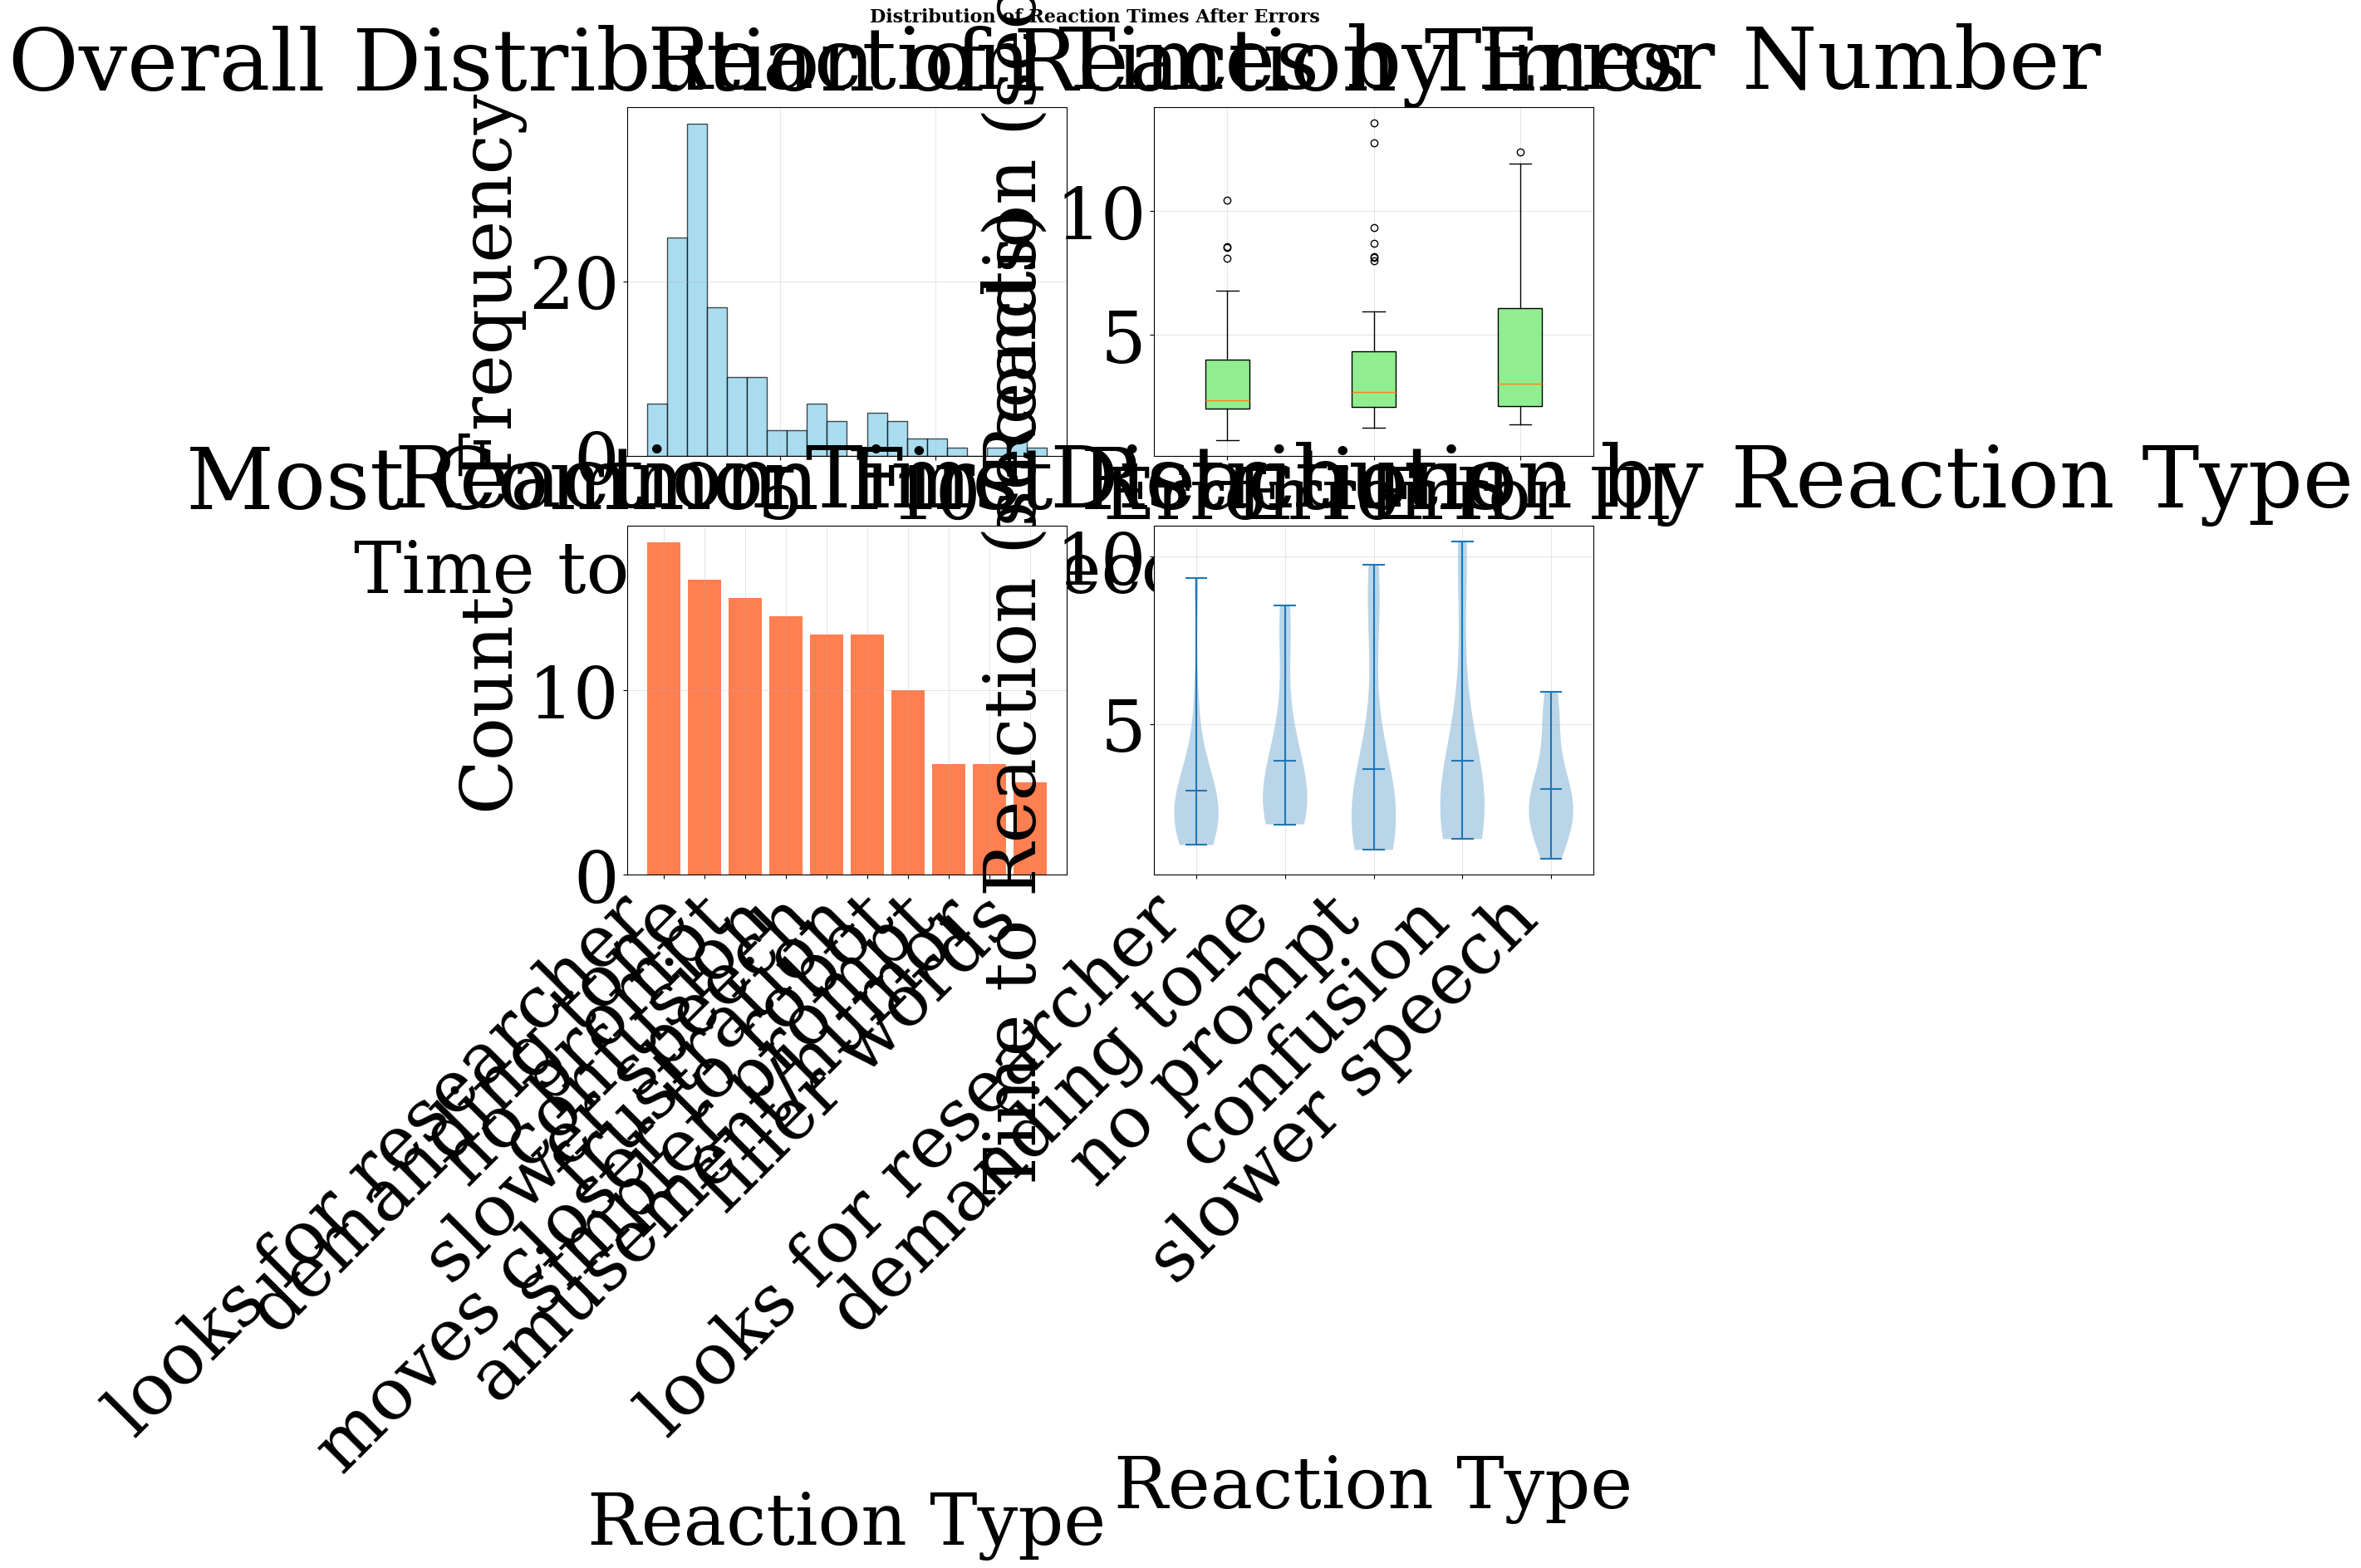


=== REACTION TIME STATISTICS ===
Total reactions analyzed: 138
Mean reaction time: 3.832 seconds
Median reaction time: 2.687 seconds
Standard deviation: 2.700 seconds
Min reaction time: 0.755 seconds
Max reaction time: 13.558 seconds

=== REACTION TIMES BY ERROR ===
Error 1: Mean=3.355s, Median=2.366s, Count=49
Error 2: Mean=3.905s, Median=2.705s, Count=45
Error 3: Mean=4.287s, Median=3.053s, Count=44

=== TOP REACTION TYPES ===
                       count   mean    std
subcode_readable                          
looks for researcher      18  3.005  1.890
demanding tone            16  3.915  2.146
no prompt                 15  3.661  2.838
confusion                 14  3.902  2.888
frustration               13  3.687  2.360
slower speech             13  3.076  1.477
moves closer to robot     10  3.848  2.595
amusement/humor            6  5.190  4.611
simpler prompt             6  7.040  4.447
filler words               5  3.764  1.651


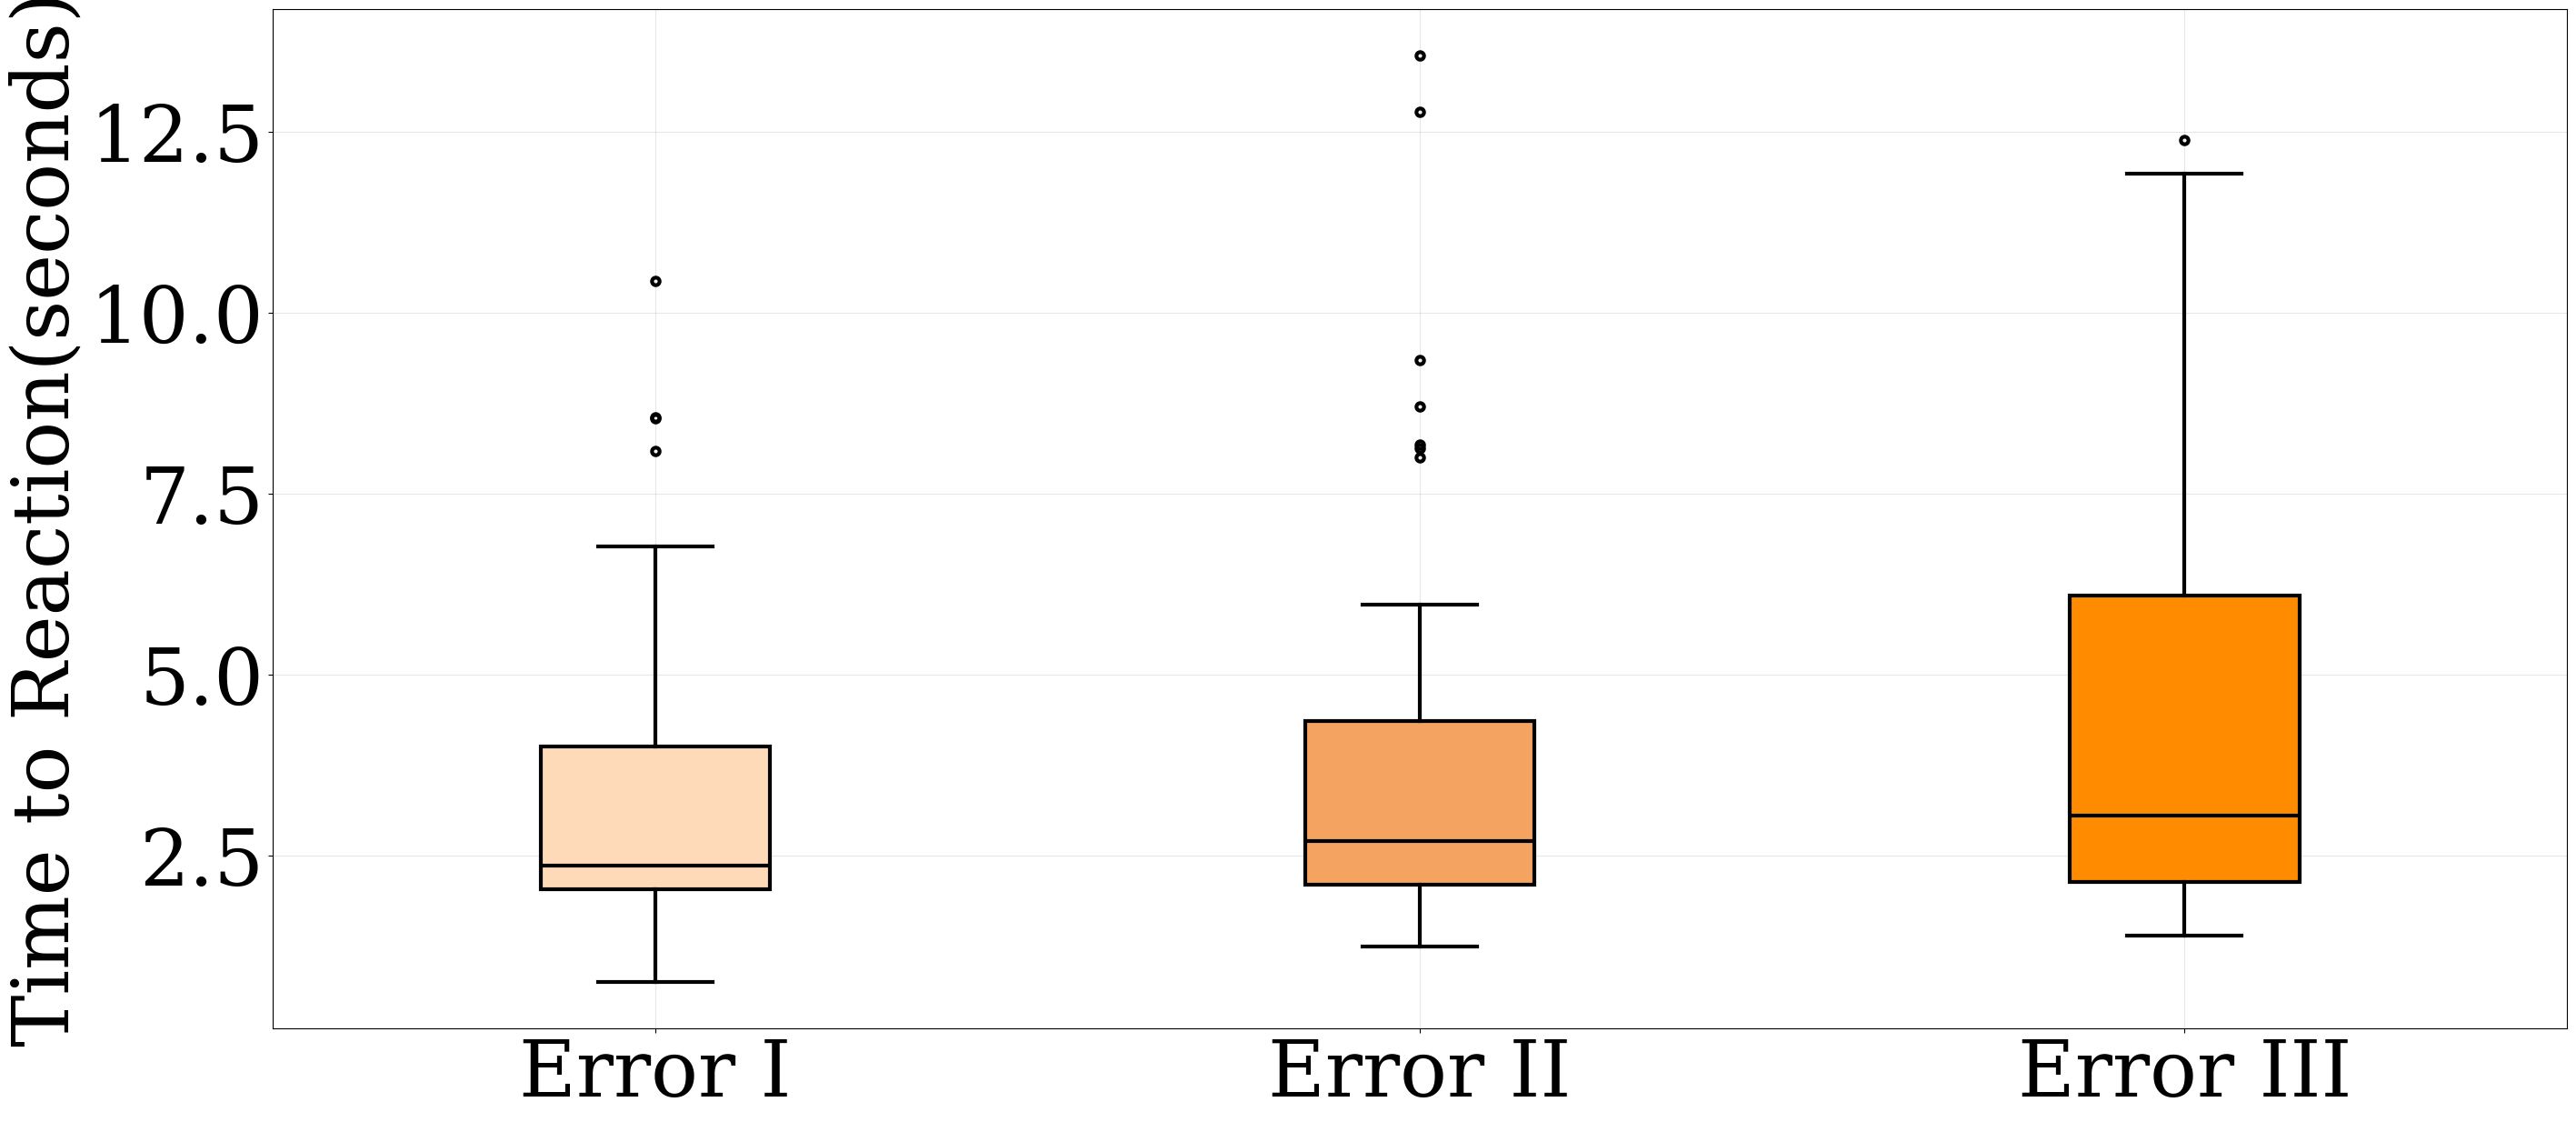

In [16]:
# @title Reaction Time Analysis

# Utils function
def time_to_seconds(time_str):
    """Convert HH:MM:SS.fff to total seconds"""
    try:
        # Handle the format "HH:MM:SS.fff"
        parts = time_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds_parts = parts[2].split('.')
        seconds = int(seconds_parts[0])
        milliseconds = int(seconds_parts[1]) if len(seconds_parts) > 1 else 0
        
        total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    except:
        return np.nan

def find_errors_in_processed_codes(df):
    """Find all error events (nounderstanding codes) in processed_codes.csv"""
    errors = []
    participants = df['participant_id'].unique()
    
    for participant in participants:
        print(f"Processing participant: {participant}")
        
        # Filter data for current participant and sort by start time
        p_data = df[df['participant_id'] == participant].copy()
        p_data['start_seconds'] = p_data['start'].apply(time_to_seconds)
        p_data = p_data.sort_values('start_seconds')
        
        # Find nounderstanding events (errors)
        # Assuming errors are identified by subcodes containing 'nounderstanding'
        nounderstanding = p_data[p_data['subcode'].str.contains('nounderstanding', na=False)]
        
        print(f"  Found {len(nounderstanding)} error events")
        
        # Add each error with its error number
        for i, (_, row) in enumerate(nounderstanding.iterrows(), 1):
            errors.append({
                'participant_id': participant,
                'error_num': i,
                'error_start_seconds': row['start_seconds'],
                'error_start_time': row['start'],
                'error_end_seconds': row['end_seconds'] if 'end_seconds' in row else time_to_seconds(row['end']),
                'error_subcode': row['subcode']
            })
            print(f"    Error {i}: {row['subcode']} at {row['start']}")
    
    return pd.DataFrame(errors)



def calculate_time_to_first_reaction(errors_df, reactions_df):
    """Calculate time to first reaction after each error"""
    results = []
    
    # Codes to exclude (looks at PC/robot)
    exclude_codes = ['looks at PC', 'looks at robot']
    
    for _, error_row in errors_df.iterrows():
        participant = error_row['participant_id']
        error_num = error_row['error_num']
        error_end_time = error_row['error_end_seconds']
        error_start_time = error_row['error_start_seconds']
        
        print(f"Processing {participant}, Error {error_num}")
        
        # Get reactions for this participant and error
        participant_reactions = reactions_df[
            (reactions_df['participant_id'] == participant) & 
            (reactions_df['error'] == error_num)
        ].copy()
        
        if len(participant_reactions) == 0:
            print(f"  No reactions found for error {error_num}")
            continue
        
        # Add start_seconds for sorting
        participant_reactions['start_seconds'] = participant_reactions['start'].apply(time_to_seconds)
        
        # Filter out excluded codes and sort by start time
        valid_reactions = participant_reactions[
            ~participant_reactions['subcode_readable'].isin(exclude_codes)
        ].sort_values('start_seconds')
        
        if len(valid_reactions) == 0:
            print(f"  No valid reactions found (all were looks at PC/robot)")
            continue
        
        # Get first valid reaction
        first_reaction = valid_reactions.iloc[0]
        #if before error start time, get next reaction
        if first_reaction['start_seconds'] < error_start_time:
            if len(valid_reactions) > 1:
                first_reaction = valid_reactions.iloc[1]
                if first_reaction['start_seconds'] < error_start_time:
                    if len(valid_reactions) > 2:
                        first_reaction = valid_reactions.iloc[2]
                        if first_reaction['start_seconds'] < error_start_time:
                            print(f"  No valid reactions found after error start time")
                            continue
            else:
                print(f"  No valid reactions found after error start time")
                continue
        
        # Calculate time difference
        time_to_reaction = first_reaction['start_seconds'] - error_start_time

        print(f"  First reaction: {first_reaction['subcode_readable']} at {first_reaction['start']}")
        print(f"  Time to reaction: {time_to_reaction:.3f} seconds")
        
        results.append({
            'participant_id': participant,
            'error': error_num,
            'time_to_reaction': time_to_reaction,
            'code': first_reaction['subcode'],
            'subcode_readable': first_reaction['subcode_readable']
        })
    
    return pd.DataFrame(results)


def calculate_time_to_first_reaction_verbal(errors_df, reactions_df):
    """Calculate time to first reaction after each error"""
    results = []
    
    # Codes to exclude (looks at PC/robot)
    include_codes = reprompting_list
    
    for _, error_row in errors_df.iterrows():
        participant = error_row['participant_id']
        error_num = error_row['error_num']
        error_end_time = error_row['error_end_seconds']
        error_start_time = error_row['error_start_seconds']
        
        print(f"Processing {participant}, Error {error_num}")
        
        # Get reactions for this participant and error
        participant_reactions = reactions_df[
            (reactions_df['participant_id'] == participant) & 
            (reactions_df['error'] == error_num)
        ].copy()
        
        if len(participant_reactions) == 0:
            print(f"  No reactions found for error {error_num}")
            continue
        
        # Add start_seconds for sorting
        participant_reactions['start_seconds'] = participant_reactions['start'].apply(time_to_seconds)
        
        # Filter out excluded codes and sort by start time
        valid_reactions = participant_reactions[
            participant_reactions['subcode_readable'].isin(include_codes)
        ].sort_values('start_seconds')
        
        if len(valid_reactions) == 0:
            print(f"  No valid reactions found (all were looks at PC/robot)")
            continue
        
        # Get first valid reaction
        first_reaction = valid_reactions.iloc[0]
        #if before error start time, get next reaction
        if first_reaction['start_seconds'] < error_start_time:
            if len(valid_reactions) > 1:
                first_reaction = valid_reactions.iloc[1]
                if first_reaction['start_seconds'] < error_start_time:
                    if len(valid_reactions) > 2:
                        first_reaction = valid_reactions.iloc[2]
                        if first_reaction['start_seconds'] < error_start_time:
                            print(f"  No valid reactions found after error start time")
                            continue
            else:
                print(f"  No valid reactions found after error start time")
                continue
        
        # Calculate time difference
        time_to_reaction = first_reaction['start_seconds'] - error_start_time

        print(f"  First reaction: {first_reaction['subcode_readable']} at {first_reaction['start']}")
        print(f"  Time to reaction: {time_to_reaction:.3f} seconds")
        
        results.append({
            'participant_id': participant,
            'error': error_num,
            'time_to_reaction': time_to_reaction,
            'code': first_reaction['subcode'],
            'subcode_readable': first_reaction['subcode_readable']
        })
    
    return pd.DataFrame(results)

def plot_reaction_time_distribution(results_df):
    """Plot the distribution of reaction times"""
    
    # Set up the plotting style
    plt.rcParams.update({'font.size': 62})
    plt.rcParams.update({'font.family': 'serif'})
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Distribution of Reaction Times After Errors', fontsize=16, fontweight='bold')
    
    # Overall distribution histogram
    axes[0,0].hist(results_df['time_to_reaction'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Overall Distribution of Reaction Times')
    axes[0,0].set_xlabel('Time to Reaction (seconds)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)
    
    # Box plot by error number
    error_groups = [group['time_to_reaction'].values for name, group in results_df.groupby('error')]
    error_roman = ['Error 0','Error I', 'Error II', 'Error III']
    error_labels = [f'{error_roman[i]}' for i in sorted(results_df['error'].unique())]

    bp = axes[0,1].boxplot(error_groups, labels=error_labels, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightgreen')
    axes[0,1].set_title('Reaction Times by Error Number')
    axes[0,1].set_ylabel('Time to Reaction (seconds)')
    axes[0,1].grid(True, alpha=0.3)
    
    # Distribution by reaction type
    reaction_counts = results_df['subcode_readable'].value_counts()
    top_reactions = reaction_counts.head(10)  # Top 10 most common reactions
    
    axes[1,0].bar(range(len(top_reactions)), top_reactions.values, color='coral')
    axes[1,0].set_title('Most Common First Reactions')
    axes[1,0].set_xlabel('Reaction Type')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_xticks(range(len(top_reactions)))
    axes[1,0].set_xticklabels(top_reactions.index, rotation=45, ha='right')
    axes[1,0].grid(True, alpha=0.3)
    
    # Violin plot of reaction times by reaction type (for top reactions)
    top_reaction_types = top_reactions.head(5).index
    violin_data = [results_df[results_df['subcode_readable'] == reaction]['time_to_reaction'].values 
                   for reaction in top_reaction_types]
    
    vp = axes[1,1].violinplot(violin_data, positions=range(len(top_reaction_types)), showmeans=True)
    axes[1,1].set_title('Reaction Time Distribution by Reaction Type')
    axes[1,1].set_xlabel('Reaction Type')
    axes[1,1].set_ylabel('Time to Reaction (seconds)')
    axes[1,1].set_xticks(range(len(top_reaction_types)))
    axes[1,1].set_xticklabels(top_reaction_types, rotation=45, ha='right')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

     # Set up the plotting style
    fig, axes = plt.subplots(figsize=(30, 14))
    #fig.suptitle('Distribution of Reaction Times After Errors', fontsize=16, fontweight='bold')

    # Box plot by error number
    error_groups = [group['time_to_reaction'].values for name, group in results_df.groupby('error')]
    error_roman = ['Error 0','Error I', 'Error II', 'Error III']
    error_labels = [f'{error_roman[i]}' for i in sorted(results_df['error'].unique())]

    bp = axes.boxplot(error_groups, labels=error_labels, patch_artist=True, boxprops=dict(linewidth=3),
                  whiskerprops=dict(linewidth=3),
                  capprops=dict(linewidth=3),
                  flierprops=dict(markeredgewidth=3))
    for ind,patch in enumerate(bp['boxes']):
        if ind == 0:
            patch.set_facecolor('peachpuff')
        elif ind == 1:
            patch.set_facecolor('sandybrown')
        elif ind == 2:
            patch.set_facecolor('darkorange')
        #set color of median line
    for median in bp['medians']:
        median.set(color='black', linewidth=3)
    #axes.set_title('Reaction Times by Error Number')
    axes.set_ylabel('Time to Reaction(seconds)')
    axes.grid(True, alpha=0.3)
    plt.tight_layout()
    #plt.show()
    #save figure
    filename = 'plots/reaction_times_by_error_boxplot.png'
    plt.savefig(filename, format='png', dpi=500, bbox_inches='tight')
    plt.savefig('plots/reaction_times_by_error_boxplot_all.pdf', format='pdf', bbox_inches='tight')

    # Print summary statistics
    print("\n=== REACTION TIME STATISTICS ===")
    print(f"Total reactions analyzed: {len(results_df)}")
    print(f"Mean reaction time: {results_df['time_to_reaction'].mean():.3f} seconds")
    print(f"Median reaction time: {results_df['time_to_reaction'].median():.3f} seconds")
    print(f"Standard deviation: {results_df['time_to_reaction'].std():.3f} seconds")
    print(f"Min reaction time: {results_df['time_to_reaction'].min():.3f} seconds")
    print(f"Max reaction time: {results_df['time_to_reaction'].max():.3f} seconds")
    
    print("\n=== REACTION TIMES BY ERROR ===")
    for error_num in sorted(results_df['error'].unique()):
        error_data = results_df[results_df['error'] == error_num]['time_to_reaction']
        print(f"Error {error_num}: Mean={error_data.mean():.3f}s, Median={error_data.median():.3f}s, Count={len(error_data)}")
    
    print("\n=== TOP REACTION TYPES ===")
    reaction_stats = results_df.groupby('subcode_readable')['time_to_reaction'].agg(['count', 'mean', 'std']).round(3)
    print(reaction_stats.sort_values('count', ascending=False).head(10))

# Main execution
def main():
    print("=== LOADING DATA ===")
    
    # Load the CSV files
    try:
        processed_codes = pd.read_csv('processed_codes.csv')
        reactions_between_errors = pd.read_csv('reactions_between_errors.csv')
        
        print(f"Loaded processed_codes.csv: {len(processed_codes)} rows")
        print(f"Loaded reactions_between_errors.csv: {len(reactions_between_errors)} rows")
    except FileNotFoundError as e:
        print(f"Error loading files: {e}")
        return
    
    print("\n=== FINDING ERRORS IN PROCESSED CODES ===")
    errors_df = find_errors_in_processed_codes(processed_codes)
    print(f"Found {len(errors_df)} total errors across all participants")
    
    if len(errors_df) == 0:
        print("No errors found. Please check that your processed_codes.csv contains 'nounderstanding' subcodes.")
        return
    
    print("\n=== CALCULATING TIME TO FIRST REACTION ===")
    results_df = calculate_time_to_first_reaction(errors_df, reactions_between_errors)
    #results_df_verbal = calculate_time_to_first_reaction_verbal(errors_df, reactions_between_errors)
    
    if len(results_df) == 0:
        print("No valid reactions found after errors.")
        return
    
    print(f"\nSuccessfully calculated reaction times for {len(results_df)} error events")
    
    # Save results to CSV
    output_filename = 'time_to_first_reaction.csv'
    results_df.to_csv(output_filename, index=False)
    print(f"Results saved to '{output_filename}'")
    
    # Display sample results
    print("\n=== SAMPLE RESULTS ===")
    print(results_df.head(10))
    
    print("\n=== PLOTTING DISTRIBUTION ===")
    plot_reaction_time_distribution(results_df)

    #print("\n=== PLOTTING VERBAL REACTIONS DISTRIBUTION ===")
    #plot_reaction_time_distribution(results_df_verbal)

   
    return results_df

# Run the analysis
if __name__ == "__main__":
    results = main()

In [7]:
# @title Some Prints
#count subcode "pf"
pf_count = data[data['subcode'] == 'pf'].shape[0]
print(f"Number of 'pf' subcode occurrences: {pf_count}")
print(data['code_group'].value_counts())
print(data['subcode'].unique())
print(data['subcode'].value_counts())  


Number of 'pf' subcode occurrences: 7
code_group
childreaction2failure    268
robotspeaking            195
childprompt              166
childtone                 95
Name: count, dtype: int64
['pf' '8nounderstanding3x' 'interrogative' 'simplerprompt' 'frustration'
 'noprompt' 'quitting' 'slower' 'longerprompt' '9callisabel' 'lookingatPC'
 'confusion' 'moves' 'repeatprompt' 'leaveroom' 'look2researcher'
 'lookingrobot' 'try2look2researcher' 'humor' 'standsup' 'closer'
 'look2robot' 'filler' 'demanding' 'prompt2researcher' 'swappingterms'
 'movecloser2robot' 'newprompt' 'lookingatrobot' 'fillerprompt'
 'closer2robot' 'assertive' 'closerrobot']
subcode
8nounderstanding3x     147
look2robot              59
repeatprompt            53
noprompt                50
demanding               49
9callisabel             48
lookingatPC             44
try2look2researcher     39
confusion               34
slower                  29
longerprompt            26
frustration             22
simplerprompt      

In [8]:
# @title Analyze Reactions Between Errors
def time_to_seconds(time_str):
    """Convert HH:MM:SS.fff to total seconds"""
    try:
        # Handle the format "HH:MM:SS.fff"
        parts = time_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds_parts = parts[2].split('.')
        seconds = int(seconds_parts[0])
        milliseconds = int(seconds_parts[1]) if len(seconds_parts) > 1 else 0
        
        total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    except:
        return np.nan

def extract_error_intervals(df):
    """Extract the time intervals between successive errors for each participant"""
    participants = df['participant_id'].unique()
    intervals = []
    
    for participant in participants:
        print(f"Processing participant: {participant}")
        
        # Filter data for current participant and sort by start time
        p_data = df[df['participant_id'] == participant].copy()
        p_data['start_seconds'] = p_data['start'].apply(time_to_seconds)
        p_data['end_seconds'] = p_data['end'].apply(time_to_seconds)
        p_data = p_data.sort_values('start_seconds')
        
        # Find error prompts and callisabel
        nounderstanding = p_data[p_data['subcode'] == '8nounderstanding3x']
        callisabel = p_data[p_data['subcode'] == '9callisabel']
        
        print(f"  Found {len(nounderstanding)} nounderstanding prompts")
        print(f"  Found {len(callisabel)} callisabel events")
        
        # Define error intervals
        error_intervals = []
        
        # Error 1: between end of 1st nounderstanding and start of 2nd nounderstanding
        if len(nounderstanding) >= 2:
            start_time = nounderstanding.iloc[0]['end_seconds']
            end_time = nounderstanding.iloc[1]['start_seconds']
            error_intervals.append((1, start_time, end_time))
            print(f"  Error 1 interval: {start_time:.3f} - {end_time:.3f}")
        
        # Error 2: between end of 2nd nounderstanding and start of 3rd nounderstanding  
        if len(nounderstanding) >= 3:
            start_time = nounderstanding.iloc[1]['end_seconds']
            end_time = nounderstanding.iloc[2]['start_seconds']
            error_intervals.append((2, start_time, end_time))
            print(f"  Error 2 interval: {start_time:.3f} - {end_time:.3f}")
        
        # Error 3: between end of 3rd nounderstanding and start of callisabel
        if len(nounderstanding) >= 3 and len(callisabel) >= 1:
            start_time = nounderstanding.iloc[2]['end_seconds']
            end_time = callisabel.iloc[0]['start_seconds']
            error_intervals.append((3, start_time, end_time))
            print(f"  Error 3 interval: {start_time:.3f} - {end_time:.3f}")
        
        intervals.append((participant, error_intervals))
        print()
    
    return intervals

def filter_reactions_between_errors(df, error_intervals):
    """Filter dataframe to only include reactions between errors"""
    filtered_rows = []
    
    for participant, intervals in error_intervals:
        print(f"Filtering reactions for participant: {participant}")
        
        # Get participant data
        p_data = df[df['participant_id'] == participant].copy()
        p_data['start_seconds'] = p_data['start'].apply(time_to_seconds)
        p_data['end_seconds'] = p_data['end'].apply(time_to_seconds)
        
        for error_num, interval_start, interval_end in intervals:
            # Find rows that overlap with this error interval
            # A row overlaps if its start is before interval_end and its end is after interval_start
            overlapping = p_data[
                (p_data['start_seconds'] < interval_end) & 
                (p_data['end_seconds'] > interval_start) &
                (~p_data['subcode'].isin(['8nounderstanding3x', '9callisabel']))  # Exclude the error prompts themselves
            ].copy()
            
            if len(overlapping) > 0:
                overlapping['error'] = error_num
                filtered_rows.append(overlapping)
                print(f"  Error {error_num}: Found {len(overlapping)} reaction(s)")
                for _, row in overlapping.iterrows():
                    print(f"    {row['subcode']} ({row['start']} - {row['end']})")
            else:
                print(f"  Error {error_num}: No reactions found")
    
    if filtered_rows:
        result_df = pd.concat(filtered_rows, ignore_index=True)
        # Drop the helper columns
        result_df = result_df.drop(['start_seconds', 'end_seconds'], axis=1)
        return result_df
    else:
        return pd.DataFrame()

# Read the processed codes data
print("Loading processed_codes.csv...")
df = data.copy()
print(df.columns)
print(f"Loaded {len(df)} rows")
print(f"Participants: {df['participant_id'].unique()}")
print(f"Unique subcodes: {df['subcode'].unique()}")
#counts
print("Subcode counts:")
print(df['subcode'].value_counts())
print()

# Extract error intervals for each participant
print("=== EXTRACTING ERROR INTERVALS ===")
error_intervals = extract_error_intervals(df)

# Filter reactions that occur between errors
print("=== FILTERING REACTIONS BETWEEN ERRORS ===")
reactions_df = filter_reactions_between_errors(df, error_intervals)

print(f"\n=== RESULTS ===")
print(f"Found {len(reactions_df)} reaction events between errors")

if len(reactions_df) > 0:
    print("\nReactions by error:")
    print(reactions_df['error'].value_counts().sort_index())
    
    print("\nSubcodes found:")
    print(reactions_df['subcode'].value_counts())
    
    # Apply code conversion dictionary
    print("\n=== APPLYING CODE CONVERSIONS ===")
    reactions_df['subcode_readable'] = reactions_df['subcode'].map(conversion_dict)
    
    # For subcodes not in conversion dict, keep original
    reactions_df['subcode_readable'] = reactions_df['subcode_readable'].fillna(reactions_df['subcode'])
    
    print("Converted subcodes:")
    print(reactions_df['subcode_readable'].value_counts())
    
    # Display sample of results
    print("\n=== SAMPLE RESULTS ===")
    print(reactions_df[['participant_id', 'subcode', 'subcode_readable', 'start', 'end', 'error']].head(10))
    
    # Save results
    reactions_df.to_csv("reactions_between_errors_noncurated.csv", index=False)
    print(f"\nResults saved to 'reactions_between_errors_noncurated.csv'")

else:
    print("No reactions found between errors")



Loading processed_codes.csv...
Index(['participant_id', 'video_name', 'start', 'end', 'duration',
       'code_group', 'subcode'],
      dtype='object')
Loaded 724 rows
Participants: ['P10' 'P11' 'P12' 'P13' 'P14' 'P16' 'P19' 'P2' 'P20' 'P21' 'P22' 'P23'
 'P24' 'P25' 'P26' 'P27' 'P28' 'P29' 'P3' 'P30' 'P32' 'P33' 'P35' 'P36'
 'P37' 'P38' 'P4' 'P41' 'P42' 'P43' 'P44' 'P46' 'P47' 'P48' 'P49' 'P5'
 'P50' 'P51' 'P52' 'P53' 'P54' 'P55' 'P56' 'P57' 'P58' 'P59' 'P6' 'P7'
 'P8' 'P9']
Unique subcodes: ['pf' '8nounderstanding3x' 'interrogative' 'simplerprompt' 'frustration'
 'noprompt' 'quitting' 'slower' 'longerprompt' '9callisabel' 'lookingatPC'
 'confusion' 'moves' 'repeatprompt' 'leaveroom' 'look2researcher'
 'lookingrobot' 'try2look2researcher' 'humor' 'standsup' 'closer'
 'look2robot' 'filler' 'demanding' 'prompt2researcher' 'swappingterms'
 'movecloser2robot' 'newprompt' 'lookingatrobot' 'fillerprompt'
 'closer2robot' 'assertive' 'closerrobot']
Subcode counts:
subcode
8nounderstanding3x  

In [9]:
# Bring reaction_between_errors.csv back in
reactions_between_errors = pd.read_csv('reactions_between_errors_noncurated.csv')

# Group by error and subcode_readable, then count
error_annotation_counts = reactions_between_errors.groupby(['error', 'subcode_readable']).size().reset_index(name='count')

# Get unique error types
unique_errors = sorted(error_annotation_counts['error'].unique())

# Print each error type with its annotations
for error_type in unique_errors:
    # Filter data for this error type
    error_data = error_annotation_counts[error_annotation_counts['error'] == error_type]
    
    # Calculate total for this error type
    total_count = error_data['count'].sum()
    
    # Print header
    print(f"\nERROR {error_type} (total {total_count})")
    print("-" * 30)
    
    # Sort annotations by count (descending) and print
    sorted_annotations = error_data.sort_values('count', ascending=False)
    for _, row in sorted_annotations.iterrows():
        print(f"- {row['subcode_readable']}: {row['count']}")


ERROR 1 (total 150)
------------------------------
- repeats prompt: 24
- looks at robot: 22
- slower speech: 13
- more specific/longer prompt: 12
- confusion: 11
- looks at PC: 11
- demanding tone: 9
- looks for researcher: 8
- no prompt: 8
- moves closer to robot: 7
- filler words: 5
- interrogative tone: 5
- amusement/humor: 4
- 'please': 3
- makes new prompt: 2
- simpler prompt: 2
- changes position: 2
- stands up: 1
- swaps terms: 1

ERROR 2 (total 127)
------------------------------
- no prompt: 22
- looks at robot: 13
- repeats prompt: 13
- looks for researcher: 12
- looks at PC: 12
- confusion: 8
- demanding tone: 7
- slower speech: 6
- frustration: 6
- simpler prompt: 6
- more specific/longer prompt: 6
- quitting: 4
- amusement/humor: 3
- moves closer to robot: 3
- changes position: 2
- leaves room: 2
- filler words: 1
- swaps terms: 1

ERROR 3 (total 148)
------------------------------
- frustration: 15
- repeats prompt: 14
- no prompt: 14
- looks at robot: 13
- looks at PC:

Creating histogram for: Verbal Tone or Cadence
Found 86 reactions for this category
Grouped data:
subcode_readable  slower speech  demanding tone  interrogative tone  \
error                                                                 
1                            13               9                   5   
2                             6               7                   0   
3                             8               9                   3   

subcode_readable  filler words  assertive tone  moves closer to robot  
error                                                                  
1                            5               0                      7  
2                            1               0                      3  
3                            3               1                      6  
Plot saved to plots/tone_cadence_annotations_histogram.png


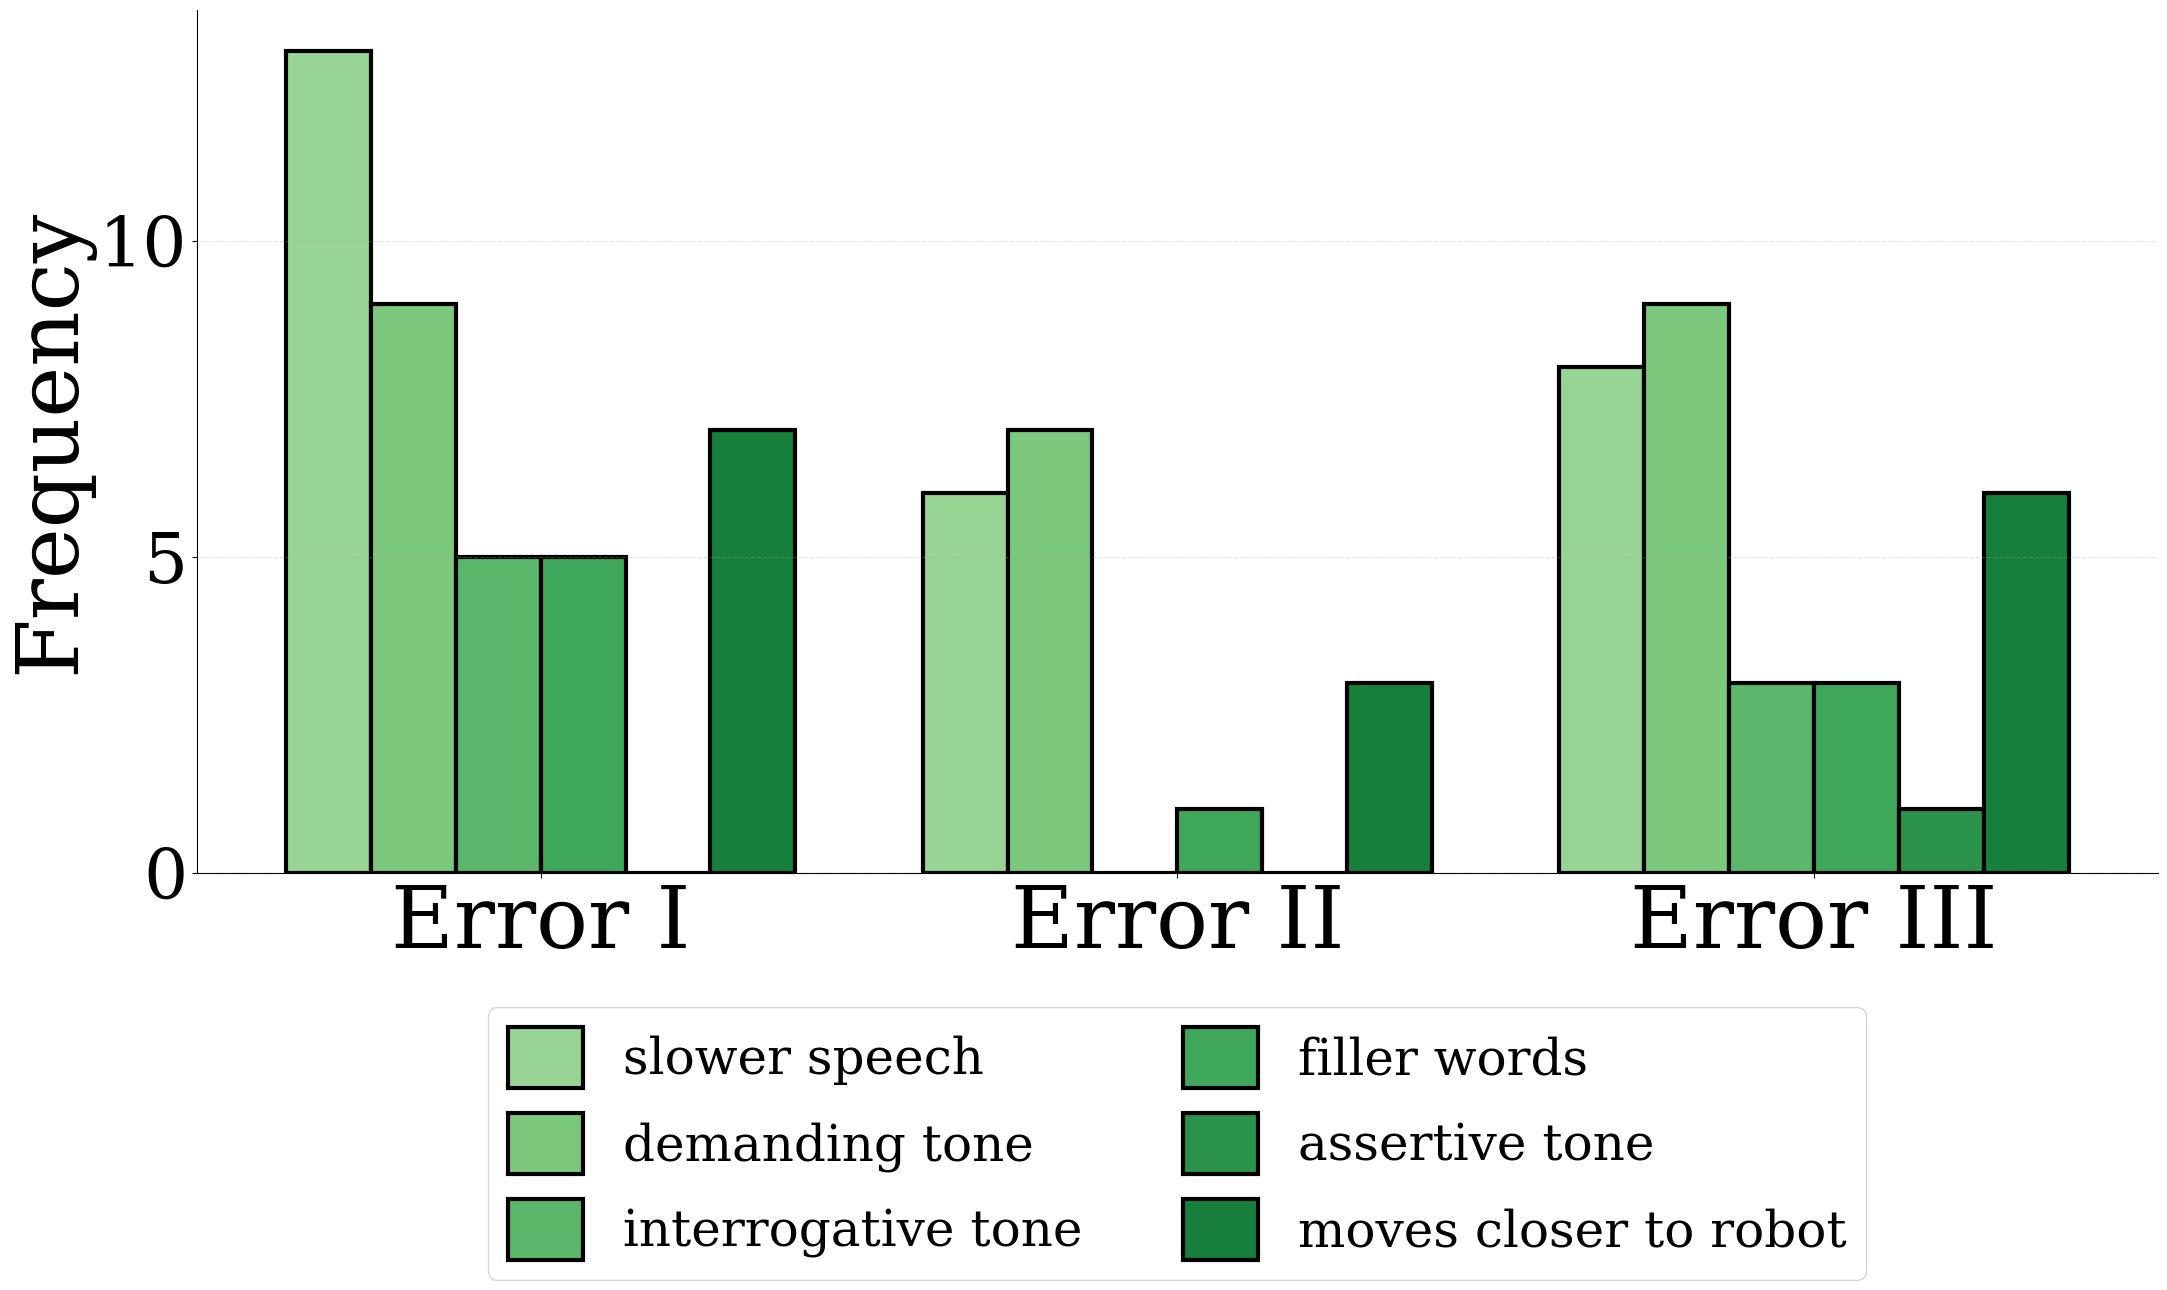


Summary for Verbal Tone or Cadence:
  Error 1: 39 total reactions
  Error 2: 17 total reactions
  Error 3: 30 total reactions
Most common reactions in this category:
  slower speech: 27 times
  demanding tone: 25 times
  moves closer to robot: 16 times
  filler words: 9 times
  interrogative tone: 8 times
  assertive tone: 1 times
Creating histogram for: Reprompting Strategies
Found 106 reactions for this category
Grouped data:
subcode_readable  repeats prompt  more specific/longer prompt  swaps terms  \
error                                                                        
1                             25                           12            1   
2                             13                            6            1   
3                             16                            7            0   

subcode_readable  simpler prompt  makes new prompt  'please'  longer prompt  
error                                                                        
1                   

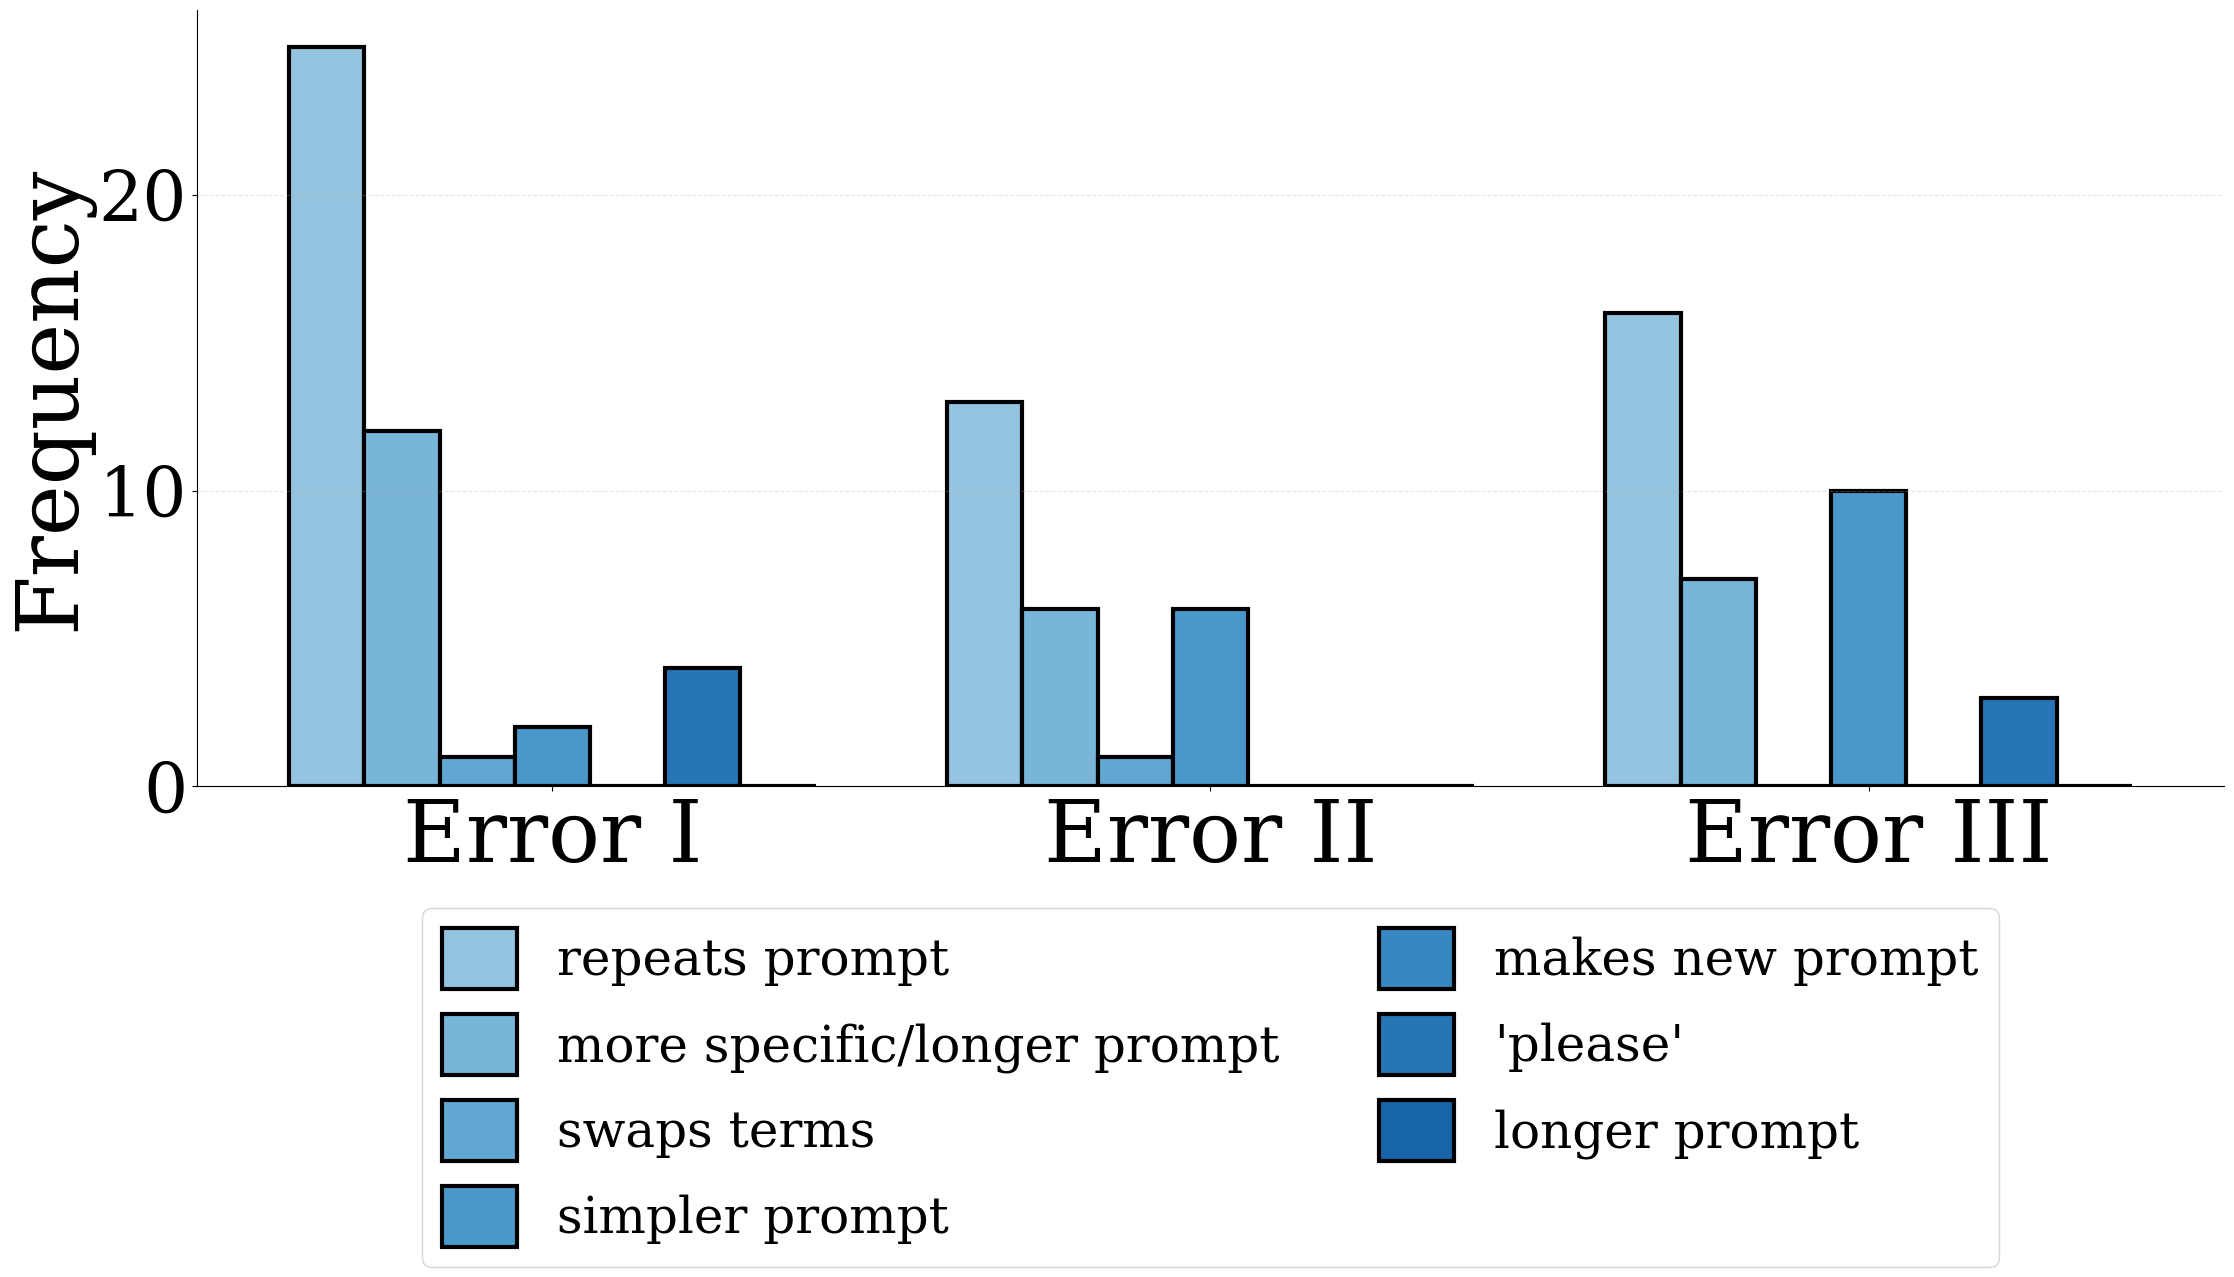


Summary for Reprompting Strategies:
  Error 1: 44 total reactions
  Error 2: 26 total reactions
  Error 3: 36 total reactions
Most common reactions in this category:
  repeats prompt: 54 times
  more specific/longer prompt: 25 times
  simpler prompt: 18 times
  'please': 7 times
  swaps terms: 2 times
Creating histogram for: Emotional Reactions
Found 54 reactions for this category
Grouped data:
subcode_readable  amusement/humor  confusion  frustration
error                                                    
1                               4         11            0
2                               3          8            6
3                               4          6           12
Plot saved to plots/emotional_reactions_annotations_histogram.png


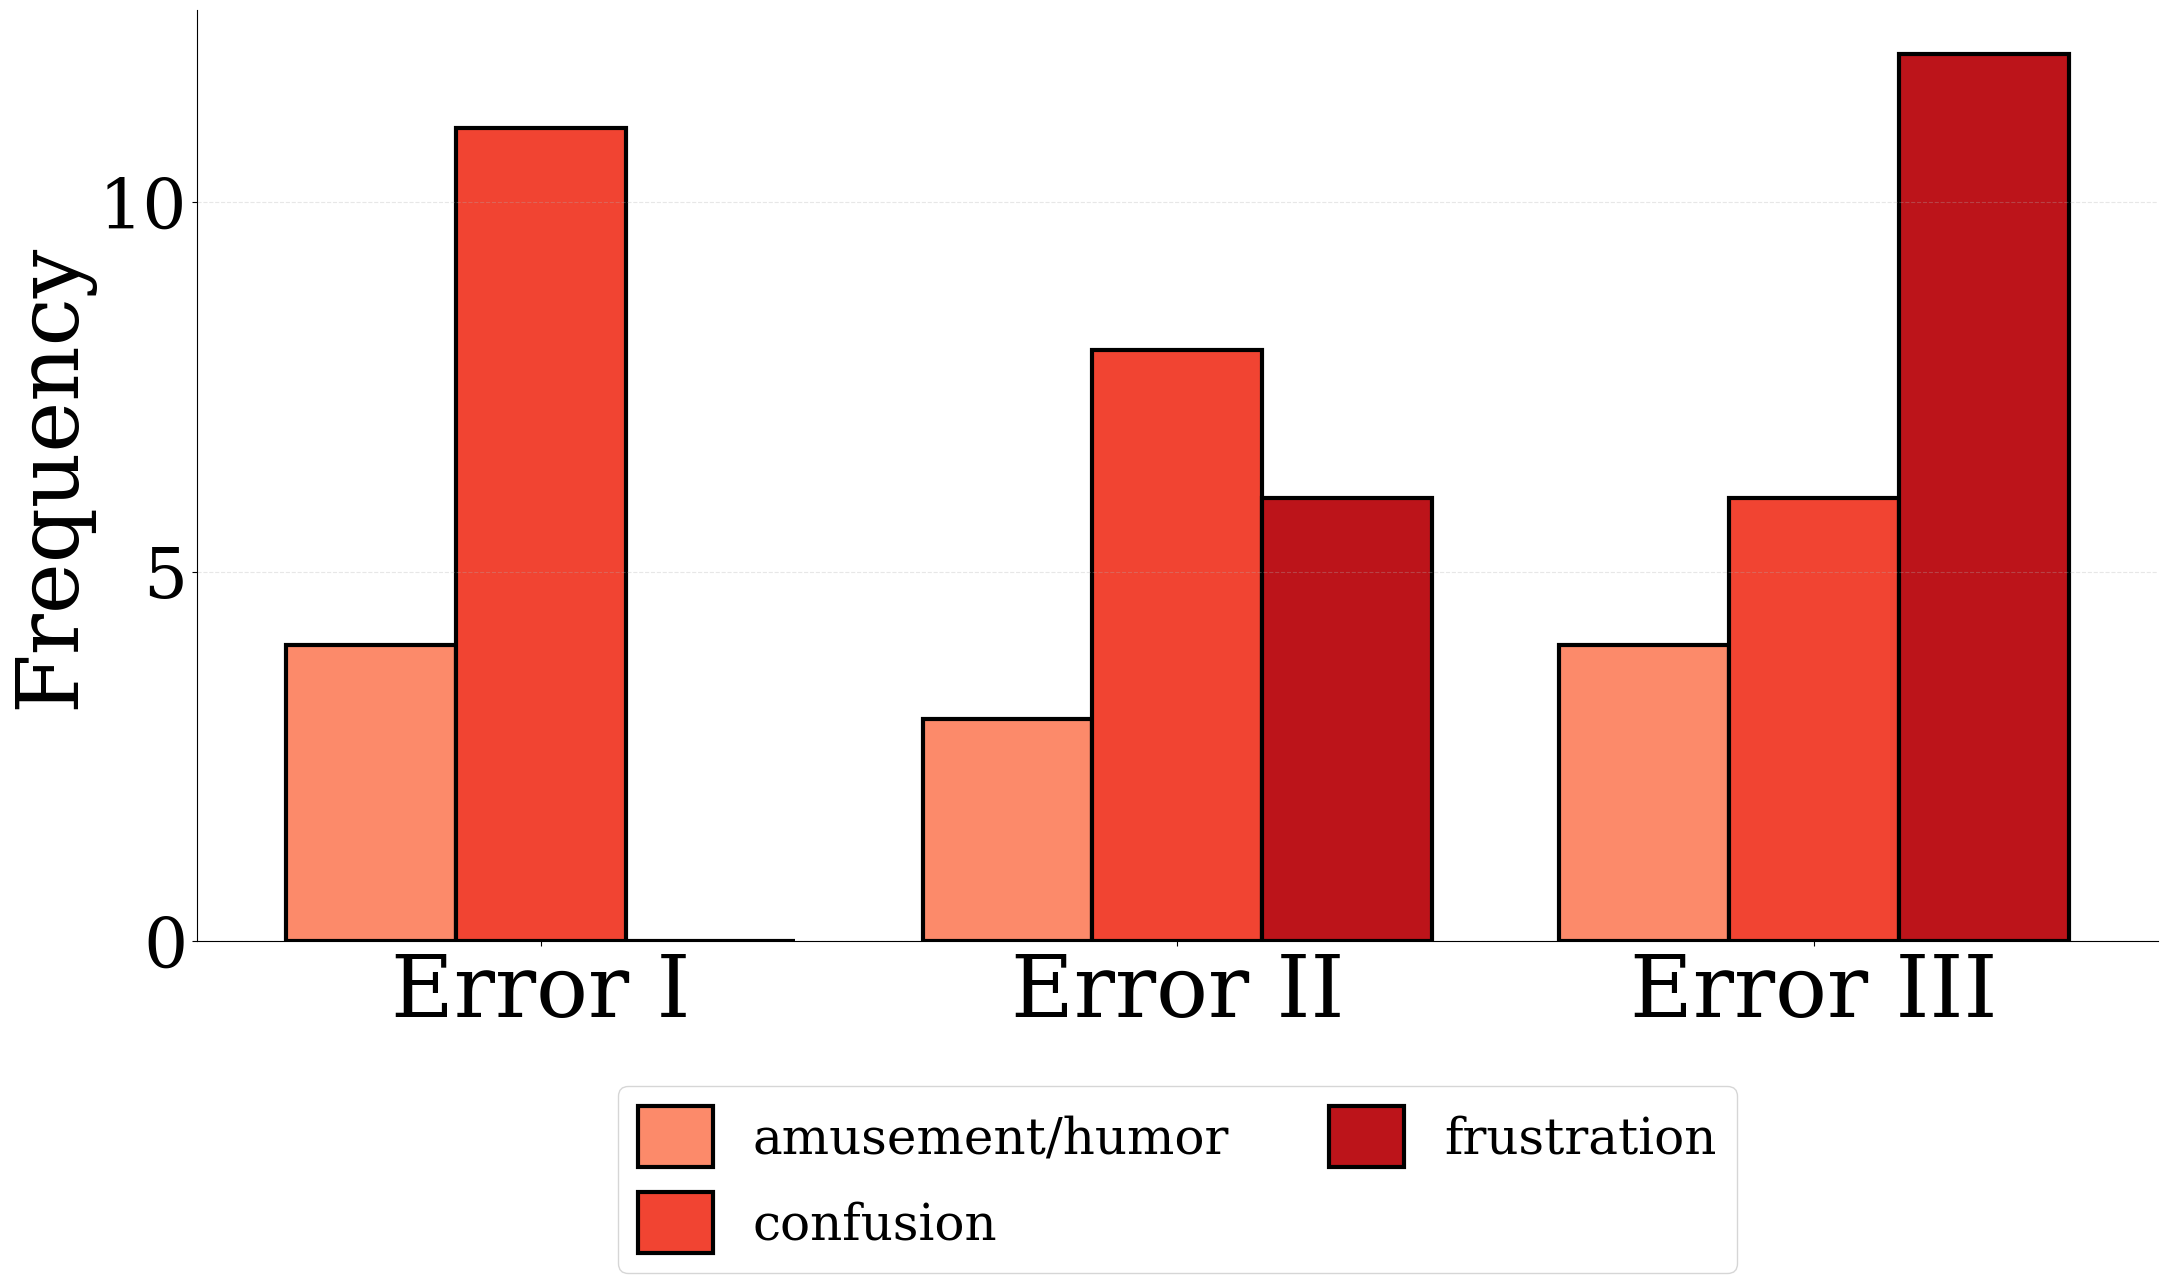


Summary for Emotional Reactions:
  Error 1: 15 total reactions
  Error 2: 17 total reactions
  Error 3: 22 total reactions
Most common reactions in this category:
  confusion: 25 times
  frustration: 18 times
  amusement/humor: 11 times
Creating histogram for: Disengagement Behaviors
Found 77 reactions for this category
Grouped data:
subcode_readable  stands up  leaves room  quitting  looks for researcher  \
error                                                                      
1                         1            0         0                     6   
2                         0            2         3                    12   
3                         0            2         2                     7   

subcode_readable  no prompt  
error                        
1                         7  
2                        21  
3                        14  
Plot saved to plots/disengagement_annotations_histogram.png


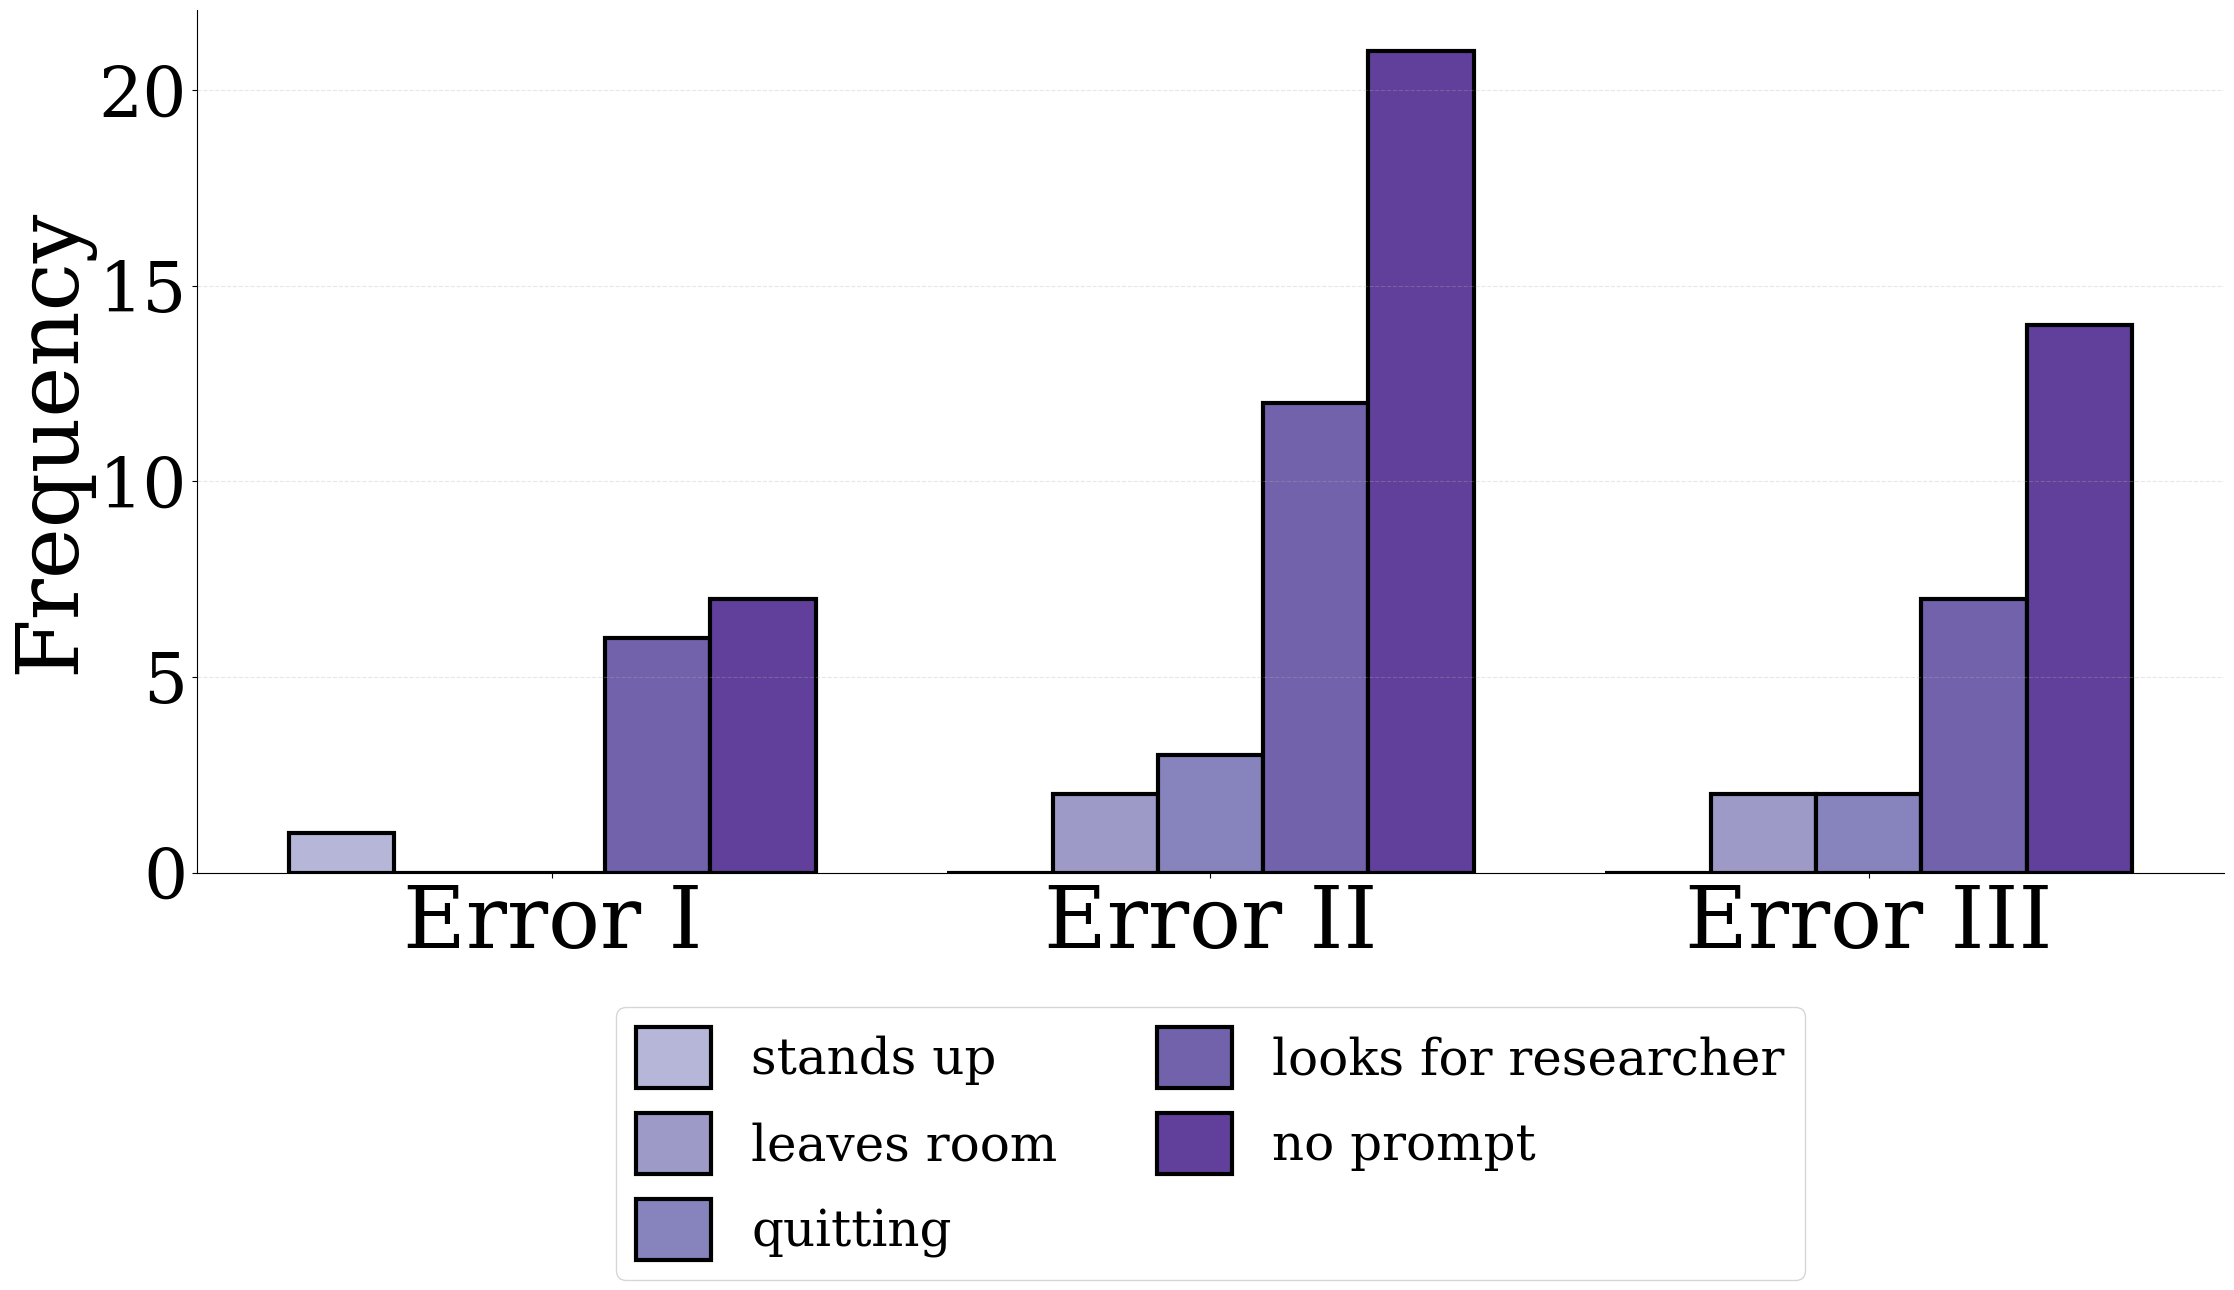


Summary for Disengagement Behaviors:
  Error 1: 14 total reactions
  Error 2: 38 total reactions
  Error 3: 25 total reactions
Most common reactions in this category:
  no prompt: 42 times
  looks for researcher: 25 times
  quitting: 5 times
  leaves room: 4 times
  stands up: 1 times


In [12]:
# @title Create Grouped Bar Chart for Each Category

def plot_category_histogram(annotation_list, annotation_name, colormap, filename_suffix):
    """
    Create a grouped bar chart for specific annotation categories across errors
    
    Parameters:
    - annotation_list: List of specific annotations to include
    - annotation_name: Name for the category (for legend title)
    - colormap: Matplotlib colormap to use
    - filename_suffix: Suffix for the saved filename
    """
    
    # Read the reactions data
    print(f"Creating histogram for: {annotation_name}")
    data = pd.read_csv('reactions_between_errors.csv')
    
    # Filter data to only include annotations in our list
    data_filtered = data[data['subcode_readable'].isin(annotation_list)].copy()
    
    print(f"Found {len(data_filtered)} reactions for this category")
    
    if len(data_filtered) == 0:
        print(f"WARNING: No reactions found for {annotation_name}")
        print("Available subcode_readable values:", data['subcode_readable'].unique())
        return
    
    # Group by error and subcode_readable to get frequency matrix
    grouped_data = data_filtered.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    
    # Ensure we have all errors (1, 2, 3) even if some are missing
    all_errors = [1, 2, 3]
    grouped_data = grouped_data.reindex(index=all_errors, fill_value=0)
    
    # Ensure we have all annotations even if some don't appear
    grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)
    
    print("Grouped data:")
    print(grouped_data)
    
    # Set up the plot
    errors = grouped_data.index
    annotations = grouped_data.columns
    num_annotations = len(annotations)
    
    # Calculate bar positions
    bar_width = 0.8 / num_annotations
    x_positions = np.arange(len(errors))
    
    # Generate colors
    colors = colormap(np.linspace(0.4, 0.8, num_annotations))
    
    # Create the figure - larger and more horizontal for two-column paper
    plt.figure(figsize=(24, 15), facecolor='white')
    plt.rcParams.update({'font.size': 62})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Create bars for each annotation
    for i, (annotation, color) in enumerate(zip(annotations, colors)):
        plt.bar(
            x_positions + i * bar_width - bar_width * (num_annotations - 1) / 2,
            grouped_data[annotation],
            width=bar_width,
            label=annotation,
            color=color,
            edgecolor='black',
            linewidth=3
        )
    
    # Customize the plot
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(x_positions, x_labels, fontsize=62)
    plt.ylabel("Frequency", fontsize=62)
    plt.yticks(fontsize=50)
    
    # Add legend - more compact placement
    plt.legend(
        #title=annotation_name, 
        #title_fontsize=48, 
        bbox_to_anchor=(0.5, -0.15), 
        loc='upper center', 
        fontsize=36, 
        handleheight=1.5, 
        handlelength=1.5, 
        borderaxespad=0.1,
        ncol=2
    )
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    filename = f'plots/{filename_suffix}_annotations_histogram.png'
    plt.savefig(filename, format='png', dpi=500, bbox_inches='tight')
    print(f"Plot saved to {filename}")
    plt.savefig(f'plots/{filename_suffix}_annotations_histogram.pdf', format='pdf', bbox_inches='tight')
    
    
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary for {annotation_name}:")
    total_per_error = grouped_data.sum(axis=1)
    for error_num in [1, 2, 3]:
        print(f"  Error {error_num}: {total_per_error.get(error_num, 0)} total reactions")
    
    print(f"Most common reactions in this category:")
    overall_freq = data_filtered['subcode_readable'].value_counts()
    for reaction, count in overall_freq.items():
        print(f"  {reaction}: {count} times")

# Example usage - Verbal Tone or Cadence
plot_category_histogram(
    annotation_list=verbal_tone_list,
    annotation_name="Verbal Tone or Cadence",
    colormap=cm.Greens,
    filename_suffix="tone_cadence"
)

# Example usage - Reprompting Strategies
plot_category_histogram(
    annotation_list=reprompting_list,
    annotation_name="Reprompting Strategies",
    colormap=cm.Blues,
    filename_suffix="reprompting_strategies"
)

# Example usage - Emotional Reactions
plot_category_histogram(
    annotation_list=emotion_list,
    annotation_name="Emotional Reactions",
    colormap=cm.Reds,
    filename_suffix="emotional_reactions"
)

# Example usage - Disengagement Behaviors
plot_category_histogram(
    annotation_list=disengagement_list,
    annotation_name="Disengagement Behaviors", 
    colormap=cm.Purples,
    filename_suffix="disengagement"
)

# Quick function to plot all categories at once
def plot_all_categories():
    """Plot histograms for all main categories"""
    
    categories_to_plot = {
        "Verbal Tone or Cadence": {
            "list": ["slower speech", "demanding tone", "interrogative tone", "filler words", "assertive tone"],
            "colormap": cm.Greens,
            "suffix": "tone_cadence"
        },
        "Reprompting Strategies": {
            "list": [ "repeats prompt", 
    "more specific/longer prompt", 
    "swaps terms", 
    "simpler prompt",
    "makes new prompt",
    "'please'",
    "longer prompt"],
            "colormap": cm.Blues,
            "suffix": "reprompting"
        },
        "Emotional Reactions": {
            "list": ["amusement/humor", "confusion", "frustration"],
            "colormap": cm.Reds,
            "suffix": "emotions"
        },
        "Disengagement": {
            "list": ["looks at PC", "changes position", "stands up", "leaves room", "quitting", "looks for researcher"],
            "colormap": cm.Purples,
            "suffix": "disengagement"
        },
        "Calls for Backup": {
            "list": ["looks at PC", 
    "changes position", 
    "stands up", 
    "leaves room", 
    "quitting",
    "looks for researcher",
    "speaks to researcher",
    "tries to look at researcher",
    "looks for researcher",
    "looks at robot"],
            "colormap": cm.Greys,
            "suffix": "calls_backup"
        }
    }
    
    for category_name, config in categories_to_plot.items():
        print("\n" + "="*60)
        plot_category_histogram(
            annotation_list=config["list"],
            annotation_name=category_name,
            colormap=config["colormap"],
            filename_suffix=config["suffix"]
        )

# Uncomment the line below to plot all categories at once
# plot_all_categories()

Loading reactions_between_errors.csv...
Loaded 402 reaction events
Available subcode_readable values: ["'please'", 'amusement/humor', 'assertive tone', 'changes position', 'confusion', 'demanding tone', 'filler words', 'frustration', 'interrogative tone', 'leaves room', 'looks at PC', 'looks at robot', 'looks for researcher', 'more specific/longer prompt', 'moves closer to robot', 'no prompt', 'quitting', 'repeats prompt', 'simpler prompt', 'slower speech', 'stands up', 'swaps terms']
Note: The following reactions were categorized as 'other': ['looks at PC' 'changes position' 'looks at robot']
Grouped data (raw counts):
reaction_category  no prompt  looks for researcher  quitting  leaves room  \
error                                                                       
1                          7                     6         0            0   
2                         21                    12         3            2   
3                         14                     7         2    

<Figure size 2800x2200 with 0 Axes>

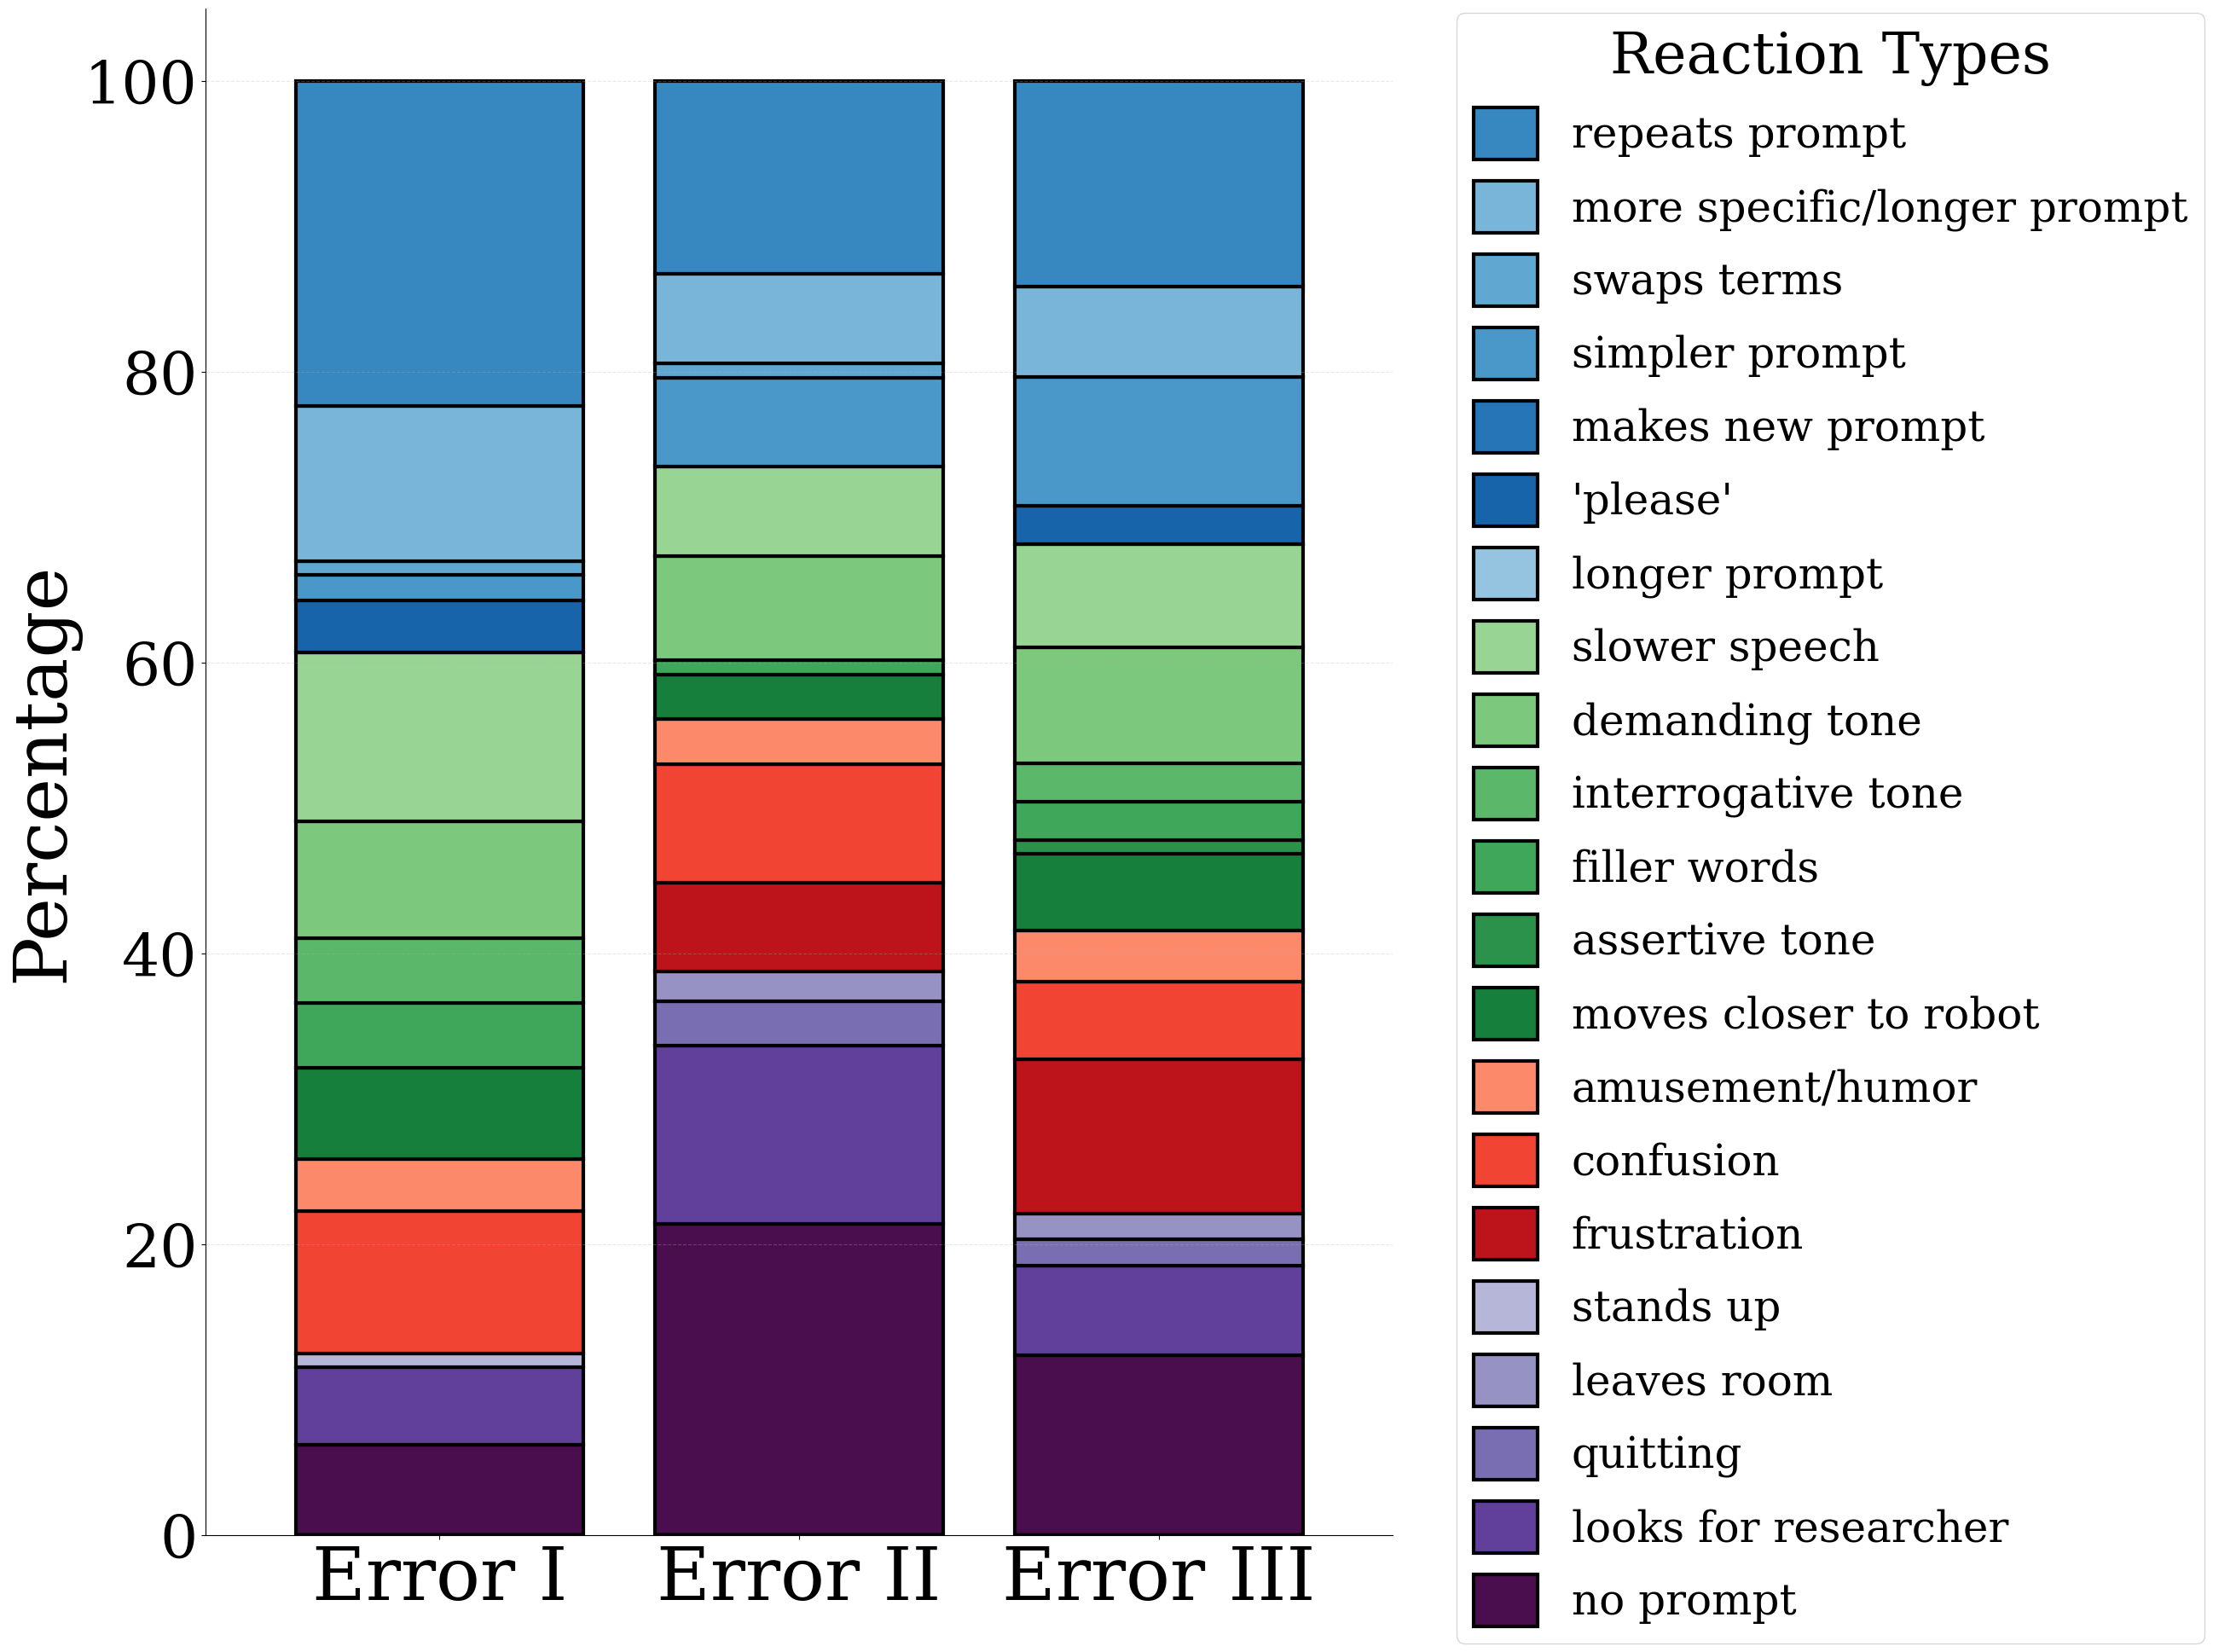


DETAILED STATISTICS

Error 1:
  Total reactions: 112
  Breakdown:
    no prompt: 7 (6.2%)
    looks for researcher: 6 (5.4%)
    stands up: 1 (0.9%)
    confusion: 11 (9.8%)
    amusement/humor: 4 (3.6%)
    moves closer to robot: 7 (6.2%)
    filler words: 5 (4.5%)
    interrogative tone: 5 (4.5%)
    demanding tone: 9 (8.0%)
    slower speech: 13 (11.6%)
    'please': 4 (3.6%)
    simpler prompt: 2 (1.8%)
    swaps terms: 1 (0.9%)
    more specific/longer prompt: 12 (10.7%)
    repeats prompt: 25 (22.3%)

Error 2:
  Total reactions: 98
  Breakdown:
    no prompt: 21 (21.4%)
    looks for researcher: 12 (12.2%)
    quitting: 3 (3.1%)
    leaves room: 2 (2.0%)
    frustration: 6 (6.1%)
    confusion: 8 (8.2%)
    amusement/humor: 3 (3.1%)
    moves closer to robot: 3 (3.1%)
    filler words: 1 (1.0%)
    demanding tone: 7 (7.1%)
    slower speech: 6 (6.1%)
    simpler prompt: 6 (6.1%)
    swaps terms: 1 (1.0%)
    more specific/longer prompt: 6 (6.1%)
    repeats prompt: 13 (13.3%)

E

In [10]:
# @title Create Stacked Percentage Chart

def create_stacked_percentage_chart():
    """Create a stacked percentage bar chart showing reaction distribution across errors"""
    
    # Use all annotations from the expanded lists
    annotation_list = (reprompting_list + verbal_tone_list + emotion_list + 
                      [item for item in disengagement_list if item not in reprompting_list + verbal_tone_list + emotion_list])
    
    # Use the updated categories (already declared in notebook)
    # categories variable is already available
    
    # Use the updated category_colormaps (already declared in notebook)
    # category_colormaps variable is already available
    
    def get_shaded_colors(cmap, labels):
        """Generate shaded colors for labels in a category"""
        if len(labels) == 1:
            return [cmap(0.4)]  # Single color for single label
        return cmap(np.linspace(0.4, 0.8, len(labels)))
    
    # Create label color mapping using the updated categories and colormaps
    label_colors = {}
    for category, labels in categories.items():
        if category in category_colormaps:
            cmap = category_colormaps[category]
            if category == "did not engage":
                # Use a single shade of grey for this category
                cmap = cm.Greys
            elif category == "disengagement":
                # Use purple tones for disengagement
                cmap = cm.Purples
            shades = get_shaded_colors(cmap, labels)
            label_colors.update(dict(zip(labels, shades)))
    
    # Read the reactions data
    print("Loading reactions_between_errors.csv...")
    data = pd.read_csv('reactions_between_errors.csv')
    
    print(f"Loaded {len(data)} reaction events")
    print(f"Available subcode_readable values: {sorted(data['subcode_readable'].unique())}")
    
    # Filter data to only include annotations in our list, or mark as "other"
    data_filtered = data.copy()
    data_filtered['reaction_category'] = data_filtered['subcode_readable'].apply(
        lambda x: x if x in annotation_list else "other"
    )
    #print which ones are not in annotation_list
    unknown_reactions = data_filtered[~data_filtered['subcode_readable'].isin(annotation_list)]['subcode_readable'].unique()
    if len(unknown_reactions) > 0:
        print(f"Note: The following reactions were categorized as 'other': {unknown_reactions}")
    
    # Group by error and reaction category
    grouped_data = data_filtered.groupby(['error', 'reaction_category']).size().unstack(fill_value=0)
    
    # Ensure we have all errors (1, 2, 3)
    grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
    
    # Add "other" to annotation list if it appears in data
    if "other" in grouped_data.columns:
        annotation_list_with_other = annotation_list + ["other"]
        label_colors["other"] = cm.Greys(0.5)  # Grey color for "other"
    else:
        annotation_list_with_other = annotation_list

    #temp:
    annotation_list_with_other = annotation_list

    # Reindex to include all annotations
    grouped_data = grouped_data.reindex(columns=annotation_list_with_other, fill_value=0)
    
    # Reverse the column order for plotting (reprompting on top, etc.)
    grouped_data = grouped_data[grouped_data.columns[::-1]]
    
    print("Grouped data (raw counts):")
    print(grouped_data)
    
    # Calculate percentages
    row_sums = grouped_data.sum(axis=1)
    print(f"\nTotal reactions per error: {row_sums.to_dict()}")
    
    # Handle cases where there are no reactions for an error
    grouped_data_percentage = grouped_data.div(row_sums, axis=0).fillna(0) * 100
    
    print("Grouped data (percentages):")
    print(grouped_data_percentage)
    
    # Create the plot - larger vertical format with improved quality
    plt.figure(figsize=(28, 22), facecolor='white')
    plt.rcParams.update({'font.size': 62})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Get colors for the plot, with fallback for uncategorized items (matching reversed order)
    colors = []
    for label in grouped_data.columns:  # This will now be in reversed order
        if label == "no prompt":
            # Make "no prompt" a really dark purple
            colors.append('#4A0E4E')  # Dark purple
        elif label in label_colors:
            colors.append(label_colors[label])
        elif label == "other":
            colors.append(cm.Greys(0.5))
        else:
            # Fallback color for uncategorized items
            colors.append(cm.Greys(0.7))
    
    # Create stacked bar chart
    ax = grouped_data_percentage.plot(
        kind='bar',
        stacked=True,
        figsize=(28, 22),
        width=0.8,
        color=colors,
        edgecolor='black',
        linewidth=3
    )
    
    ax.set_facecolor('white')
    
    # Customize the plot
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(np.arange(len(grouped_data.index)), x_labels, fontsize=62, rotation=0)
    plt.xlabel("", fontsize=62)
    plt.ylabel("Percentage", fontsize=62)
    plt.yticks(fontsize=50)
    
    # Add legend - keep on the side with original order
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        handles[::-1], labels[::-1],  # Reverse handles and labels to restore original order
        title="Reaction Types",
        title_fontsize=48,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=36,
        handleheight=1.5,
        handlelength=1.5,
        borderaxespad=0.1
    )
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add horizontal grid lines
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('plots/percentage_annotations_stacked.png', format='png', dpi=500, facecolor="white", bbox_inches='tight')
    print("Plot saved to 'plots/percentage_annotations_stacked.png'")
    plt.savefig('plots/percentage_annotations_stacked.pdf', format='pdf', facecolor="white", bbox_inches='tight')
    
    
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("DETAILED STATISTICS")
    print("="*60)
    
    for error_num in [1, 2, 3]:
        print(f"\nError {error_num}:")
        total_reactions = row_sums.get(error_num, 0)
        print(f"  Total reactions: {total_reactions}")
        
        if total_reactions > 0:
            error_data = grouped_data.loc[error_num]
            error_percentages = grouped_data_percentage.loc[error_num]
            
            print("  Breakdown:")
            for reaction in grouped_data.columns:  # Use the actual column order (reversed)
                count = error_data.get(reaction, 0)
                percentage = error_percentages.get(reaction, 0)
                if count > 0:
                    print(f"    {reaction}: {count} ({percentage:.1f}%)")
        else:
            print("  No reactions recorded")
    
    # Category-level analysis
    print(f"\n" + "="*60)
    print("CATEGORY-LEVEL ANALYSIS")
    print("="*60)
    
    for category, reactions in categories.items():
        print(f"\n{category.upper()}:")
        category_totals = {}
        for error_num in [1, 2, 3]:
            total = sum(grouped_data.loc[error_num, reaction] for reaction in reactions if reaction in grouped_data.columns)
            category_totals[error_num] = total
        
        total_overall = sum(category_totals.values())
        print(f"  Total across all errors: {total_overall}")
        for error_num, total in category_totals.items():
            if row_sums.get(error_num, 0) > 0:
                percentage = (total / row_sums[error_num]) * 100
                print(f"  Error {error_num}: {total} reactions ({percentage:.1f}% of error)")
            else:
                print(f"  Error {error_num}: {total} reactions (no data for this error)")

# Run the function
create_stacked_percentage_chart()

# Alternative version with different annotation selections
def create_custom_stacked_chart(annotation_subset, chart_title, filename_suffix):
    """Create a custom stacked chart with a subset of annotations"""
    
    print(f"\n" + "="*60)
    print(f"CREATING CUSTOM CHART: {chart_title}")
    print("="*60)
    
    # Read the data
    data = pd.read_csv('reactions_between_errors.csv')
    
    # Filter to only selected annotations
    data_filtered = data[data['subcode_readable'].isin(annotation_subset)].copy()
    
    if len(data_filtered) == 0:
        print(f"No data found for selected annotations: {annotation_subset}")
        return
    
    # Group by error and reaction
    grouped_data = data_filtered.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
    grouped_data = grouped_data.reindex(columns=annotation_subset, fill_value=0)
    
    # Reverse the column order for plotting
    grouped_data = grouped_data[grouped_data.columns[::-1]]
    
    # Calculate percentages
    row_sums = grouped_data.sum(axis=1)
    grouped_data_percentage = grouped_data.div(row_sums, axis=0).fillna(0) * 100
    
    # Generate colors with special handling for "no prompt" (matching reversed order)
    colors = []
    for i, annotation in enumerate(grouped_data.columns):  # Use reversed order from grouped_data
        if annotation == "no prompt":
            colors.append('#4A0E4E')  # Dark purple
        else:
            colors.append(cm.Set3(i / len(grouped_data.columns)))
    
    # Create plot - improved dimensions and formatting
    plt.figure(figsize=(28, 22), facecolor='white')
    plt.rcParams.update({'font.size': 48})
    plt.rcParams.update({'font.family': 'arial'})
    
    ax = grouped_data_percentage.plot(
        kind='bar',
        stacked=True,
        figsize=(28, 22),
        width=0.8,
        color=colors,
        edgecolor='black',
        linewidth=3
    )
    
    # Formatting
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(range(3), x_labels, rotation=0, fontsize=48)
    plt.xlabel("", fontsize=48)
    plt.ylabel("Percentage", fontsize=48)
    plt.yticks(fontsize=40)
    plt.title(chart_title, fontsize=42, pad=20)
    # Fix legend order to match original annotation order
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=32)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(f'plots/{filename_suffix}_stacked.png', format='png', dpi=500, bbox_inches='tight')
    plt.show()
    
    print(f"Custom chart saved to 'plots/{filename_suffix}_stacked.png'")

# Example custom charts
# create_custom_stacked_chart(
#     ["amusement/humor", "confusion", "frustration"],
#     "Emotional Reactions Across Errors", 
#     "emotions_only"
# )

# create_custom_stacked_chart(
#     ["repeats prompt", "simpler prompt", "more specific/longer prompt"],
#     "Prompting Strategies Across Errors",
#     "prompting_only" 
# )

Classifying engagement by error using specified logic...
Engages with robot subcodes: {'filler words', 'swaps terms', 'assertive tone', 'interrogative tone', 'makes new prompt', 'more specific/longer prompt', "'please'", 'moves closer to robot', 'simpler prompt', 'slower speech', 'demanding tone', 'repeats prompt', 'longer prompt'}
Disengages from robot subcodes: {'stands up', 'looks for researcher', 'quitting', 'no prompt', 'speaks to researcher', 'leaves room'}

Participant P10, Error 1:
  Found ENGAGES: 'please'
    eng = 1
  Found ENGAGES: interrogative tone
    eng = 1
  Found ENGAGES: simpler prompt
    eng = 1
  Final classification for Error 1: 1

Participant P10, Error 2:
  Ignored: frustration
  Found DISENGAGES: no prompt
    eng = 2
  Final classification for Error 2: 2

Participant P10, Error 3:
  Found ENGAGES: simpler prompt
    eng = 1
  Ignored: frustration
  Found ENGAGES: slower speech
    eng = 1
  Found ENGAGES: more specific/longer prompt
    eng = 1
  Final class

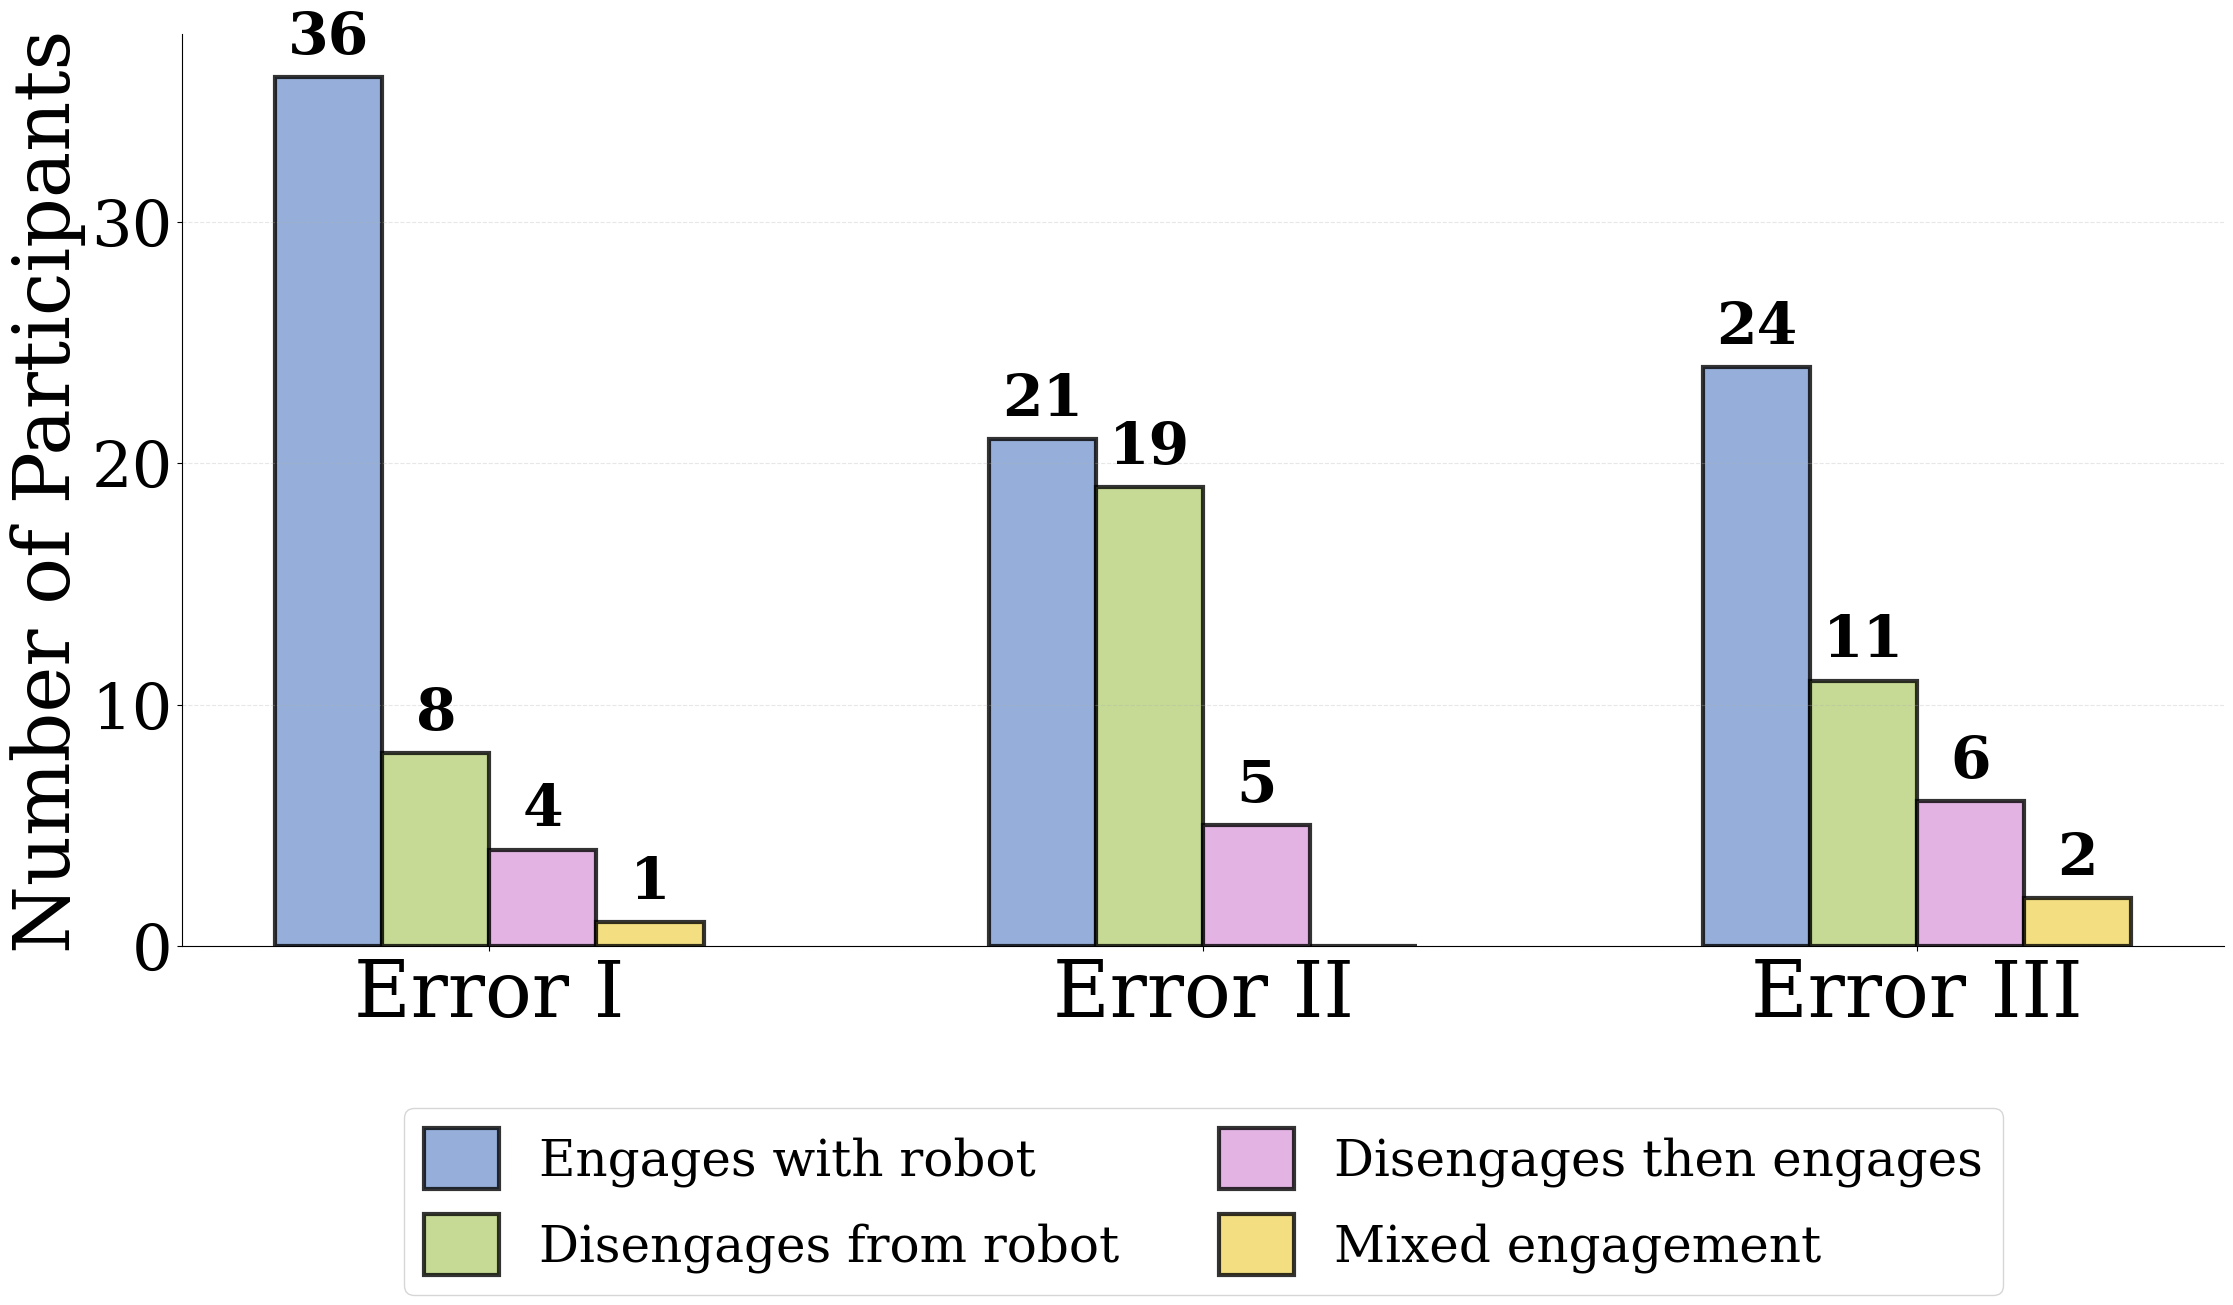

Engagement types by error saved to 'plots/engagement_types_by_error.png'

2. Analyzing engagement consistency...


/tmp/ipykernel_92616/1267598731.py:215: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


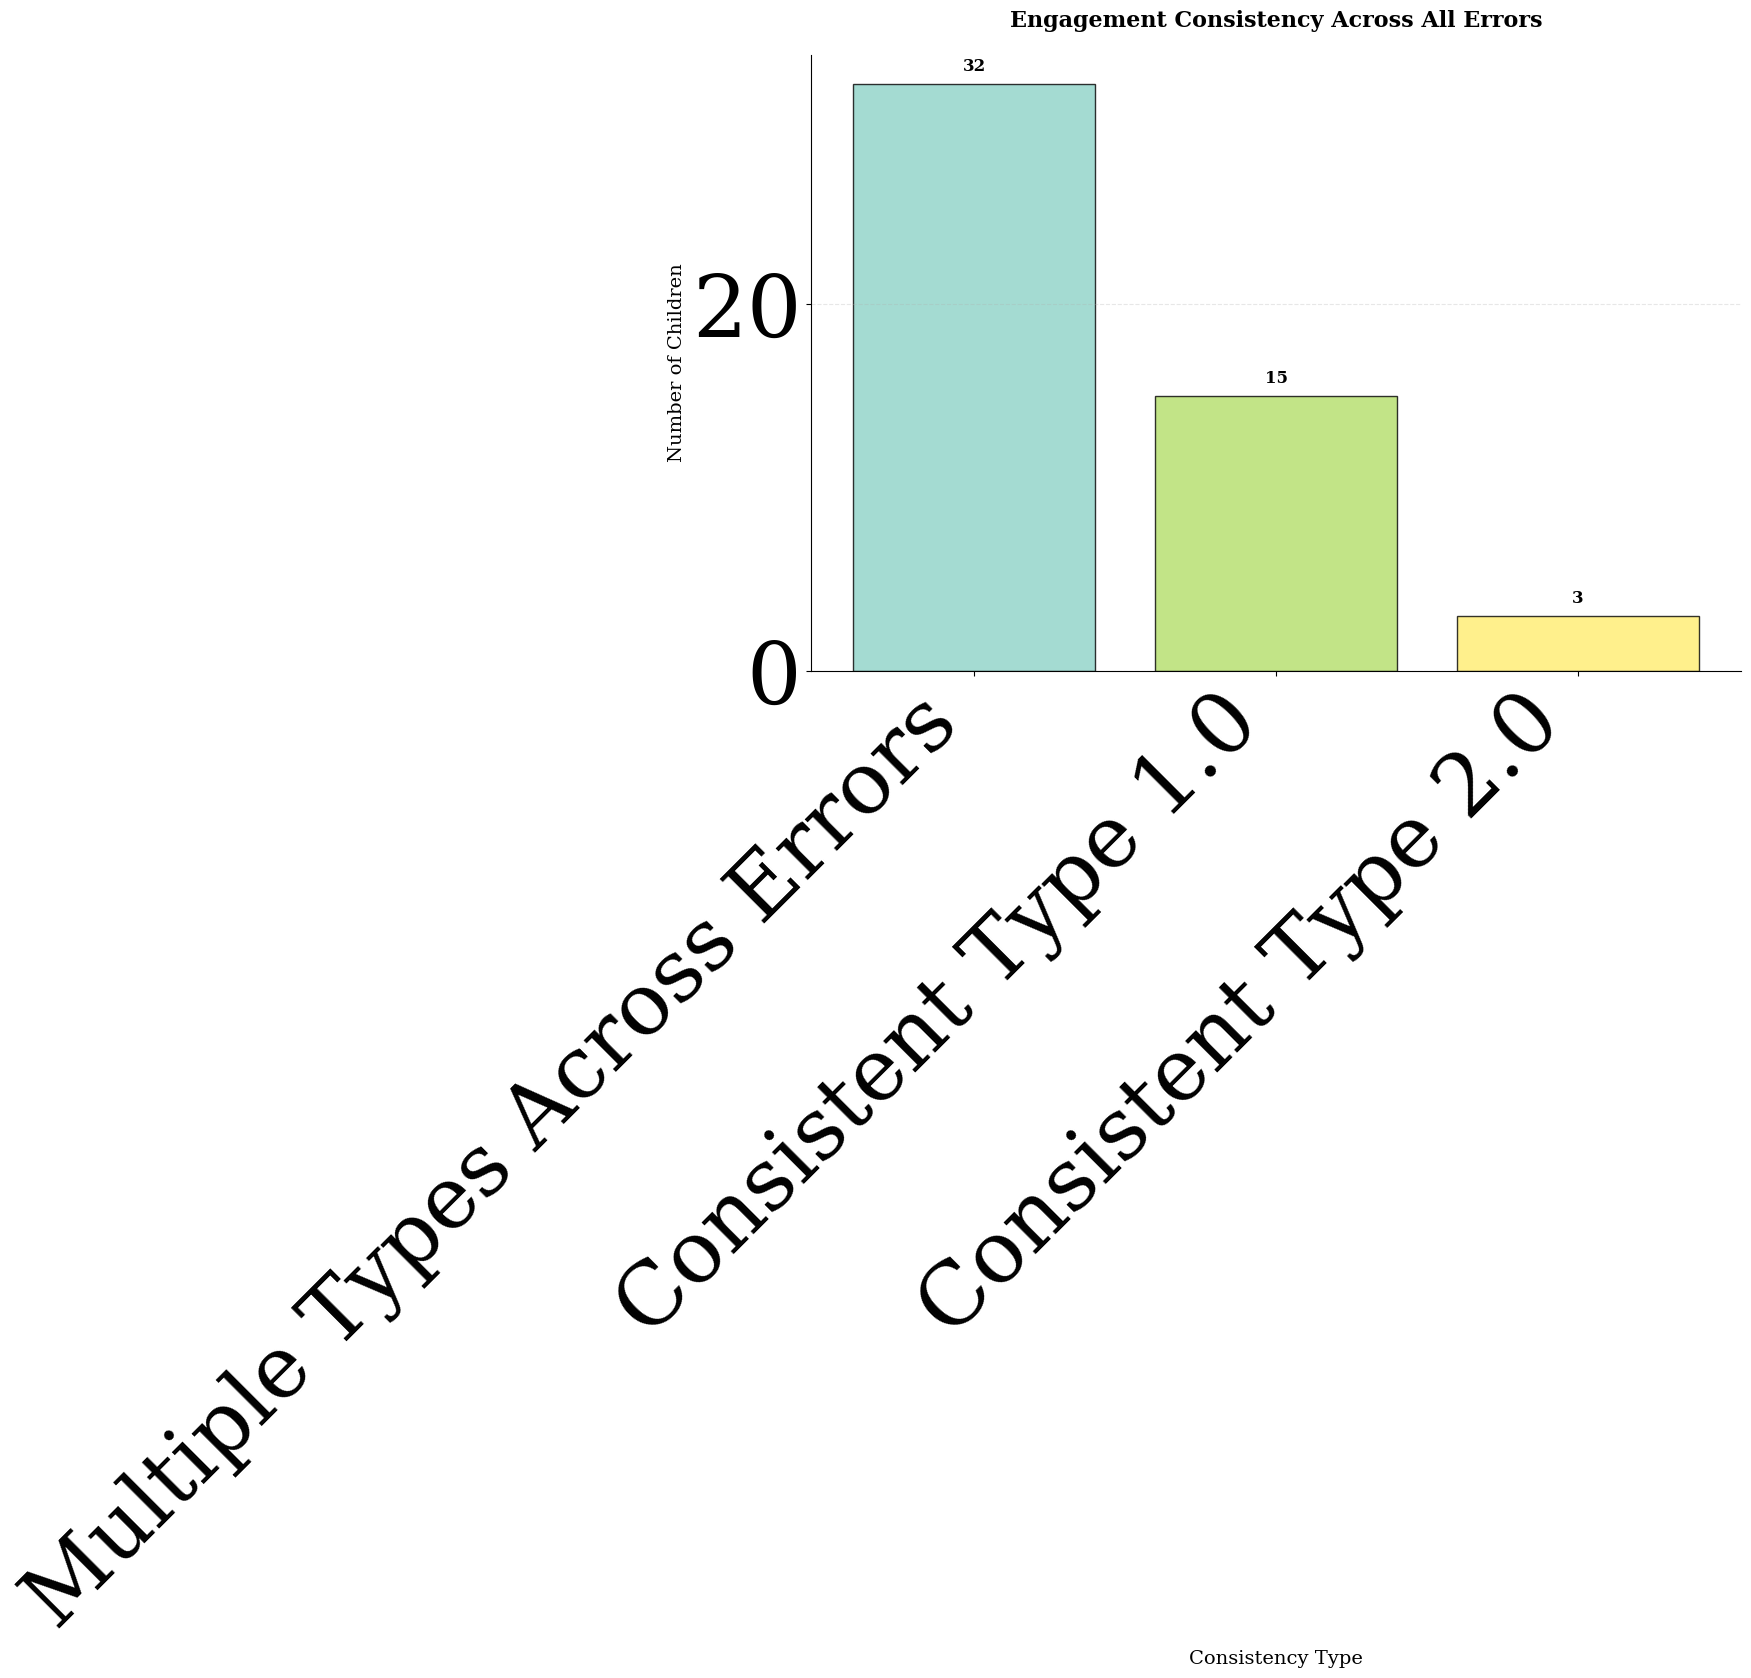

Engagement consistency plot saved to 'plots/engagement_consistency.png'

3. Analyzing engagement paths...

MOST COMMON ENGAGEMENT PATHS
Legend: 1=Engages, 2=Disengages, 3=Eng→Diseng, 4=Diseng→Eng, 5=Mixed, X=No data

 1. 1.0 → 1.0 → 1.0: 15 children (30.0%)
 2. 1.0 → 2.0 → 1.0:  5 children (10.0%)
 3. 1.0 → 2.0 → 2.0:  4 children ( 8.0%)
 4. 1.0 → 4.0 → 4.0:  3 children ( 6.0%)
 5. 1.0 → nan → nan:  3 children ( 6.0%)
 6. 2.0 → 2.0 → 2.0:  3 children ( 6.0%)
 7. 2.0 → 1.0 → 2.0:  2 children ( 4.0%)
 8. 2.0 → 2.0 → nan:  2 children ( 4.0%)
 9. nan → 2.0 → nan:  1 children ( 2.0%)
10. 4.0 → 1.0 → 1.0:  1 children ( 2.0%)


/tmp/ipykernel_92616/1267598731.py:284: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


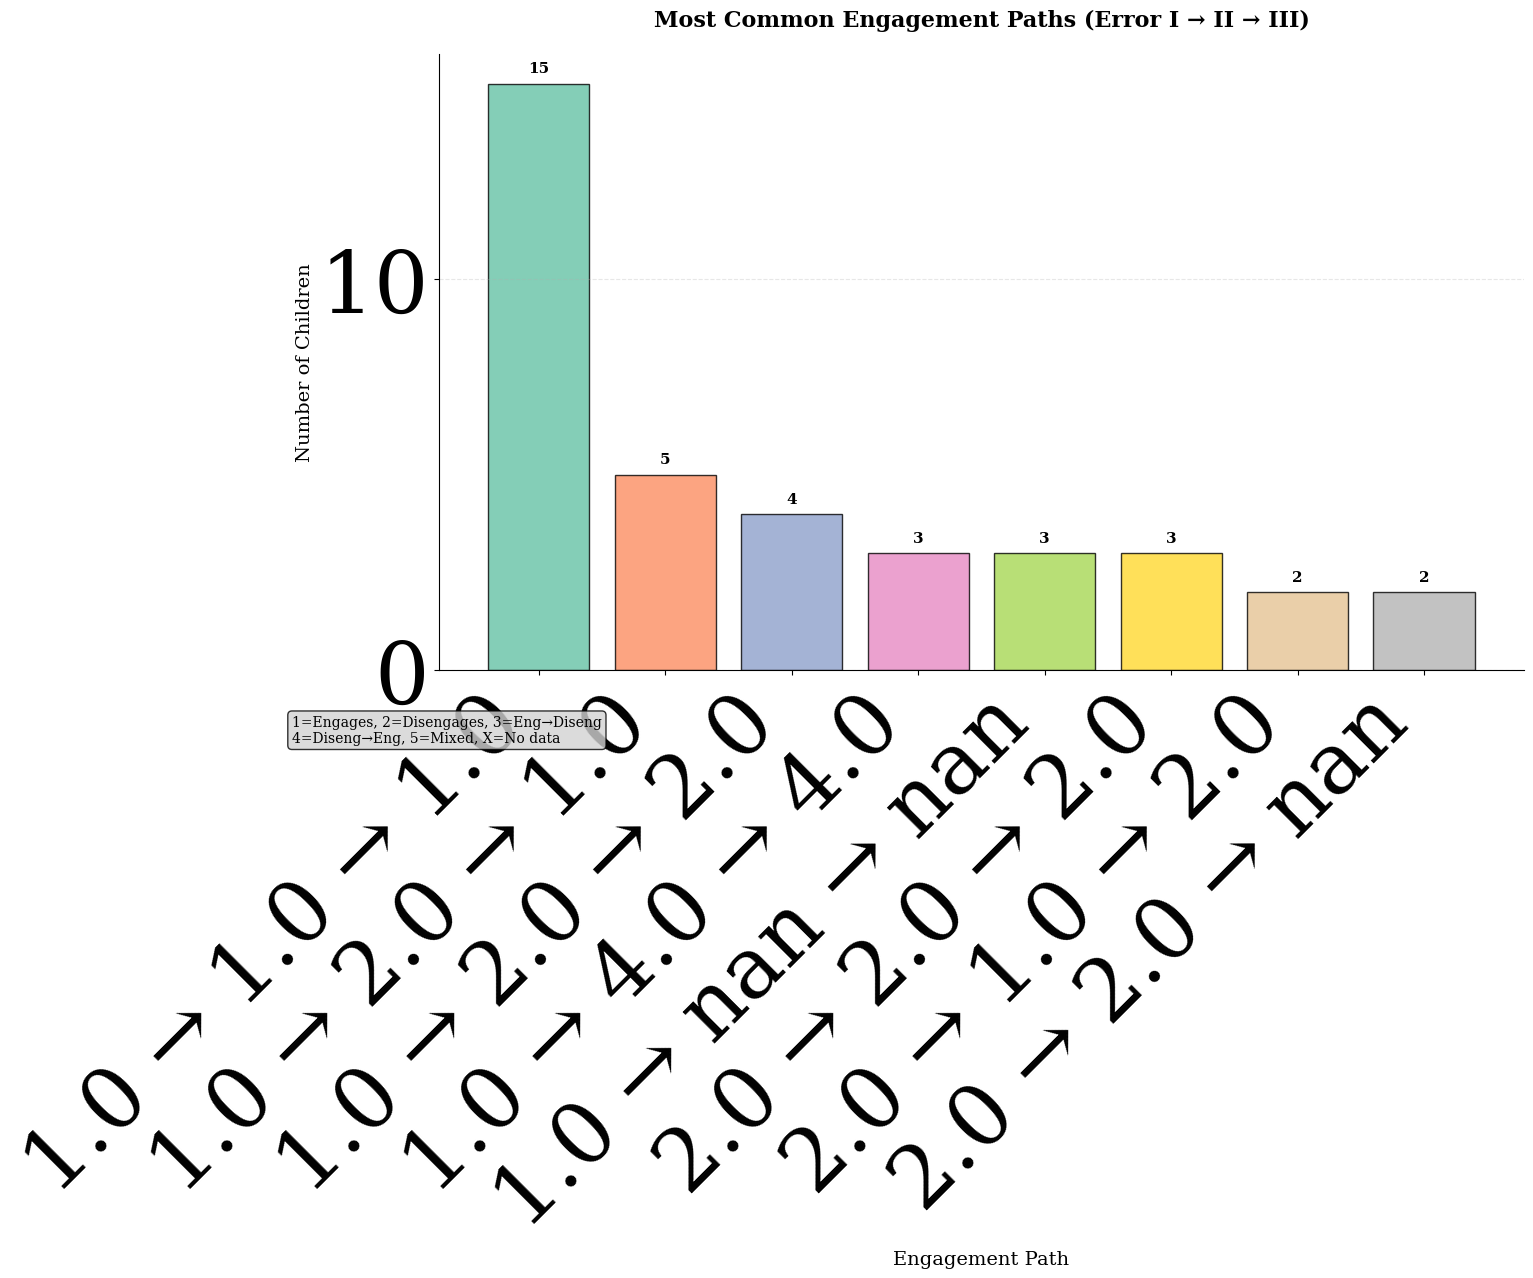

Engagement paths plot saved to 'plots/engagement_paths.png'

Engagement classification results saved to 'engagement_by_error_results.csv'

SUMMARY STATISTICS
Total participants analyzed: 50

Error 1 engagement distribution:
  Engages: 36 children (72.0%)
  Disengages: 8 children (16.0%)
  Diseng→Eng: 4 children (8.0%)
  Mixed: 1 children (2.0%)

Error 2 engagement distribution:
  Engages: 21 children (42.0%)
  Disengages: 19 children (38.0%)
  Diseng→Eng: 5 children (10.0%)

Error 3 engagement distribution:
  Engages: 24 children (48.0%)
  Disengages: 11 children (22.0%)
  Diseng→Eng: 6 children (12.0%)
  Mixed: 2 children (4.0%)


In [17]:
# @title Classify Engagement by Error

def classify_engagement_by_error():
    """Classify each participant's engagement for each error using the specified logic"""
    
    # Define the new engagement categories
    engagement_categories = {
        "engages with robot": ["longer prompt", "more specific/longer prompt", "swaps terms", "simpler prompt",
                              "repeats prompt","makes new prompt","'please'",
                              "slower speech", "demanding tone", "interrogative tone", "filler words",
                              "assertive tone","moves closer to robot"],
        "disengages from robot": ["speaks to researcher", "looks for researcher",
                                 "stands up", "leaves room", "no prompt","quitting"]
    }
    
    engages_subcodes = set(engagement_categories["engages with robot"])
    disengages_subcodes = set(engagement_categories["disengages from robot"])
    
    print("Engages with robot subcodes:", engages_subcodes)
    print("Disengages from robot subcodes:", disengages_subcodes)
    
    # Read the reactions data
    data = pd.read_csv('reactions_between_errors.csv')
    
    # Initialize results
    results = []
    
    participants = data['participant_id'].unique()
    
    for participant in participants:
        participant_data = data[data['participant_id'] == participant]
        
        participant_results = {'participant_id': participant}
        
        for error in [1, 2, 3]:
            error_data = participant_data[participant_data['error'] == error].sort_values('start')
            
            # Initialize engagement state for this error
            eng = None  # Using None instead of NaN for cleaner logic
            
            print(f"\nParticipant {participant}, Error {error}:")
            
            # Process each annotation row for this error
            for _, row in error_data.iterrows():
                subcode = row['subcode_readable']
                
                if subcode in engages_subcodes:
                    print(f"  Found ENGAGES: {subcode}")
                    if eng == 1 or eng is None:
                        eng = 1
                        print(f"    eng = 1")
                    elif eng == 2 or eng == 4:
                        eng = 4
                        print(f"    eng = 4 (disengages then engages)")
                    else:
                        eng = 5
                        print(f"    eng = 5 (mixed)")
                        
                elif subcode in disengages_subcodes:
                    print(f"  Found DISENGAGES: {subcode}")
                    if eng == 2 or eng is None:
                        eng = 2
                        print(f"    eng = 2")
                    elif eng == 1 or eng == 3:
                        eng = 3
                        print(f"    eng = 3 (engages then disengages)")
                    else:
                        eng = 5
                        print(f"    eng = 5 (mixed)")
                else:
                    print(f"  Ignored: {subcode}")
            
            # Store result for this error
            participant_results[f'error_{error}'] = eng
            print(f"  Final classification for Error {error}: {eng}")
        
        results.append(participant_results)
    
    return pd.DataFrame(results)


def plot_engagement_by_error(results_df):
    """Plot engagement types for each error"""
    
    # Define engagement type labels
    engagement_labels = {
        1: "Engages with robot",
        2: "Disengages from robot", 
        3: "Engages then disengages",
        4: "Disengages then engages",
        5: "Mixed engagement",
        None: "No relevant reactions"
    }
    
    # Create larger, more horizontal figure with improved quality
    plt.figure(figsize=(24, 15), facecolor='white')
    plt.rcParams.update({'font.size': 62})
    plt.rcParams.update({'font.family': 'serif'})
    
    errors = [1, 2, 3]
    engagement_types = [1, 2, 3, 4, 5, None]
    # Use colors similar to positions 3-6 from the engagement paths plot
    colors = ['#7B9BD1', '#B8D17B','#D8A7CA', '#DDA0DD','#F0D862',   '#D3D3D3']
    
    # Count engagement types for each error
    error_counts = {}
    for error in errors:
        col_name = f'error_{error}'
        counts = results_df[col_name].value_counts()
        error_counts[error] = counts
    
    # Filter out engagement types that have zero counts across all errors
    active_types = []
    active_colors = []
    active_labels = []
    
    for eng_type, color in zip(engagement_types, colors):
        total_count = sum(error_counts[error].get(eng_type, 0) for error in errors)
        if total_count > 0:  # Only include if there are any counts
            active_types.append(eng_type)
            active_colors.append(color)
            active_labels.append(engagement_labels[eng_type])
    
    # Create grouped bar chart
    x = np.arange(len(errors))
    width = 0.15  # Width of bars
    
    for i, (eng_type, color, label) in enumerate(zip(active_types, active_colors, active_labels)):
        counts = []
        for error in errors:
            count = error_counts[error].get(eng_type, 0)
            counts.append(count)
        
        plt.bar(x + i * width, counts, width, label=label, color=color, alpha=0.8, 
                edgecolor='black', linewidth=3)
        
        # Add value labels on bars
        for j, count in enumerate(counts):
            if count > 0:
                plt.text(x[j] + i * width, count + 0.5, str(count), 
                        ha='center', va='bottom', fontsize=42, fontweight='bold')
    
    plt.xlabel('', fontsize=56)
    plt.ylabel('Number of Participants', fontsize=56)
    plt.xticks(x + width * (len(active_types)-1) / 2, ['Error I', 'Error II', 'Error III'], fontsize=56)
    plt.yticks(fontsize=46)
    
    # Add legend - positioned below the plot
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize=36, 
              handleheight=1.5, handlelength=1.5, ncol=2)
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('plots/engagement_types_by_error.png', format='png', dpi=500, bbox_inches='tight')
    plt.savefig('plots/engagement_types_by_error.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    print("Engagement types by error saved to 'plots/engagement_types_by_error.png'")

def analyze_overall_engagement_consistency(results_df):
    """Analyze how many children have consistent vs mixed engagement across all errors"""
    
    engagement_patterns = []
    
    for _, row in results_df.iterrows():
        participant_id = row['participant_id']
        error_engagements = [row['error_1'], row['error_2'], row['error_3']]
        
        # Remove None values for analysis
        valid_engagements = [e for e in error_engagements if e is not None]
        unique_engagements = set(valid_engagements)
        
        if len(valid_engagements) == 0:
            consistency = "No engagement data"
        elif len(unique_engagements) == 1:
            eng_type = list(unique_engagements)[0]
            if eng_type in [1, 2]:
                consistency = f"Consistent Type {eng_type}"
            else:
                consistency = f"Consistent Mixed/Complex"
        else:
            consistency = "Multiple Types Across Errors"
        
        engagement_patterns.append({
            'participant_id': participant_id,
            'consistency': consistency,
            'unique_types': len(unique_engagements),
            'valid_errors': len(valid_engagements)
        })
    
    patterns_df = pd.DataFrame(engagement_patterns)
    
    # Plot consistency analysis
    plt.figure(figsize=(12, 8), facecolor='white')
    
    consistency_counts = patterns_df['consistency'].value_counts()
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(consistency_counts)))
    bars = plt.bar(range(len(consistency_counts)), consistency_counts.values, 
                   color=colors, edgecolor='black', alpha=0.8)
    
    # Add value labels
    for bar, count in zip(bars, consistency_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.title('Engagement Consistency Across All Errors', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Consistency Type', fontsize=14)
    plt.ylabel('Number of Children', fontsize=14)
    plt.xticks(range(len(consistency_counts)), consistency_counts.index, rotation=45, ha='right')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('plots/engagement_consistency.png', format='png', dpi=500, bbox_inches='tight')
    plt.show()
    print("Engagement consistency plot saved to 'plots/engagement_consistency.png'")
    
    return patterns_df

def analyze_engagement_paths(results_df):
    """Analyze common engagement paths across Error 1 → 2 → 3"""
    
    # Create engagement sequences
    engagement_sequences = []
    
    for _, row in results_df.iterrows():
        participant_id = row['participant_id']
        sequence = [row['error_1'], row['error_2'], row['error_3']]
        
        # Convert to string representation, handling None values
        sequence_str = " → ".join([str(s) if s is not None else "X" for s in sequence])
        
        engagement_sequences.append({
            'participant_id': participant_id,
            'sequence': sequence,
            'sequence_str': sequence_str
        })
    
    sequences_df = pd.DataFrame(engagement_sequences)
    
    # Count most common paths
    path_counts = sequences_df['sequence_str'].value_counts()
    
    print(f"\n" + "="*60)
    print("MOST COMMON ENGAGEMENT PATHS")
    print("="*60)
    
    print("Legend: 1=Engages, 2=Disengages, 3=Eng→Diseng, 4=Diseng→Eng, 5=Mixed, X=No data")
    print()
    
    for i, (path, count) in enumerate(path_counts.head(10).items(), 1):
        percentage = (count / len(sequences_df)) * 100
        print(f"{i:2d}. {path:15s}: {count:2d} children ({percentage:4.1f}%)")
    
    # Plot top engagement paths
    plt.figure(figsize=(14, 8), facecolor='white')
    
    top_paths = path_counts.head(8)  # Show top 8 paths
    
    colors = plt.cm.Set2(np.linspace(0, 1, len(top_paths)))
    bars = plt.bar(range(len(top_paths)), top_paths.values, 
                   color=colors, edgecolor='black', alpha=0.8)
    
    # Add value labels
    for bar, count in zip(bars, top_paths.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.title('Most Common Engagement Paths (Error I → II → III)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Engagement Path', fontsize=14)
    plt.ylabel('Number of Children', fontsize=14)
    plt.xticks(range(len(top_paths)), top_paths.index, rotation=45, ha='right')
    
    # Add legend explaining the codes
    legend_text = "1=Engages, 2=Disengages, 3=Eng→Diseng\n4=Diseng→Eng, 5=Mixed, X=No data"
    plt.figtext(0.02, 0.02, legend_text, fontsize=10, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.8))
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('plots/engagement_paths.png', format='png', dpi=500, bbox_inches='tight')
    plt.show()
    print("Engagement paths plot saved to 'plots/engagement_paths.png'")
    
    return sequences_df

# Run the analysis
print("Classifying engagement by error using specified logic...")
results_df = classify_engagement_by_error()

print("\n1. Creating engagement types by error plot...")
plot_engagement_by_error(results_df)

print("\n2. Analyzing engagement consistency...")
consistency_df = analyze_overall_engagement_consistency(results_df)

print("\n3. Analyzing engagement paths...")
sequences_df = analyze_engagement_paths(results_df)

# Save results
results_df.to_csv('engagement_by_error_results.csv', index=False)
print(f"\nEngagement classification results saved to 'engagement_by_error_results.csv'")

# Print summary statistics
print(f"\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

total_participants = len(results_df)
print(f"Total participants analyzed: {total_participants}")

for error in [1, 2, 3]:
    col_name = f'error_{error}'
    error_counts = results_df[col_name].value_counts()
    print(f"\nError {error} engagement distribution:")
    for eng_type, count in error_counts.items():
        percentage = (count / total_participants) * 100
        type_name = {1: "Engages", 2: "Disengages", 3: "Eng→Diseng", 
                    4: "Diseng→Eng", 5: "Mixed", None: "No data"}[eng_type]
        print(f"  {type_name}: {count} children ({percentage:.1f}%)")


#update_plot_for_latex()
#plot_engagement_by_error_latex(results_df)
    

Loading reactions_between_errors.csv...
Loaded 402 reaction events
Unique readable subcodes: 22
Errors covered: [1, 2, 3]
Total annotation categories defined: 21
Filtered to 323 reactions with defined categories

Grouped data by error:
subcode_readable  longer prompt  more specific/longer prompt  swaps terms  \
error                                                                       
1                             0                           12            1   
2                             0                            6            1   
3                             0                            7            0   

subcode_readable  simpler prompt  repeats prompt  makes new prompt  'please'  \
error                                                                          
1                              2              25                 0         4   
2                              6              13                 0         0   
3                             10              16          

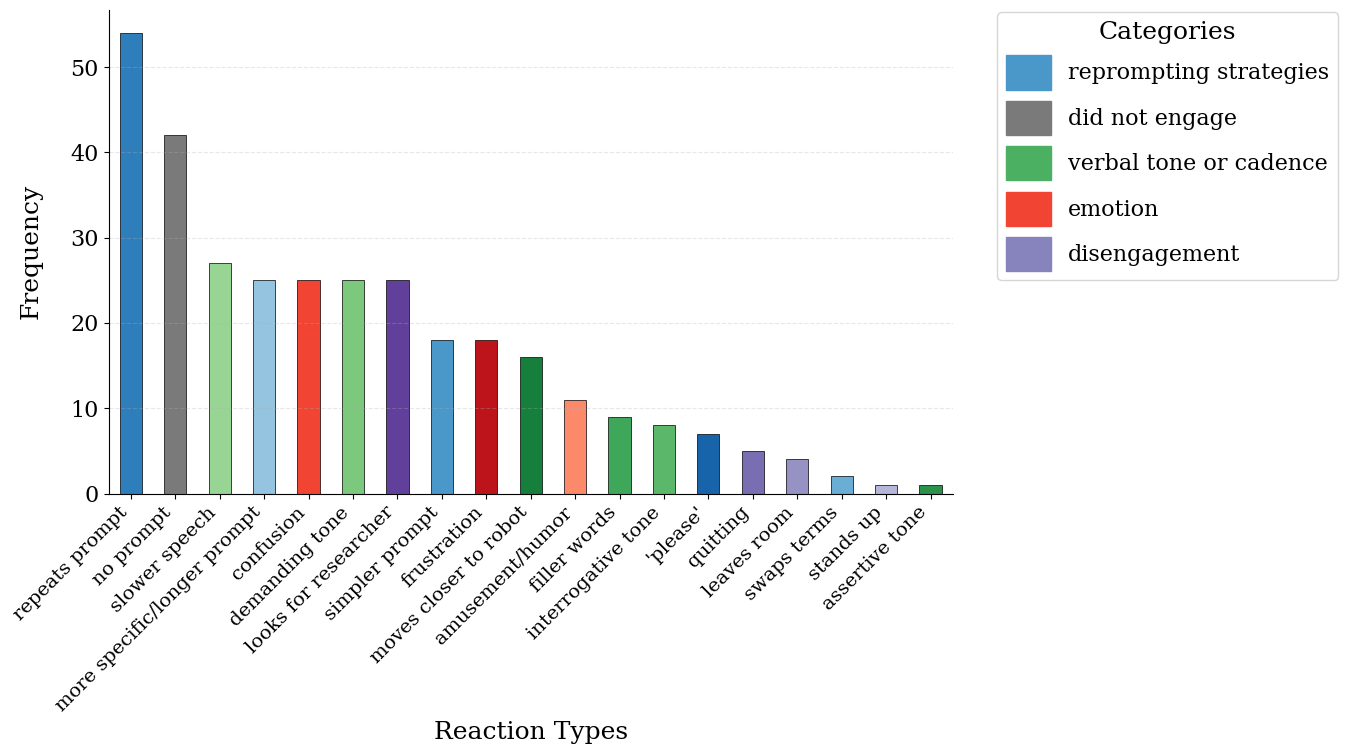


CREATING ERROR-SPECIFIC PLOTS
Error-specific plots saved to 'plots/reactions_by_error_number.png'


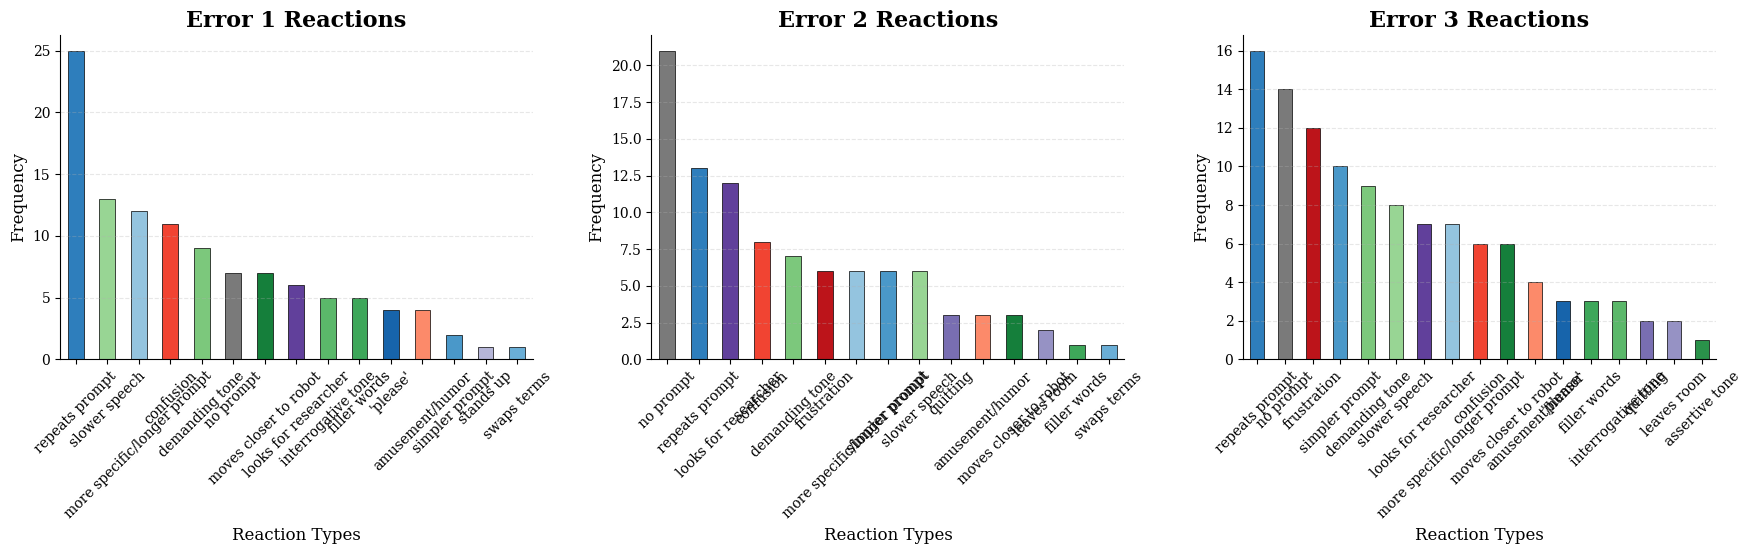


SUMMARY STATISTICS
Total participants: 50
Total reaction events: 323
Reactions per error:
  Error 1: 112 reactions
  Error 2: 98 reactions
  Error 3: 113 reactions

Most common reaction types:
  1. repeats prompt: 54 times
  2. no prompt: 42 times
  3. slower speech: 27 times
  4. more specific/longer prompt: 25 times
  5. confusion: 25 times

Reaction categories distribution:
  reprompting strategies: 106 reactions
  verbal tone or cadence: 86 reactions
  emotion: 54 reactions
  did not engage: 42 reactions
  disengagement: 35 reactions


In [30]:
# @title Plot Reaction Frequencies Between Errors

# Categories and color mappings (from your original code)

# Read the reactions data (output from previous script)
print("Loading reactions_between_errors.csv...")
data = pd.read_csv('reactions_between_errors.csv')

print(f"Loaded {len(data)} reaction events")
print(f"Unique readable subcodes: {data['subcode_readable'].nunique()}")
print(f"Errors covered: {sorted(data['error'].unique())}")

# Create annotation list from all readable subcodes in our categories
annotation_list = []
for category_labels in categories.values():
    annotation_list.extend(category_labels)

print(f"Total annotation categories defined: {len(annotation_list)}")

# Filter data to only include labels that are in our defined categories
data_filtered = data[data['subcode_readable'].isin(annotation_list)].copy()
print(f"Filtered to {len(data_filtered)} reactions with defined categories")

if len(data_filtered) == 0:
    print("WARNING: No reactions found in defined categories!")
    print("Available subcode_readable values:", data['subcode_readable'].unique())
    print("Expected categories:", annotation_list)
else:
    # Group by error and labels to create frequency matrix
    grouped_data = data_filtered.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    
    # Reindex to include all annotation categories (fill missing with 0)
    grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)
    
    print("\nGrouped data by error:")
    print(grouped_data)
    
    # Calculate overall frequency for plotting
    frequency = data_filtered['subcode_readable'].value_counts()
    print(f"\nOverall frequencies:")
    print(frequency)
    
    # Function to get shaded colors for each category
    def get_shaded_colors(category, labels):
        cmap = category_colormaps[category]
        num_labels = len(labels)
        if num_labels == 1:
            return [cmap(0.6)]
        return cmap(np.linspace(0.4, 0.8, num_labels))
    
    # Create label color mapping
    label_colors = {}
    for category, labels in categories.items():
        # Only include labels that actually appear in our data
        present_labels = [label for label in labels if label in frequency.index]
        if present_labels:
            shades = get_shaded_colors(category, present_labels)
            label_colors.update(dict(zip(present_labels, shades)))
    
    # Get bar colors for the plot
    bar_colors = [label_colors.get(label, 'gray') for label in frequency.index]
    
    # Create the plot
    plt.figure(figsize=(14, 8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Create bar plot
    ax = frequency.sort_values(ascending=False).plot(
        kind='bar',
        color=bar_colors,
        edgecolor='black',
        linewidth=0.5
    )
    
    # Create legend patches (only for categories that have data)
    legend_patches = []
    for category in categories.keys():
        # Check if this category has any labels in our data
        category_labels = [label for label in categories[category] if label in frequency.index]
        if category_labels:
            legend_patches.append(
                mpatches.Patch(color=category_colormaps[category](0.6), label=category)
            )
    
    plt.legend(
        handles=legend_patches, 
        title="Categories", 
        title_fontsize=18, 
        bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        fontsize=16, 
        handleheight=2, 
        handlelength=2, 
        borderaxespad=0.1
    )
    
    # Formatting
    plt.xlabel("Reaction Types", fontsize=18)
    plt.ylabel("Frequency", labelpad=20, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=16)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save plot
    plt.savefig('plots/reaction_frequencies_between_errors.png', format='png', dpi=500, bbox_inches='tight')
    print("Plot saved to 'plots/reaction_frequencies_between_errors.png'")
    
    plt.show()
    
    # Additional analysis: Plot by error number
    print("\n" + "="*50)
    print("CREATING ERROR-SPECIFIC PLOTS")
    print("="*50)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')
    
    for i, error_num in enumerate([1, 2, 3]):
        if error_num in data_filtered['error'].values:
            error_data = data_filtered[data_filtered['error'] == error_num]
            error_freq = error_data['subcode_readable'].value_counts()
            
            if len(error_freq) > 0:
                error_colors = [label_colors.get(label, 'gray') for label in error_freq.index]
                
                error_freq.plot(
                    kind='bar',
                    ax=axes[i],
                    color=error_colors,
                    edgecolor='black',
                    linewidth=0.5
                )
                
                axes[i].set_title(f'Error {error_num} Reactions', fontsize=16, fontweight='bold')
                axes[i].set_xlabel('Reaction Types', fontsize=12)
                axes[i].set_ylabel('Frequency', fontsize=12)
                axes[i].tick_params(axis='x', rotation=45, labelsize=10)
                axes[i].tick_params(axis='y', labelsize=10)
                axes[i].grid(axis='y', alpha=0.3, linestyle='--')
                axes[i].spines['top'].set_visible(False)
                axes[i].spines['right'].set_visible(False)
            else:
                axes[i].text(0.5, 0.5, f'No reactions\nfor Error {error_num}', 
                            ha='center', va='center', transform=axes[i].transAxes, fontsize=14)
                axes[i].set_title(f'Error {error_num} Reactions', fontsize=16, fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, f'No data\nfor Error {error_num}', 
                        ha='center', va='center', transform=axes[i].transAxes, fontsize=14)
            axes[i].set_title(f'Error {error_num} Reactions', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('plots/reactions_by_error_number.png', format='png', dpi=500, bbox_inches='tight')
    print("Error-specific plots saved to 'plots/reactions_by_error_number.png'")
    plt.show()
    
    # Summary statistics
    print("\n" + "="*50)
    print("SUMMARY STATISTICS")
    print("="*50)
    
    print(f"Total participants: {data['participant_id'].nunique()}")
    print(f"Total reaction events: {len(data_filtered)}")
    print(f"Reactions per error:")
    for error_num in [1, 2, 3]:
        count = len(data_filtered[data_filtered['error'] == error_num])
        print(f"  Error {error_num}: {count} reactions")
    
    print(f"\nMost common reaction types:")
    for i, (reaction, count) in enumerate(frequency.head(5).items()):
        print(f"  {i+1}. {reaction}: {count} times")
    
    print(f"\nReaction categories distribution:")
    category_counts = {}
    for category, labels in categories.items():
        count = sum(frequency.get(label, 0) for label in labels)
        if count > 0:
            category_counts[category] = count
    
    for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"  {category}: {count} reactions")

Loading reactions_between_errors.csv...
Loaded 422 reaction events
Unique readable subcodes: 25
Errors covered: [1, 2, 3]
Total annotation categories defined: 9
Filtered to 140 reactions with defined categories

Grouped data by error:
subcode_readable  no prompt  initial prompt  looks at robot  \
error                                                         
1                         8               0              21   
2                        22               0              12   
3                        14               0              13   

subcode_readable  moves closer to robot  speaks to researcher  \
error                                                           
1                                     7                     3   
2                                     3                     0   
3                                     6                     1   

subcode_readable  tries to look at researcher  looks for researcher  \
error                                               

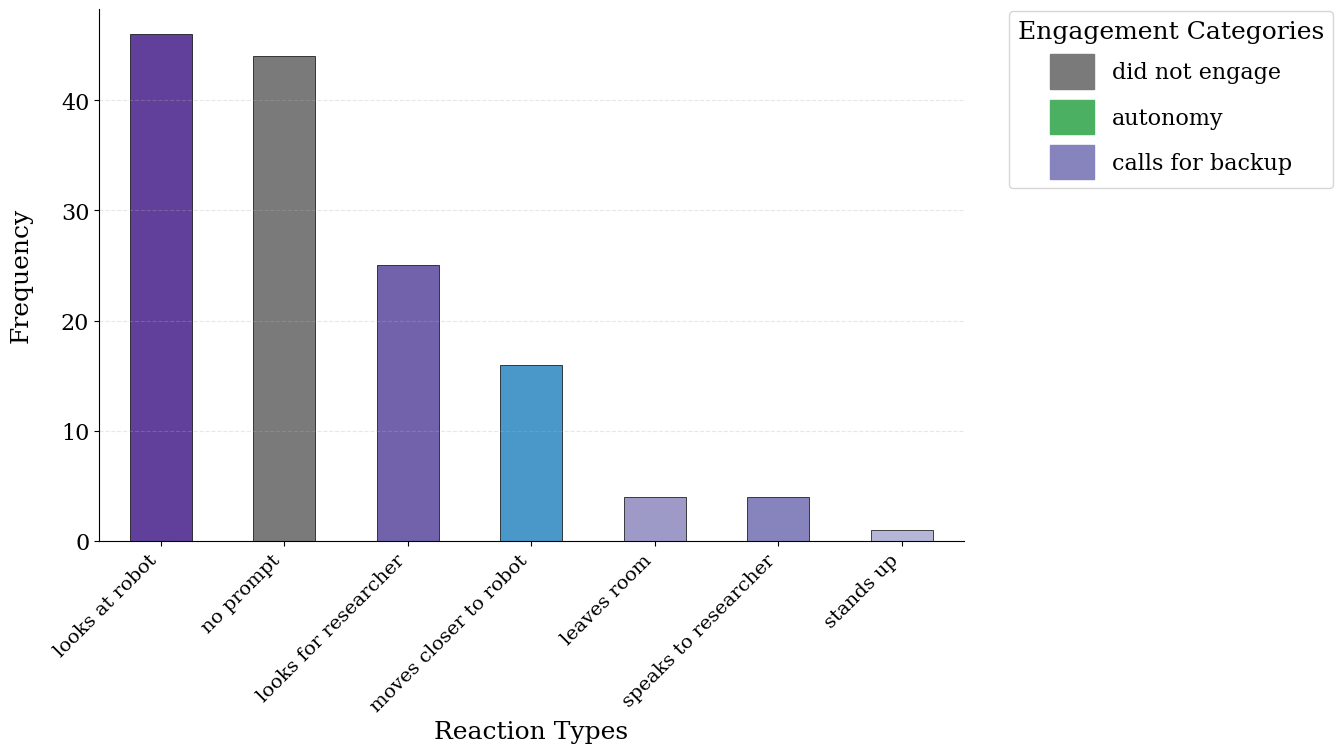


CREATING ERROR-SPECIFIC PLOTS
Error-specific plots saved to 'plots/reactions_by_error_number.png'


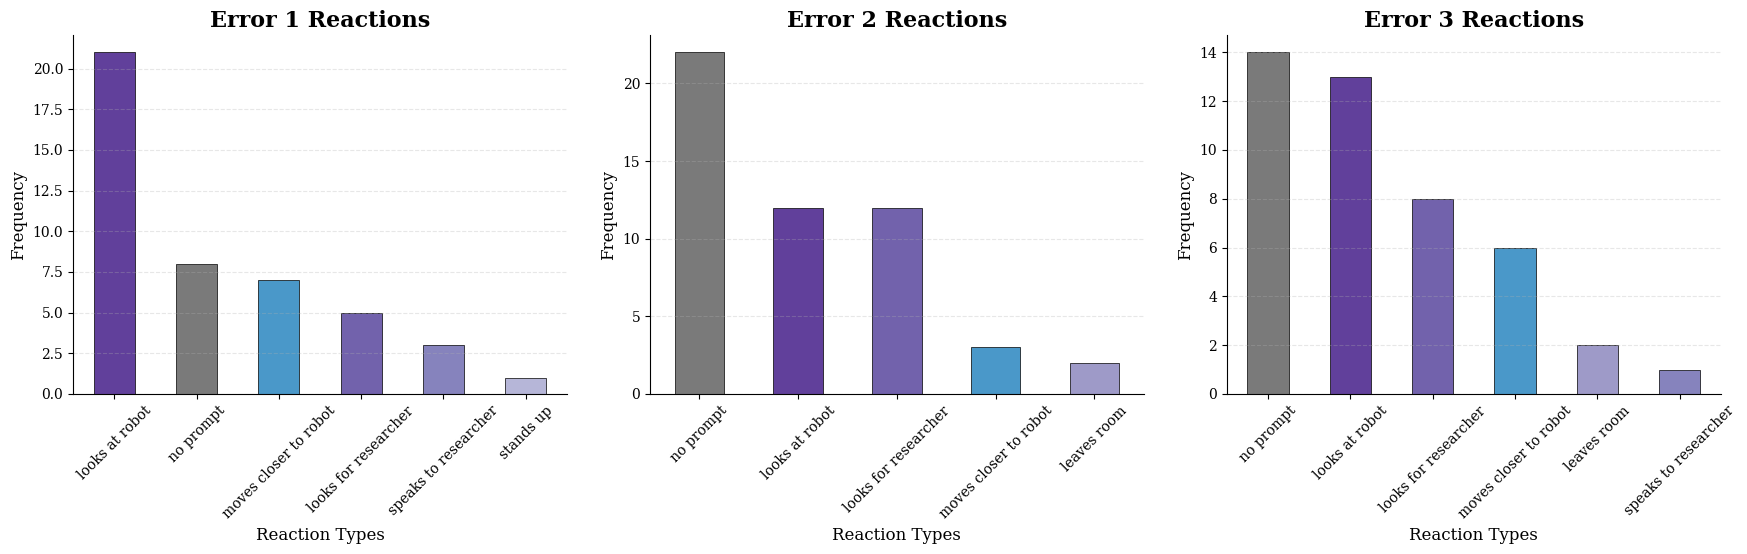


SUMMARY STATISTICS
Total participants: 49
Total reaction events: 140
Reactions per error:
  Error 1: 45 reactions
  Error 2: 51 reactions
  Error 3: 44 reactions

Most common reaction types:
  1. looks at robot: 46 times
  2. no prompt: 44 times
  3. looks for researcher: 25 times
  4. moves closer to robot: 16 times
  5. leaves room: 4 times

Reaction categories distribution:
  disengagement: 80 reactions
  did not engage: 44 reactions
  reprompting strategies: 16 reactions


In [135]:

# Read the reactions data (output from previous script)
print("Loading reactions_between_errors.csv...")
data = pd.read_csv('reactions_between_errors.csv')

print(f"Loaded {len(data)} reaction events")
print(f"Unique readable subcodes: {data['subcode_readable'].nunique()}")
print(f"Errors covered: {sorted(data['error'].unique())}")

# Create annotation list from all readable subcodes in our categories
annotation_list = []
for category_labels in engagement_categories.values():
    annotation_list.extend(category_labels)

print(f"Total annotation categories defined: {len(annotation_list)}")

# Filter data to only include labels that are in our defined categories
data_filtered = data[data['subcode_readable'].isin(annotation_list)].copy()
print(f"Filtered to {len(data_filtered)} reactions with defined categories")

if len(data_filtered) == 0:
    print("WARNING: No reactions found in defined categories!")
    print("Available subcode_readable values:", data['subcode_readable'].unique())
    print("Expected categories:", annotation_list)
else:
    # Group by error and labels to create frequency matrix
    grouped_data = data_filtered.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    
    # Reindex to include all annotation categories (fill missing with 0)
    grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)
    
    print("\nGrouped data by error:")
    print(grouped_data)
    
    # Calculate overall frequency for plotting
    frequency = data_filtered['subcode_readable'].value_counts()
    print(f"\nOverall frequencies:")
    print(frequency)
    
    # Function to get shaded colors for each category
    def get_shaded_colors(category, labels):
        cmap = category_colormaps[category]
        num_labels = len(labels)
        if num_labels == 1:
            return [cmap(0.6)]
        return cmap(np.linspace(0.4, 0.8, num_labels))
    
    # Create label color mapping
    label_colors = {}
    for category, labels in categories.items():
        # Only include labels that actually appear in our data
        present_labels = [label for label in labels if label in frequency.index]
        if present_labels:
            shades = get_shaded_colors(category, present_labels)
            label_colors.update(dict(zip(present_labels, shades)))
    
    # Get bar colors for the plot
    bar_colors = [label_colors.get(label, 'gray') for label in frequency.index]
    
    # Create the plot
    plt.figure(figsize=(14, 8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Create bar plot
    ax = frequency.sort_values(ascending=False).plot(
        kind='bar',
        color=bar_colors,
        edgecolor='black',
        linewidth=0.5
    )
    
    # Create legend patches (only for categories that have data)
    legend_patches = []
    for category in engagement_categories.keys():
        # Check if this category has any labels in our data
        category_labels = [label for label in engagement_categories[category] if label in frequency.index]
        if category_labels:
            legend_patches.append(
                mpatches.Patch(color=category_colormaps[category](0.6), label=category)
            )
    
    plt.legend(
        handles=legend_patches, 
        title="Engagement Categories", 
        title_fontsize=18, 
        bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        fontsize=16, 
        handleheight=2, 
        handlelength=2, 
        borderaxespad=0.1
    )
    
    # Formatting
    plt.xlabel("Reaction Types", fontsize=18)
    plt.ylabel("Frequency", labelpad=20, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=16)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save plot
    #plt.savefig('plots/reaction_frequencies_between_errors.png', format='png', dpi=500, bbox_inches='tight')
    print("Plot saved to 'plots/reaction_frequencies_between_errors.png'")
    
    plt.show()
    
    # Additional analysis: Plot by error number
    print("\n" + "="*50)
    print("CREATING ERROR-SPECIFIC PLOTS")
    print("="*50)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')
    
    for i, error_num in enumerate([1, 2, 3]):
        if error_num in data_filtered['error'].values:
            error_data = data_filtered[data_filtered['error'] == error_num]
            error_freq = error_data['subcode_readable'].value_counts()
            
            if len(error_freq) > 0:
                error_colors = [label_colors.get(label, 'gray') for label in error_freq.index]
                
                error_freq.plot(
                    kind='bar',
                    ax=axes[i],
                    color=error_colors,
                    edgecolor='black',
                    linewidth=0.5
                )
                
                axes[i].set_title(f'Error {error_num} Reactions', fontsize=16, fontweight='bold')
                axes[i].set_xlabel('Reaction Types', fontsize=12)
                axes[i].set_ylabel('Frequency', fontsize=12)
                axes[i].tick_params(axis='x', rotation=45, labelsize=10)
                axes[i].tick_params(axis='y', labelsize=10)
                axes[i].grid(axis='y', alpha=0.3, linestyle='--')
                axes[i].spines['top'].set_visible(False)
                axes[i].spines['right'].set_visible(False)
            else:
                axes[i].text(0.5, 0.5, f'No reactions\nfor Error {error_num}', 
                            ha='center', va='center', transform=axes[i].transAxes, fontsize=14)
                axes[i].set_title(f'Error {error_num} Reactions', fontsize=16, fontweight='bold')
        else:
            axes[i].text(0.5, 0.5, f'No data\nfor Error {error_num}', 
                        ha='center', va='center', transform=axes[i].transAxes, fontsize=14)
            axes[i].set_title(f'Error {error_num} Reactions', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    #plt.savefig('plots/reactions_by_error_number.png', format='png', dpi=500, bbox_inches='tight')
    print("Error-specific plots saved to 'plots/reactions_by_error_number.png'")
    plt.show()
    
    # Summary statistics
    print("\n" + "="*50)
    print("SUMMARY STATISTICS")
    print("="*50)
    
    print(f"Total participants: {data['participant_id'].nunique()}")
    print(f"Total reaction events: {len(data_filtered)}")
    print(f"Reactions per error:")
    for error_num in [1, 2, 3]:
        count = len(data_filtered[data_filtered['error'] == error_num])
        print(f"  Error {error_num}: {count} reactions")
    
    print(f"\nMost common reaction types:")
    for i, (reaction, count) in enumerate(frequency.head(5).items()):
        print(f"  {i+1}. {reaction}: {count} times")
    
    print(f"\nReaction categories distribution:")
    category_counts = {}
    for category, labels in categories.items():
        count = sum(frequency.get(label, 0) for label in labels)
        if count > 0:
            category_counts[category] = count
    
    for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
        print(f"  {category}: {count} reactions")

Creating histogram for: Quitting
Found 7 reactions for this category
Grouped data:
subcode_readable  quitting
error                     
1                        0
2                        4
3                        3
Plot saved to plots/quitting_annotations_histogram.png


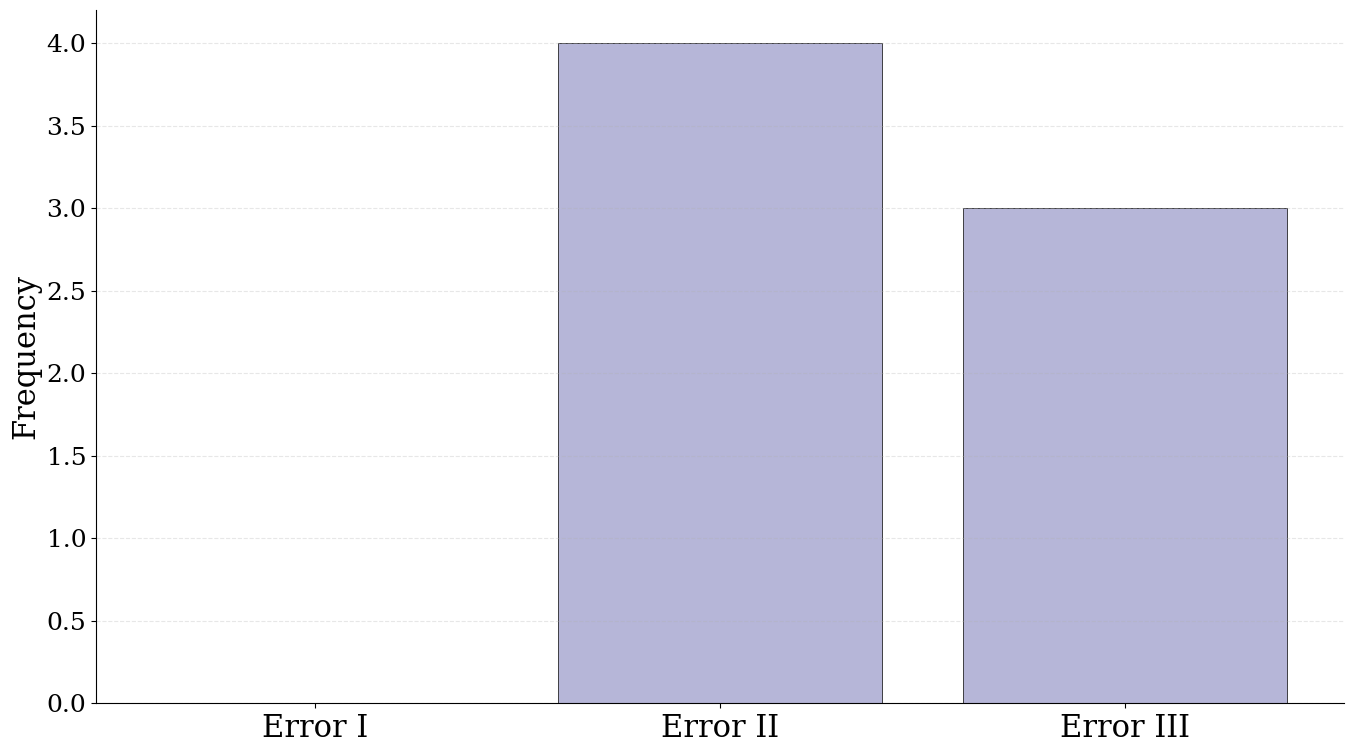


Summary for Quitting:
  Error 1: 0 occurrences
  Error 2: 4 occurrences
  Error 3: 3 occurrences
  Total across all errors: 7
Breakdown by specific reactions:
  quitting: 7 times
Creating histogram for: Frustration
Found 20 reactions for this category
Grouped data:
subcode_readable  frustration
error                        
1                           0
2                           6
3                          14
Plot saved to plots/frustration_annotations_histogram.png


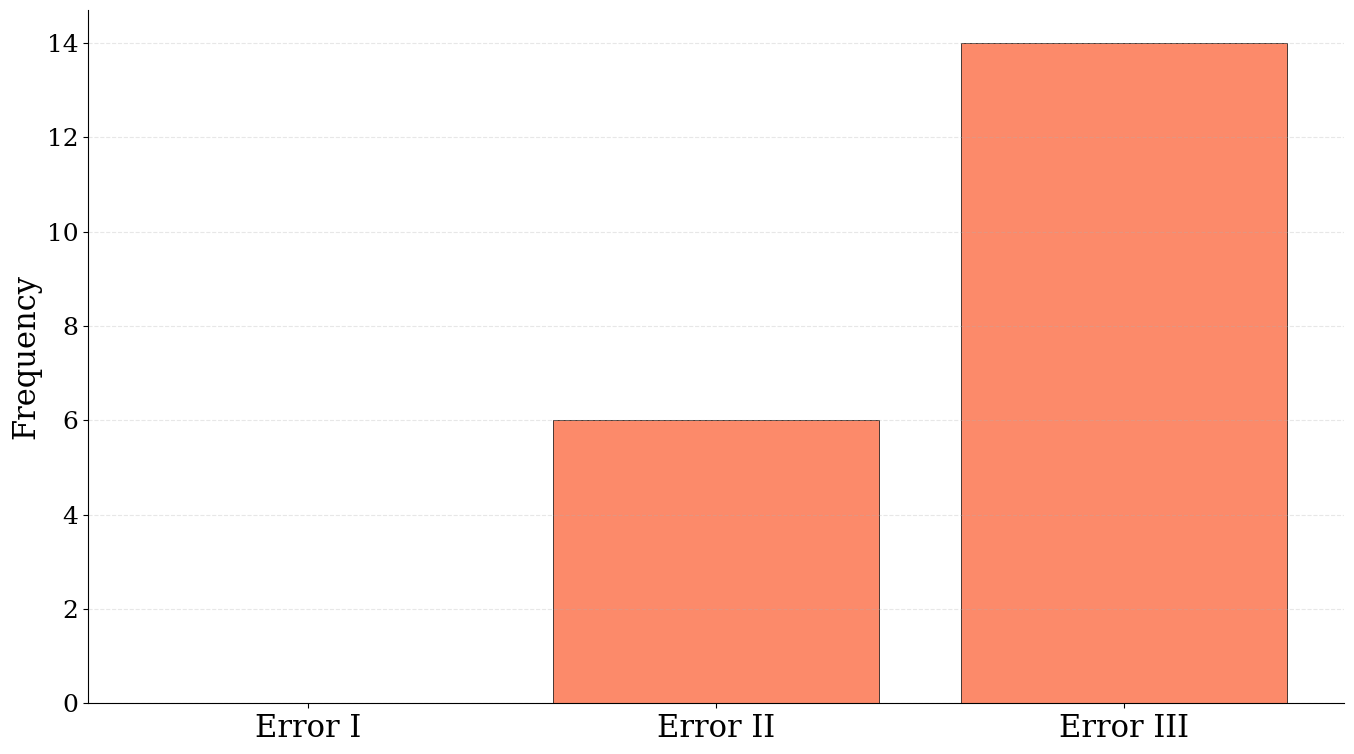


Summary for Frustration:
  Error 1: 0 occurrences
  Error 2: 6 occurrences
  Error 3: 14 occurrences
  Total across all errors: 20
Breakdown by specific reactions:
  frustration: 20 times
Creating histogram for: Humor
Found 9 reactions for this category
Grouped data:
subcode_readable  amusement/humor
error                            
1                               3
2                               2
3                               4
Plot saved to plots/humor_annotations_histogram.png


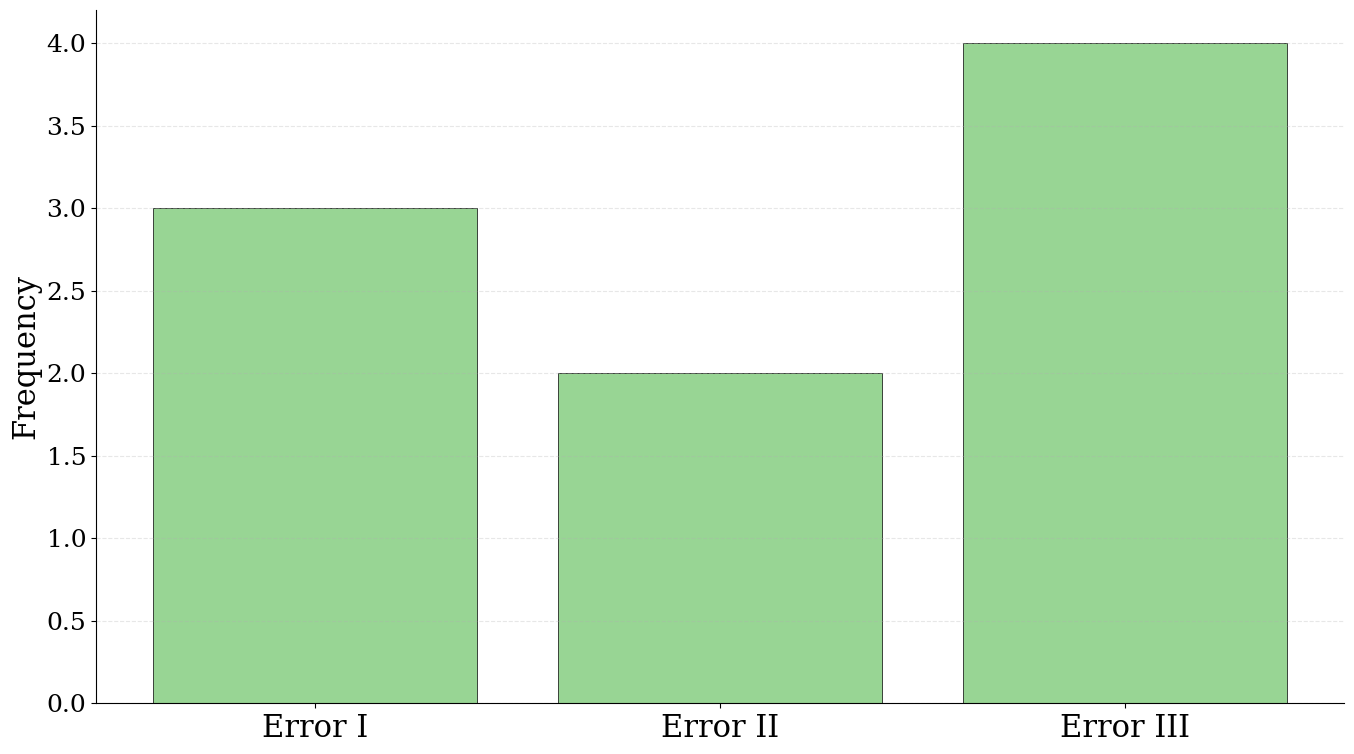


Summary for Humor:
  Error 1: 3 occurrences
  Error 2: 2 occurrences
  Error 3: 4 occurrences
  Total across all errors: 9
Breakdown by specific reactions:
  amusement/humor: 9 times
Creating histogram for: Looking at PC
Found 33 reactions for this category
Grouped data:
subcode_readable  looks at PC
error                        
1                          11
2                          12
3                          10
Plot saved to plots/looking_pc_annotations_histogram.png


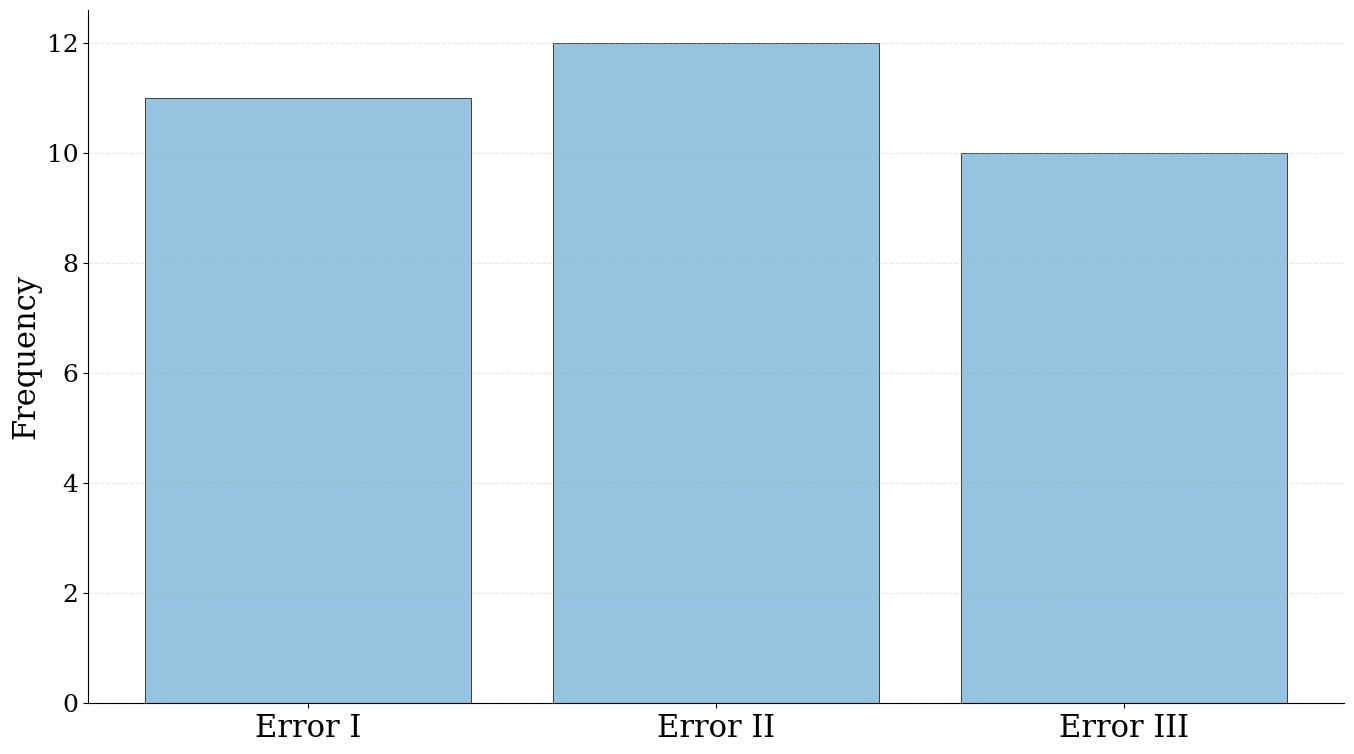


Summary for Looking at PC:
  Error 1: 11 occurrences
  Error 2: 12 occurrences
  Error 3: 10 occurrences
  Total across all errors: 33
Breakdown by specific reactions:
  looks at PC: 33 times
Creating histogram for: Confusion
Found 28 reactions for this category
Grouped data:
subcode_readable  confusion
error                      
1                        11
2                         8
3                         9
Plot saved to plots/confusion_annotations_histogram.png


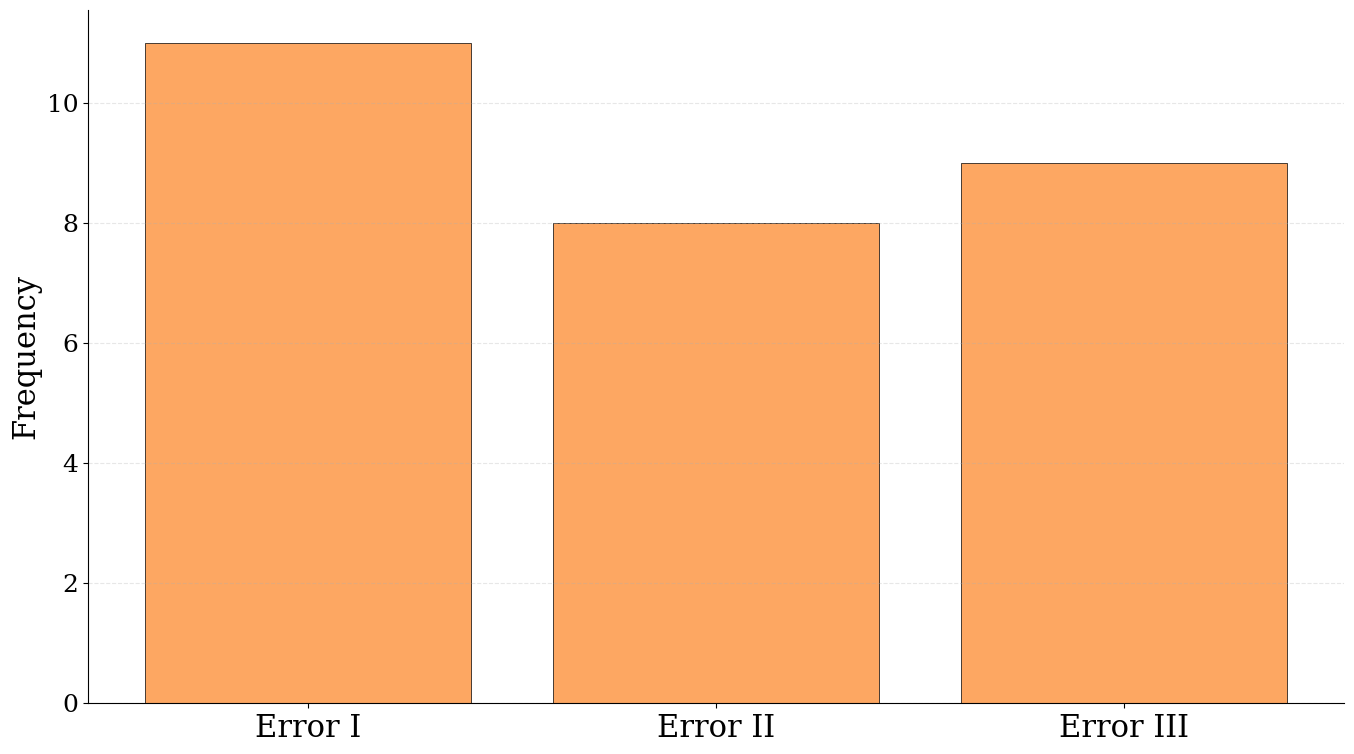


Summary for Confusion:
  Error 1: 11 occurrences
  Error 2: 8 occurrences
  Error 3: 9 occurrences
  Total across all errors: 28
Breakdown by specific reactions:
  confusion: 28 times
Creating histogram for: Physical Disengagement
Found 5 reactions for this category
Grouped data:
subcode_readable  stands up  leaves room
error                                   
1                         1            0
2                         0            2
3                         0            2
Plot saved to plots/physical_disengagement_annotations_histogram.png


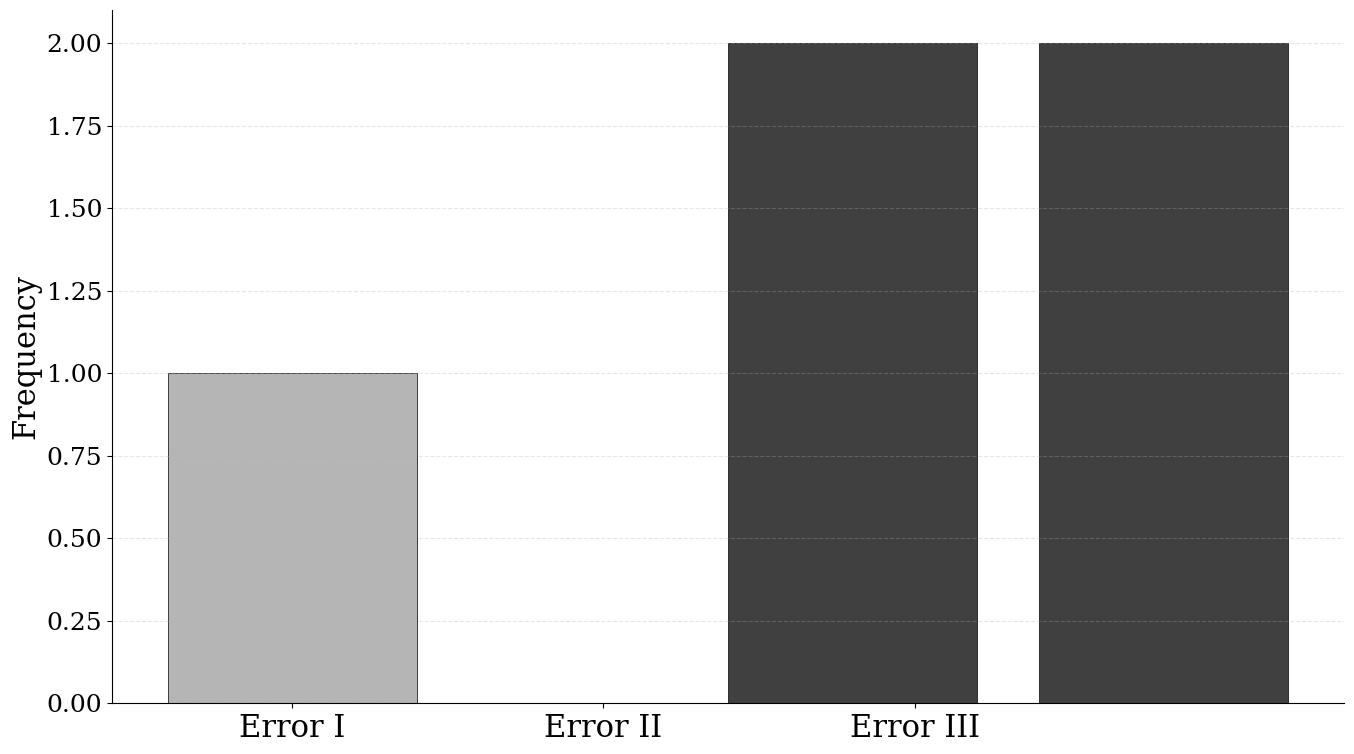


Summary for Physical Disengagement:
  Error 1: 1 occurrences
  Error 2: 2 occurrences
  Error 3: 2 occurrences
  Total across all errors: 5
Breakdown by specific reactions:
  leaves room: 4 times
  stands up: 1 times
Creating histogram for: Seeking Help from Researcher
Found 29 reactions for this category
Grouped data:
subcode_readable  speaks to researcher  looks for researcher  \
error                                                          
1                                    3                     5   
2                                    0                    12   
3                                    1                     8   

subcode_readable  tries to look at researcher  
error                                          
1                                           0  
2                                           0  
3                                           0  
Plot saved to plots/seeking_help_annotations_histogram.png


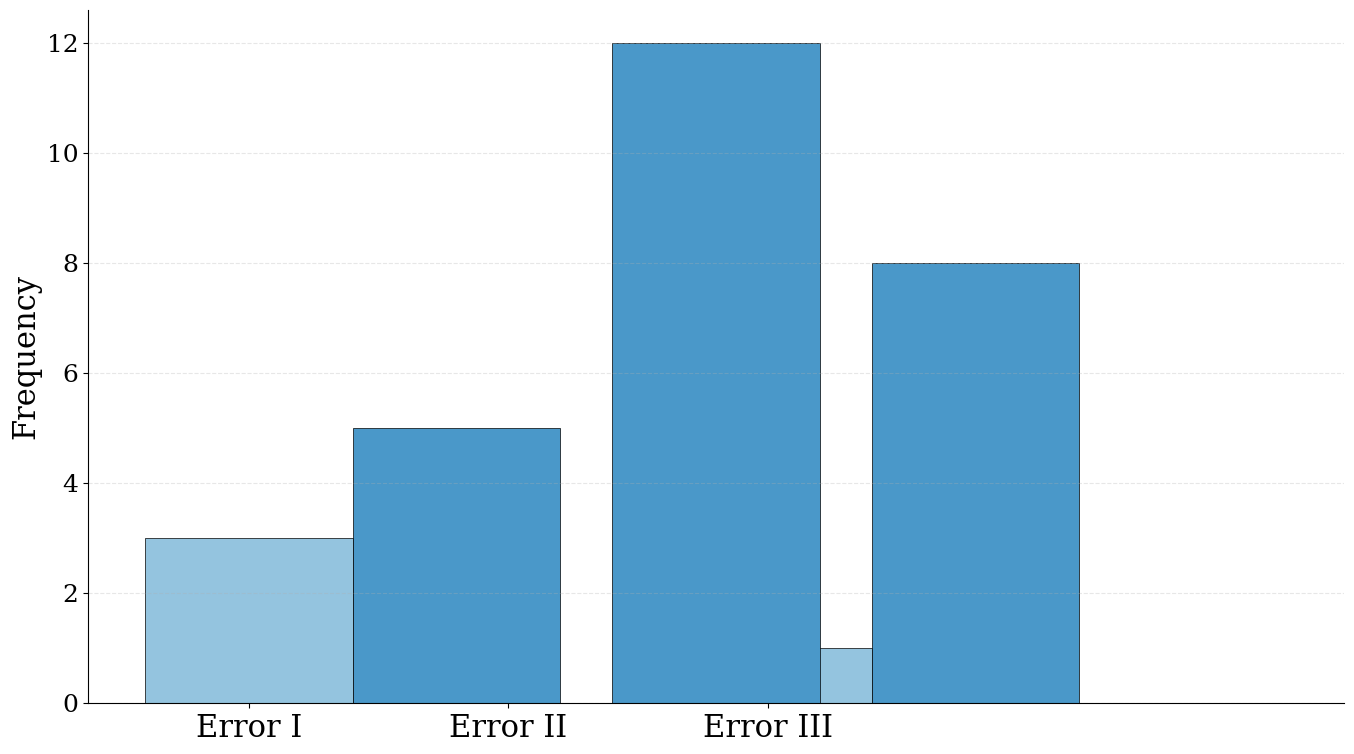


Summary for Seeking Help from Researcher:
  Error 1: 8 occurrences
  Error 2: 12 occurrences
  Error 3: 9 occurrences
  Total across all errors: 29
Breakdown by specific reactions:
  looks for researcher: 25 times
  speaks to researcher: 4 times


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_single_category_histogram(annotation_list, annotation_name, colormap, filename_suffix):
    """
    Create a simple bar chart for a single annotation category across errors
    
    Parameters:
    - annotation_list: List of specific annotations to include (can be just one)
    - annotation_name: Name for the category
    - colormap: Matplotlib colormap to use
    - filename_suffix: Suffix for the saved filename
    """
    
    # Read the reactions data
    print(f"Creating histogram for: {annotation_name}")
    data = pd.read_csv('reactions_between_errors.csv')
    
    # Filter data to only include annotations in our list
    data_filtered = data[data['subcode_readable'].isin(annotation_list)].copy()
    
    print(f"Found {len(data_filtered)} reactions for this category")
    
    if len(data_filtered) == 0:
        print(f"WARNING: No reactions found for {annotation_name}")
        print("Available subcode_readable values:", data['subcode_readable'].unique())
        return
    
    # Group by error and subcode_readable to get frequency matrix
    grouped_data = data_filtered.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    
    # Ensure we have all errors (1, 2, 3) even if some are missing
    all_errors = [1, 2, 3]
    grouped_data = grouped_data.reindex(index=all_errors, fill_value=0)
    
    # Ensure we have all annotations even if some don't appear
    grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)
    
    print("Grouped data:")
    print(grouped_data)
    
    # Set up the plot
    errors = grouped_data.index
    annotations = grouped_data.columns
    bar_width = 0.8
    x_positions = np.arange(len(errors))
    
    # Create the figure
    plt.figure(figsize=(14, 8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Generate colors
    colors = colormap(np.linspace(0.4, 0.8, len(annotations)))
    
    # Create bars for each annotation
    for i, (annotation, color) in enumerate(zip(annotations, colors)):
        plt.bar(
            x_positions + i * bar_width,
            grouped_data[annotation],
            width=bar_width,
            label=annotation,
            color=color,
            edgecolor='black',
            linewidth=0.5
        )
    
    # Customize the plot
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(x_positions, x_labels, fontsize=22)
    plt.ylabel("Frequency", fontsize=22)
    plt.yticks(fontsize=18)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    filename = f'plots/{filename_suffix}_annotations_histogram.png'
    plt.savefig(filename, format='png', dpi=500, bbox_inches='tight')
    print(f"Plot saved to {filename}")
    
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary for {annotation_name}:")
    total_per_error = grouped_data.sum(axis=1)
    for error_num in [1, 2, 3]:
        count = total_per_error.get(error_num, 0)
        print(f"  Error {error_num}: {count} occurrences")
    
    total_overall = data_filtered.shape[0]
    print(f"  Total across all errors: {total_overall}")
    
    if total_overall > 0:
        print(f"Breakdown by specific reactions:")
        overall_freq = data_filtered['subcode_readable'].value_counts()
        for reaction, count in overall_freq.items():
            print(f"  {reaction}: {count} times")

# Example usage - Quitting behavior
plot_single_category_histogram(
    annotation_list=["quitting"],
    annotation_name="Quitting",
    colormap=cm.Purples,
    filename_suffix="quitting"
)

# Example usage - Other single categories
plot_single_category_histogram(
    annotation_list=["frustration"],
    annotation_name="Frustration",
    colormap=cm.Reds,
    filename_suffix="frustration"
)

plot_single_category_histogram(
    annotation_list=["amusement/humor"],
    annotation_name="Humor",
    colormap=cm.Greens,
    filename_suffix="humor"
)

plot_single_category_histogram(
    annotation_list=["looks at PC"],
    annotation_name="Looking at PC",
    colormap=cm.Blues,
    filename_suffix="looking_pc"
)

plot_single_category_histogram(
    annotation_list=["confusion"],
    annotation_name="Confusion", 
    colormap=cm.Oranges,
    filename_suffix="confusion"
)

# Example with multiple similar reactions grouped together
plot_single_category_histogram(
    annotation_list=["stands up", "leaves room"],
    annotation_name="Physical Disengagement",
    colormap=cm.Greys,
    filename_suffix="physical_disengagement"  
)

plot_single_category_histogram(
    annotation_list=["speaks to researcher", "looks for researcher", "tries to look at researcher"],
    annotation_name="Seeking Help from Researcher",
    colormap=cm.Blues,
    filename_suffix="seeking_help"
)

# Convenience function to plot common single categories
def plot_common_single_categories():
    """Plot histograms for common single-reaction categories"""
    
    single_categories = {
        "Quitting": {
            "list": ["quitting"],
            "colormap": cm.Purples,
            "suffix": "quitting"
        },
        "Frustration": {
            "list": ["frustration"], 
            "colormap": cm.Reds,
            "suffix": "frustration"
        },
        "Humor/Amusement": {
            "list": ["amusement/humor"],
            "colormap": cm.Greens, 
            "suffix": "humor"
        },
        "Confusion": {
            "list": ["confusion"],
            "colormap": cm.Oranges,
            "suffix": "confusion"
        },
        "Looking at PC": {
            "list": ["looks at PC"],
            "colormap": cm.Blues,
            "suffix": "looking_pc"
        },
        "Physical Movement": {
            "list": ["changes position", "stands up"],
            "colormap": cm.Greys,
            "suffix": "movement"
        }
    }
    
    for category_name, config in single_categories.items():
        print("\n" + "="*60)
        plot_single_category_histogram(
            annotation_list=config["list"],
            annotation_name=category_name,
            colormap=config["colormap"],
            filename_suffix=config["suffix"]
        )

# Uncomment to plot all single categories
# plot_common_single_categories()

Loading reactions_between_errors.csv...
Loaded 422 reaction events
Available subcode_readable values: ["'please'", 'amusement/humor', 'assertive tone', 'changes position', 'confusion', 'demanding tone', 'does not stand up', 'filler words', 'frustration', 'interrogative tone', 'leaves room', 'looks at PC', 'looks at robot', 'looks for researcher', 'makes new prompt', 'more specific/longer prompt', 'moves closer to robot', 'no prompt', 'quitting', 'repeats prompt', 'simpler prompt', 'slower speech', 'speaks to researcher', 'stands up', 'swaps terms']
Note: The following reactions were categorized as 'other': ['does not stand up']
Grouped data (raw counts):
reaction_category  repeats prompt  more specific/longer prompt  swaps terms  \
error                                                                         
1                              23                           12            1   
2                              12                            6            1   
3                    

<Figure size 1400x1400 with 0 Axes>

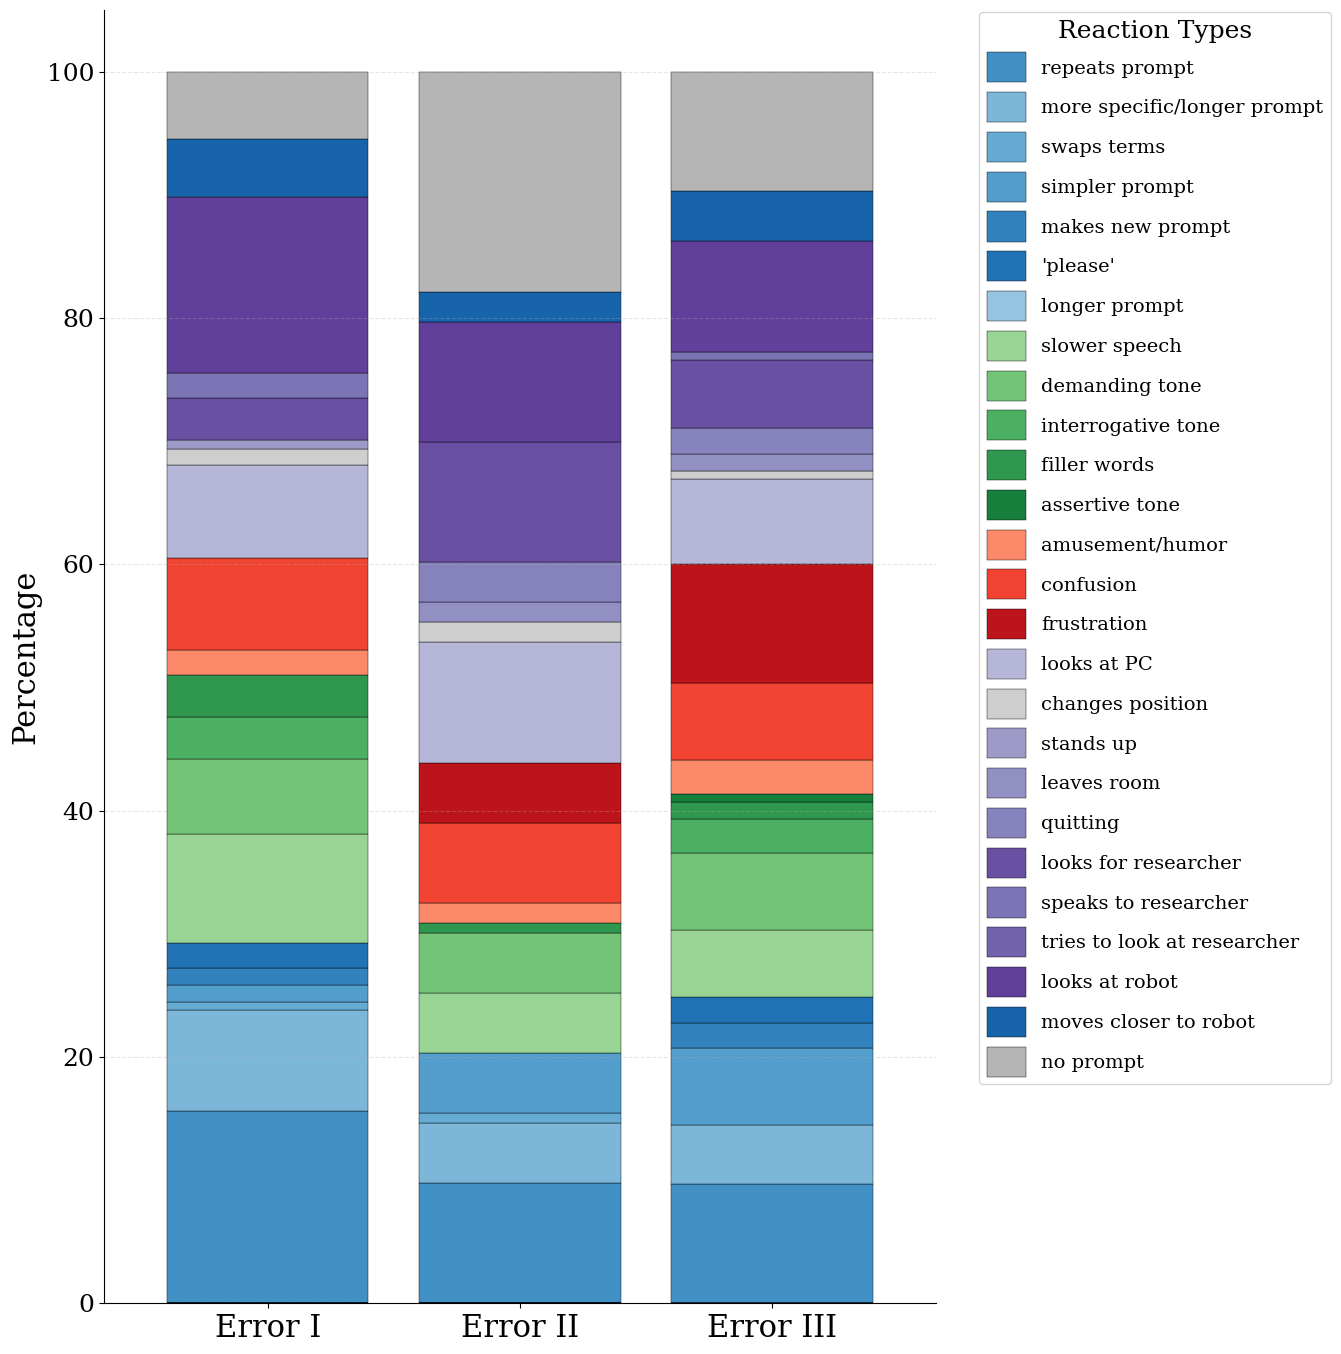


DETAILED STATISTICS

Error 1:
  Total reactions: 147
  Breakdown:
    repeats prompt: 23 (15.6%)
    more specific/longer prompt: 12 (8.2%)
    swaps terms: 1 (0.7%)
    simpler prompt: 2 (1.4%)
    makes new prompt: 2 (1.4%)
    'please': 3 (2.0%)
    slower speech: 13 (8.8%)
    demanding tone: 9 (6.1%)
    interrogative tone: 5 (3.4%)
    filler words: 5 (3.4%)
    amusement/humor: 3 (2.0%)
    confusion: 11 (7.5%)
    looks at PC: 11 (7.5%)
    changes position: 2 (1.4%)
    stands up: 1 (0.7%)
    looks for researcher: 5 (3.4%)
    speaks to researcher: 3 (2.0%)
    looks at robot: 21 (14.3%)
    moves closer to robot: 7 (4.8%)
    no prompt: 8 (5.4%)

Error 2:
  Total reactions: 123
  Breakdown:
    repeats prompt: 12 (9.8%)
    more specific/longer prompt: 6 (4.9%)
    swaps terms: 1 (0.8%)
    simpler prompt: 6 (4.9%)
    slower speech: 6 (4.9%)
    demanding tone: 6 (4.9%)
    filler words: 1 (0.8%)
    amusement/humor: 2 (1.6%)
    confusion: 8 (6.5%)
    frustration: 6 (4.9

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def create_stacked_percentage_chart():
    """Create a stacked percentage bar chart showing reaction distribution across errors"""
    
    # Use all annotations from the expanded lists
    annotation_list = (reprompting_list + verbal_tone_list + emotion_list + 
                      [item for item in disengagement_list if item not in reprompting_list + verbal_tone_list + emotion_list])
    
    # Use the updated categories (already declared in notebook)
    # categories variable is already available
    
    # Use the updated category_colormaps (already declared in notebook)
    # category_colormaps variable is already available
    
    def get_shaded_colors(cmap, labels):
        """Generate shaded colors for labels in a category"""
        return cmap(np.linspace(0.4, 0.8, len(labels)))
    
    # Create label color mapping using the updated categories and colormaps
    label_colors = {}
    for category, labels in categories.items():
        if category in category_colormaps:
            cmap = category_colormaps[category]
            shades = get_shaded_colors(cmap, labels)
            label_colors.update(dict(zip(labels, shades)))
    
    # Read the reactions data
    print("Loading reactions_between_errors.csv...")
    data = pd.read_csv('reactions_between_errors.csv')
    
    print(f"Loaded {len(data)} reaction events")
    print(f"Available subcode_readable values: {sorted(data['subcode_readable'].unique())}")
    
    # Filter data to only include annotations in our list, or mark as "other"
    data_filtered = data.copy()
    data_filtered['reaction_category'] = data_filtered['subcode_readable'].apply(
        lambda x: x if x in annotation_list else "other"
    )
    #print which ones are not in annotation_list
    unknown_reactions = data_filtered[~data_filtered['subcode_readable'].isin(annotation_list)]['subcode_readable'].unique()
    if len(unknown_reactions) > 0:
        print(f"Note: The following reactions were categorized as 'other': {unknown_reactions}")
    
    # Group by error and reaction category
    grouped_data = data_filtered.groupby(['error', 'reaction_category']).size().unstack(fill_value=0)
    
    # Ensure we have all errors (1, 2, 3)
    grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
    
    # Add "other" to annotation list if it appears in data
    if "other" in grouped_data.columns:
        annotation_list_with_other = annotation_list + ["other"]
        label_colors["other"] = cm.Greys(0.5)  # Grey color for "other"
    else:
        annotation_list_with_other = annotation_list

    #temp:
    annotation_list_with_other = annotation_list

    # Reindex to include all annotations
    grouped_data = grouped_data.reindex(columns=annotation_list_with_other, fill_value=0)
    
    print("Grouped data (raw counts):")
    print(grouped_data)
    
    # Calculate percentages
    row_sums = grouped_data.sum(axis=1)
    print(f"\nTotal reactions per error: {row_sums.to_dict()}")
    
    # Handle cases where there are no reactions for an error
    grouped_data_percentage = grouped_data.div(row_sums, axis=0).fillna(0) * 100
    
    print("Grouped data (percentages):")
    print(grouped_data_percentage)
    
    # Create the plot
    plt.figure(figsize=(14, 14), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Get colors for the plot, with fallback for uncategorized items
    colors = []
    for label in grouped_data_percentage.columns:
        if label in label_colors:
            colors.append(label_colors[label])
        elif label == "other":
            colors.append(cm.Greys(0.5))
        else:
            # Fallback color for uncategorized items
            colors.append(cm.Greys(0.3))
    
    # Create stacked bar chart
    ax = grouped_data_percentage.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 14),
        width=0.8,
        color=colors,
        edgecolor='black',
        linewidth=0.3
    )
    
    ax.set_facecolor('white')
    
    # Customize the plot
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(np.arange(len(grouped_data.index)), x_labels, fontsize=22, rotation=0)
    plt.xlabel("", fontsize=22)
    plt.ylabel("Percentage", fontsize=22)
    plt.yticks(fontsize=18)
    
    # Add legend
    plt.legend(
        title="Reaction Types",
        title_fontsize=18,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=14,
        handleheight=2,
        handlelength=2,
        borderaxespad=0.1
    )
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add horizontal grid lines
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('plots/percentage_annotations_stacked.png', format='png', dpi=500, facecolor="white", bbox_inches='tight')
    print("Plot saved to 'plots/percentage_annotations_stacked.png'")
    
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("DETAILED STATISTICS")
    print("="*60)
    
    for error_num in [1, 2, 3]:
        print(f"\nError {error_num}:")
        total_reactions = row_sums.get(error_num, 0)
        print(f"  Total reactions: {total_reactions}")
        
        if total_reactions > 0:
            error_data = grouped_data.loc[error_num]
            error_percentages = grouped_data_percentage.loc[error_num]
            
            print("  Breakdown:")
            for reaction in annotation_list_with_other:
                count = error_data.get(reaction, 0)
                percentage = error_percentages.get(reaction, 0)
                if count > 0:
                    print(f"    {reaction}: {count} ({percentage:.1f}%)")
        else:
            print("  No reactions recorded")
    
    # Category-level analysis
    print(f"\n" + "="*60)
    print("CATEGORY-LEVEL ANALYSIS")
    print("="*60)
    
    for category, reactions in categories.items():
        print(f"\n{category.upper()}:")
        category_totals = {}
        for error_num in [1, 2, 3]:
            total = sum(grouped_data.loc[error_num, reaction] for reaction in reactions if reaction in grouped_data.columns)
            category_totals[error_num] = total
        
        total_overall = sum(category_totals.values())
        print(f"  Total across all errors: {total_overall}")
        for error_num, total in category_totals.items():
            if row_sums.get(error_num, 0) > 0:
                percentage = (total / row_sums[error_num]) * 100
                print(f"  Error {error_num}: {total} reactions ({percentage:.1f}% of error)")
            else:
                print(f"  Error {error_num}: {total} reactions (no data for this error)")

# Run the function
create_stacked_percentage_chart()

# Alternative version with different annotation selections
def create_custom_stacked_chart(annotation_subset, chart_title, filename_suffix):
    """Create a custom stacked chart with a subset of annotations"""
    
    print(f"\n" + "="*60)
    print(f"CREATING CUSTOM CHART: {chart_title}")
    print("="*60)
    
    # Read the data
    data = pd.read_csv('reactions_between_errors.csv')
    
    # Filter to only selected annotations
    data_filtered = data[data['subcode_readable'].isin(annotation_subset)].copy()
    
    if len(data_filtered) == 0:
        print(f"No data found for selected annotations: {annotation_subset}")
        return
    
    # Group by error and reaction
    grouped_data = data_filtered.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
    grouped_data = grouped_data.reindex(columns=annotation_subset, fill_value=0)
    
    # Calculate percentages
    row_sums = grouped_data.sum(axis=1)
    grouped_data_percentage = grouped_data.div(row_sums, axis=0).fillna(0) * 100
    
    # Simple color scheme
    colors = cm.Set3(np.linspace(0, 1, len(annotation_subset)))
    
    # Create plot
    plt.figure(figsize=(12, 6), facecolor='white')
    plt.rcParams.update({'font.size': 18})
    
    ax = grouped_data_percentage.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        width=0.8,
        color=colors,
        edgecolor='black',
        linewidth=0.3
    )
    
    # Formatting
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(range(3), x_labels, rotation=0)
    plt.xlabel("")
    plt.ylabel("Percentage")
    plt.title(chart_title, fontsize=20, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(f'plots/{filename_suffix}_stacked.png', format='png', dpi=500, bbox_inches='tight')
    plt.show()
    
    print(f"Custom chart saved to 'plots/{filename_suffix}_stacked.png'")

# Example custom charts
# create_custom_stacked_chart(
#     ["amusement/humor", "confusion", "frustration"],
#     "Emotional Reactions Across Errors", 
#     "emotions_only"
# )

# create_custom_stacked_chart(
#     ["repeats prompt", "simpler prompt", "more specific/longer prompt"],
#     "Prompting Strategies Across Errors",
#     "prompting_only" 
# )

Loading reactions_between_errors.csv...
Loaded 422 reaction events
Available subcode_readable values: ["'please'", 'amusement/humor', 'assertive tone', 'changes position', 'confusion', 'demanding tone', 'does not stand up', 'filler words', 'frustration', 'interrogative tone', 'leaves room', 'looks at PC', 'looks at robot', 'looks for researcher', 'makes new prompt', 'more specific/longer prompt', 'moves closer to robot', 'no prompt', 'quitting', 'repeats prompt', 'simpler prompt', 'slower speech', 'speaks to researcher', 'stands up', 'swaps terms']
Found 14 'other' labels: ['frustration', 'no prompt', 'quitting', 'looks at PC', 'confusion', 'changes position', 'leaves room', 'does not stand up', 'looks at robot', 'amusement/humor', 'looks for researcher', 'stands up', 'moves closer to robot', 'speaks to researcher']
Color assignments: ['repeats prompt', 'more specific/longer prompt', 'swaps terms', 'simpler prompt', 'makes new prompt', "'please'", 'longer prompt', 'slower speech', 'dem

<Figure size 1400x1400 with 0 Axes>

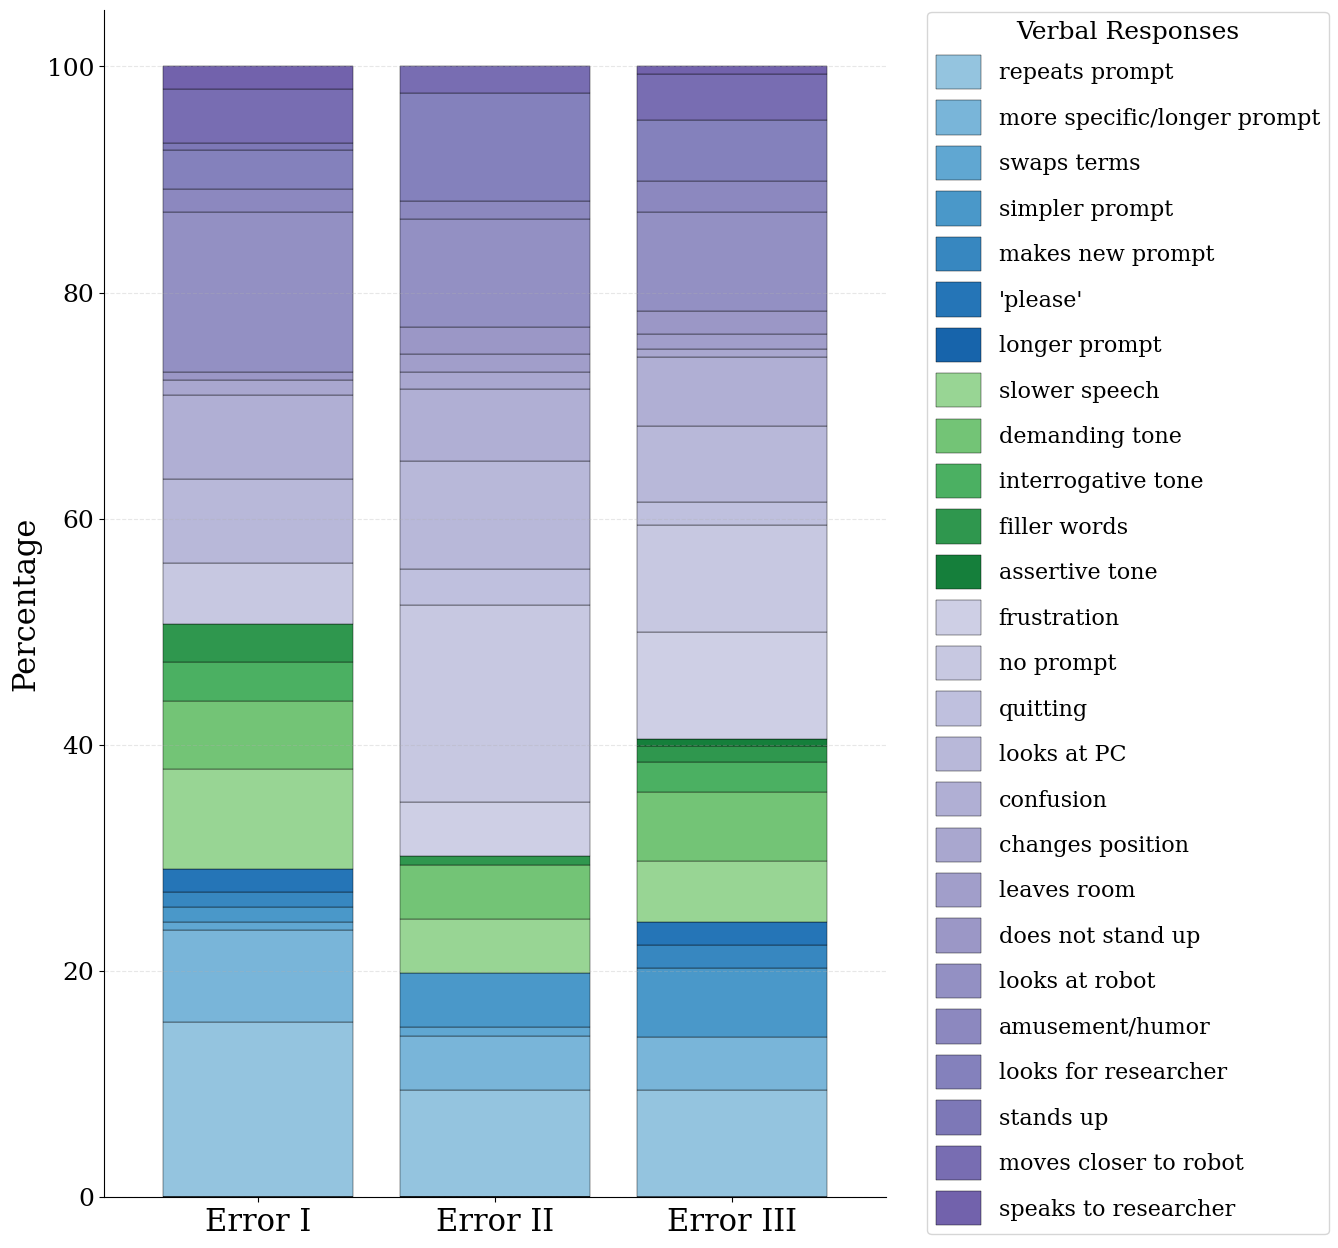


VERBAL RESPONSE ANALYSIS

Error 1:
  Total reactions: 148
error data: {'repeats prompt': 23, 'more specific/longer prompt': 12, 'swaps terms': 1, 'simpler prompt': 2, 'makes new prompt': 2, "'please'": 3, 'longer prompt': 0, 'slower speech': 13, 'demanding tone': 9, 'interrogative tone': 5, 'filler words': 5, 'assertive tone': 0, 'frustration': 0, 'no prompt': 8, 'quitting': 0, 'looks at PC': 11, 'confusion': 11, 'changes position': 2, 'leaves room': 0, 'does not stand up': 1, 'looks at robot': 21, 'amusement/humor': 3, 'looks for researcher': 5, 'stands up': 1, 'moves closer to robot': 7, 'speaks to researcher': 3}
error percentages: {'repeats prompt': 15.54054054054054, 'more specific/longer prompt': 8.108108108108109, 'swaps terms': 0.6756756756756757, 'simpler prompt': 1.3513513513513513, 'makes new prompt': 1.3513513513513513, "'please'": 2.027027027027027, 'longer prompt': 0.0, 'slower speech': 8.783783783783784, 'demanding tone': 6.081081081081082, 'interrogative tone': 3.37837

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def create_verbal_stacked_chart():
    """Create a stacked percentage bar chart focused on verbal responses with dynamic 'other' category"""
    
    # Use the expanded lists from your updated variables
    annotation_list = reprompting_list + verbal_tone_list
    
    # Define initial categories for this verbal-focused analysis
    verbal_categories = {
        "reprompting strategies": reprompting_list,
        "verbal tone or cadence": verbal_tone_list,
        "other": []  # Will be populated dynamically
    }
    
    # Use relevant colormaps from your updated category_colormaps
    verbal_colormaps = {
        "reprompting strategies": category_colormaps["reprompting strategies"],
        "verbal tone or cadence": category_colormaps["verbal tone or cadence"],
        "other": cm.Purples
    }
    
    def get_shaded_colors(cmap, labels, lightest=False):
        """Generate shaded colors for labels in a category"""
        if len(labels) == 0:
            return []
        elif len(labels) == 1:
            return [cmap(0.6)]
        else:
            if lightest:
                return cmap(np.linspace(0.3, 0.7, len(labels)))
            else:
                return cmap(np.linspace(0.4, 0.8, len(labels)))
    
    # Read the reactions data
    print("Loading reactions_between_errors.csv...")
    data = pd.read_csv('reactions_between_errors.csv')
    
    print(f"Loaded {len(data)} reaction events")
    print(f"Available subcode_readable values: {sorted(data['subcode_readable'].unique())}")
    
    # Identify labels that are in our main annotation list vs "other"
    data_processed = data.copy()
    data_processed['label_category'] = data_processed['subcode_readable'].apply(
        lambda x: x if x in annotation_list else "other"
    )
    
    # Find all the actual "other" labels that appear in the data
    all_labels = data['subcode_readable'].unique()
    other_labels = [label for label in all_labels if label not in annotation_list and pd.notna(label)]
    
    print(f"Found {len(other_labels)} 'other' labels: {other_labels}")
    
    # Add other labels to categories
    verbal_categories["other"].extend(other_labels)
    
    # Generate colors for all categories
    label_colors = {}
    for category, labels in verbal_categories.items():
        if len(labels) > 0:
            cmap = verbal_colormaps[category]
            lightest = (category == "other")  # Use lighter shades for "other" category
            shades = get_shaded_colors(cmap, labels, lightest=lightest)
            label_colors.update(dict(zip(labels, shades)))
    
    # Ensure "other" has a color even if no specific other labels
    if "other" not in label_colors:
        label_colors["other"] = cm.Purples(0.4)
    
    print(f"Color assignments: {list(label_colors.keys())}")
    
    # For the grouped analysis, we'll use individual other labels rather than just "other"
    data_for_grouping = data.copy()
    
    # Group by error and individual subcode_readable
    grouped_data = data_for_grouping.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    
    # Ensure we have all errors (1, 2, 3)
    grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
    
    # Create the column order: main annotations first, then other labels
    column_order = annotation_list + [label for label in other_labels if label in grouped_data.columns]
    
    # Add any missing columns with zeros
    for col in column_order:
        if col not in grouped_data.columns:
            grouped_data[col] = 0
    
    # Reindex with our desired column order
    grouped_data = grouped_data.reindex(columns=column_order, fill_value=0)
    
    print("Grouped data (raw counts):")
    print(grouped_data)
    
    # Calculate percentages
    row_sums = grouped_data.sum(axis=1)
    print(f"\nTotal reactions per error: {row_sums.to_dict()}")
    
    # Handle cases where there are no reactions for an error
    grouped_data_percentage = grouped_data.div(row_sums, axis=0).fillna(0) * 100
    
    print("Grouped data (percentages):")
    print(grouped_data_percentage.round(1))
    
    # Create the plot
    plt.figure(figsize=(14, 14), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Get colors for the plot
    colors = [label_colors.get(label, label_colors.get("other", cm.Purples(0.4))) 
              for label in grouped_data_percentage.columns]
    
    # Create stacked bar chart
    ax = grouped_data_percentage.plot(
        kind='bar', 
        stacked=True, 
        figsize=(14, 14), 
        width=0.8, 
        color=colors,
        edgecolor='black',
        linewidth=0.3
    )
    
    ax.set_facecolor('white')
    
    # Customize the plot
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(np.arange(len(grouped_data.index)), x_labels, fontsize=22, rotation=0)
    plt.xlabel("", fontsize=22)
    plt.ylabel("Percentage", fontsize=22)
    plt.yticks(fontsize=18)
    
    # Add legend
    plt.legend(
        title="Verbal Responses",
        title_fontsize=18,
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=16,
        handleheight=2,
        handlelength=2,
        borderaxespad=0.1
    )
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add horizontal grid lines
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('plots/percentage_verbal_annotations.png', format='png', dpi=500, facecolor="white", bbox_inches='tight')
    print("Plot saved to 'plots/percentage_verbal_annotations.png'")
    
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("VERBAL RESPONSE ANALYSIS")
    print("="*60)
    
    for error_num in [1, 2, 3]:
        print(f"\nError {error_num}:")
        total_reactions = row_sums.get(error_num, 0)
        print(f"  Total reactions: {total_reactions}")
        
        if total_reactions > 0:
            error_data = grouped_data.loc[error_num]
            error_percentages = grouped_data_percentage.loc[error_num]
            print("error data:", error_data.to_dict())
            print("error percentages:", error_percentages.to_dict())
            
            # Separate main categories from other
            print("  MAIN VERBAL RESPONSES:")
            for reaction in annotation_list:
                if reaction in grouped_data.columns:
                    count = error_data.get(reaction, 0)
                    percentage = error_percentages.get(reaction, 0)
                    print(count)
                    if count > 0:
                        print(f"    {reaction}: {count} ({percentage:.1f}%)")
            
            if other_labels:
                print("  OTHER RESPONSES:")
                for reaction in other_labels:
                    if reaction in grouped_data.columns:
                        count = error_data.get(reaction, 0)
                        percentage = error_percentages.get(reaction, 0)
                        if count > 0:
                            print(f"    {reaction}: {count} ({percentage:.1f}%)")
        else:
            print("  No reactions recorded")
    
    # Category-level summary
    print(f"\n" + "="*60)
    print("CATEGORY TOTALS")
    print("="*60)
    
    for category, reactions in verbal_categories.items():
        if not reactions:  # Skip empty categories
            continue
            
        print(f"\n{category.upper()}:")
        category_totals = {}
        for error_num in [1, 2, 3]:
            total = sum(grouped_data.loc[error_num, reaction] 
                       for reaction in reactions 
                       if reaction in grouped_data.columns)
            category_totals[error_num] = total
        
        total_overall = sum(category_totals.values())
        print(f"  Total across all errors: {total_overall}")
        for error_num, total in category_totals.items():
            if row_sums.get(error_num, 0) > 0:
                percentage = (total / row_sums[error_num]) * 100
                print(f"  Error {error_num}: {total} reactions ({percentage:.1f}% of error)")
            else:
                print(f"  Error {error_num}: {total} reactions (no data for this error)")

# Alternative function for custom verbal analysis
def create_custom_verbal_chart(main_annotations, other_threshold=0, title_suffix=""):
    """
    Create a custom verbal chart with specified main annotations
    
    Parameters:
    - main_annotations: List of main annotations to highlight
    - other_threshold: Minimum count for an annotation to be shown separately (others grouped as "other")
    - title_suffix: Additional text for the title and filename
    """
    
    print(f"\n" + "="*60)
    print(f"CREATING CUSTOM VERBAL CHART{': ' + title_suffix if title_suffix else ''}")
    print("="*60)
    
    # Read the data
    data = pd.read_csv('reactions_between_errors.csv')
    
    # Group by error and reaction
    grouped_data = data.groupby(['error', 'subcode_readable']).size().unstack(fill_value=0)
    grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
    
    # Determine which columns to show separately vs group as "other"
    total_counts = grouped_data.sum(axis=0)
    
    separate_columns = main_annotations.copy()
    for col in grouped_data.columns:
        if col not in main_annotations and total_counts[col] >= other_threshold:
            separate_columns.append(col)
    
    # Group remaining columns as "other"
    other_columns = [col for col in grouped_data.columns if col not in separate_columns]
    
    if other_columns:
        grouped_data['other'] = grouped_data[other_columns].sum(axis=1)
        final_columns = separate_columns + ['other']
    else:
        final_columns = separate_columns
    
    # Filter to final columns
    grouped_data_final = grouped_data.reindex(columns=final_columns, fill_value=0)
    
    # Calculate percentages
    row_sums = grouped_data_final.sum(axis=1)
    grouped_data_percentage = grouped_data_final.div(row_sums, axis=0).fillna(0) * 100
    
    # Simple color scheme
    colors = cm.Set2(np.linspace(0, 1, len(final_columns)))
    
    # Create plot
    plt.figure(figsize=(12, 12), facecolor='white')
    plt.rcParams.update({'font.size': 18})
    
    ax = grouped_data_percentage.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 12),
        width=0.9,
        color=colors,
        edgecolor='black',
        linewidth=0.3
    )
    
    # Formatting
    x_labels = ['Error I', 'Error II', 'Error III']
    plt.xticks(range(3), x_labels, rotation=0)
    plt.xlabel("")
    plt.ylabel("Percentage")
    title = f"Verbal Responses Across Errors{': ' + title_suffix if title_suffix else ''}"
    plt.title(title, fontsize=20, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    filename_suffix = f"_custom_verbal{'_' + title_suffix.lower().replace(' ', '_') if title_suffix else ''}"
    plt.savefig(f'plots/percentage{filename_suffix}.png', format='png', dpi=500, bbox_inches='tight')
    plt.show()
    
    print(f"Custom verbal chart saved")
    
    if other_columns:
        print(f"Grouped as 'other': {other_columns}")

# Run the main function
create_verbal_stacked_chart()

# Example custom charts
# create_custom_verbal_chart(
#     main_annotations=["repeats prompt", "simpler prompt", "more specific/longer prompt"],
#     other_threshold=2,
#     title_suffix="Prompting Focus"
# )

Creating response times dataset for: ['more specific/longer prompt', 'simpler prompt', 'repeats prompt', 'swaps terms']
Step 1: Extracting error start times...
Found 154 error start times
Step 2: Loading and filtering reactions...
Found 93 reactions with relevant labels
Step 3: Calculating response times...
Created dataset with 91 response time measurements
Response times dataset saved to 'response_times.csv'

Response times summary:
       count      mean       std    min      25%     50%      75%     max
error                                                                    
1       36.0  2.089306  2.571997  0.000  0.30000  0.9675  3.22300   9.760
2       25.0  2.934960  3.384933  0.025  0.75500  1.0850  3.65500  11.468
3       30.0  4.354133  4.428857  0.000  1.04275  2.5825  6.65325  18.300

Reaction types included:
reaction_type
repeats prompt                 47
more specific/longer prompt    25
simpler prompt                 17
swaps terms                     2
Name: count, dty

/tmp/ipykernel_61261/3295178793.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Boxplot saved to 'plots/response_times_boxplot_prompting.png'


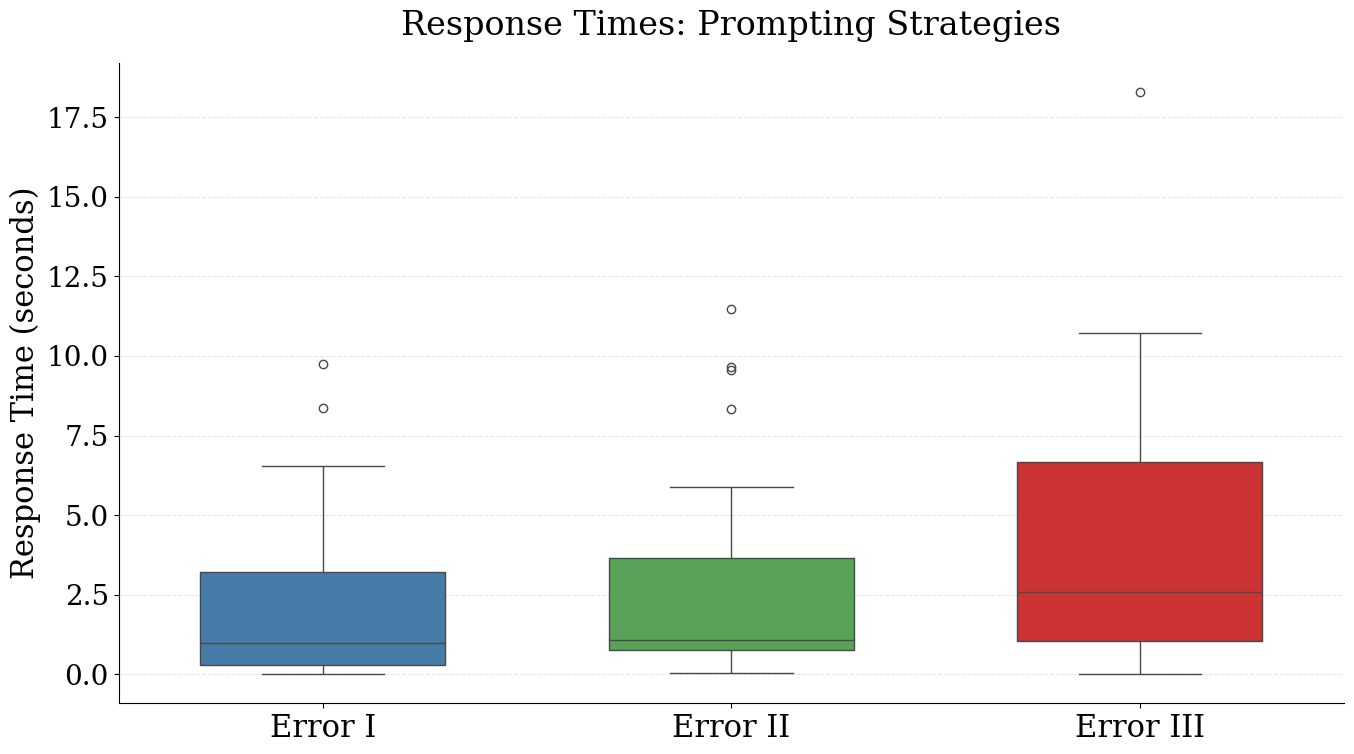


RESPONSE TIME STATISTICS

Error 1:
  Count: 36 responses
  Mean: 2.09s
  Median: 0.97s
  Std: 2.57s
  Q1: 0.30s
  Q3: 3.22s
  Range: 0.00s - 9.76s
  Outliers: 2 ([8.361999999999966, 9.759999999999991])

Error 2:
  Count: 25 responses
  Mean: 2.93s
  Median: 1.08s
  Std: 3.38s
  Q1: 0.75s
  Q3: 3.65s
  Range: 0.02s - 11.47s
  Outliers: 4 ([8.33499999999998, 9.57000000000005, 11.468000000000018, 9.639999999999986])

Error 3:
  Count: 30 responses
  Mean: 4.35s
  Median: 2.58s
  Std: 4.43s
  Q1: 1.04s
  Q3: 6.65s
  Range: 0.00s - 18.30s
  Outliers: 1 ([18.300000000000068])
Creating response times dataset for: ['repeats prompt', 'more specific/longer prompt', 'swaps terms', 'simpler prompt', 'slower speech', 'demanding tone', 'interrogative tone', 'filler words']
Step 1: Extracting error start times...
Found 154 error start times
Step 2: Loading and filtering reactions...
Found 161 reactions with relevant labels
Step 3: Calculating response times...
Created dataset with 156 response time 

/tmp/ipykernel_61261/3295178793.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Boxplot saved to 'plots/response_times_boxplot_verbal.png'


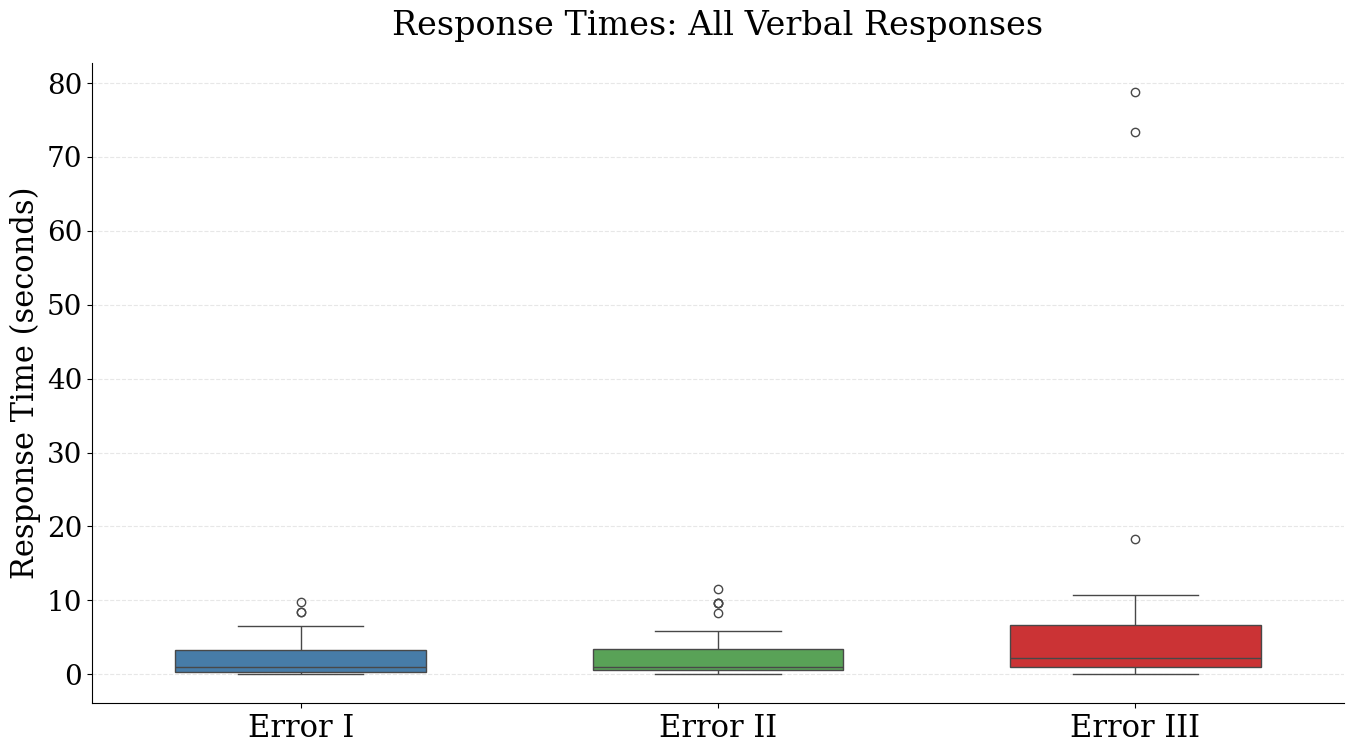


RESPONSE TIME STATISTICS

Error 1:
  Count: 67 responses
  Mean: 2.08s
  Median: 1.02s
  Std: 2.42s
  Q1: 0.35s
  Q3: 3.30s
  Range: 0.00s - 9.76s
  Outliers: 3 ([8.361999999999966, 8.361999999999966, 9.759999999999991])

Error 2:
  Count: 38 responses
  Mean: 2.57s
  Median: 0.96s
  Std: 3.14s
  Q1: 0.54s
  Q3: 3.41s
  Range: 0.02s - 11.47s
  Outliers: 5 ([8.33499999999998, 9.57000000000005, 9.57000000000005, 11.468000000000018, 9.639999999999986])

Error 3:
  Count: 51 responses
  Mean: 6.79s
  Median: 2.24s
  Std: 14.67s
  Q1: 1.03s
  Q3: 6.69s
  Range: 0.00s - 78.80s
  Outliers: 3 ([18.300000000000068, 73.37800000000004, 78.80499999999995])
Creating response times dataset for: ['amusement/humor', 'confusion', 'frustration']
Step 1: Extracting error start times...
Found 154 error start times
Step 2: Loading and filtering reactions...
Found 57 reactions with relevant labels
Step 3: Calculating response times...
Created dataset with 52 response time measurements
Response times datase

/tmp/ipykernel_61261/3295178793.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Boxplot saved to 'plots/response_times_boxplot_emotional.png'


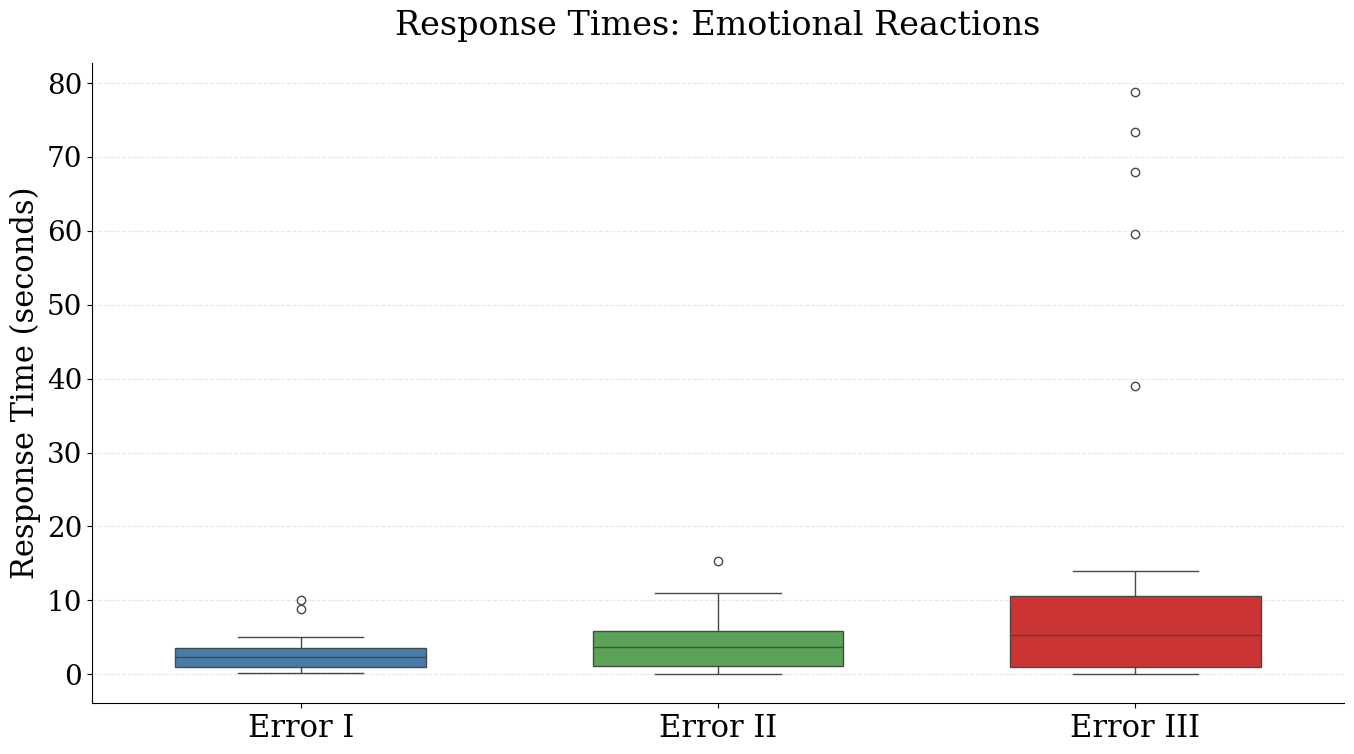


RESPONSE TIME STATISTICS

Error 1:
  Count: 14 responses
  Mean: 3.09s
  Median: 2.33s
  Std: 3.09s
  Q1: 0.95s
  Q3: 3.61s
  Range: 0.13s - 10.09s
  Outliers: 2 ([10.09499999999997, 8.850000000000023])

Error 2:
  Count: 14 responses
  Mean: 4.52s
  Median: 3.75s
  Std: 4.34s
  Q1: 1.08s
  Q3: 5.86s
  Range: 0.08s - 15.32s
  Outliers: 1 ([15.319999999999936])

Error 3:
  Count: 24 responses
  Mean: 16.80s
  Median: 5.37s
  Std: 25.67s
  Q1: 1.03s
  Q3: 10.65s
  Range: 0.02s - 78.80s
  Outliers: 5 ([39.03199999999998, 59.608000000000004, 67.90300000000002, 73.37800000000004, 78.80499999999995])


In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def time_to_seconds(time_str):
    """Convert HH:MM:SS.fff to total seconds"""
    try:
        parts = time_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds_parts = parts[2].split('.')
        seconds = int(seconds_parts[0])
        milliseconds = int(seconds_parts[1]) if len(seconds_parts) > 1 else 0
        
        total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    except:
        return np.nan

def create_response_times_dataset(relevant_labels=None):
    """Create a dataset of response times from error start to reaction start"""
    
    if relevant_labels is None:
        # Default to prompting strategies (using readable subcode names)
        relevant_labels = [
            "more specific/longer prompt", 
            "simpler prompt", 
            "repeats prompt", 
            "swaps terms"
        ]
    
    print(f"Creating response times dataset for: {relevant_labels}")
    
    # Step 1: Extract error start times from processed_codes.csv
    print("Step 1: Extracting error start times...")
    df = pd.read_csv("processed_codes.csv")
    df['start_seconds'] = df['start'].apply(time_to_seconds)
    df['end_seconds'] = df['end'].apply(time_to_seconds)
    
    # Get error start times (when each error interval begins)
    error_starts = []
    participants = df['participant_id'].unique()
    
    for participant in participants:
        p_data = df[df['participant_id'] == participant].sort_values('start_seconds')
        nounderstanding = p_data[p_data['subcode'] == '8nounderstanding3x']
        
        for i, (_, row) in enumerate(nounderstanding.iterrows()):
            error_num = i + 1  # Error 1, 2, 3
            if error_num <= 3:  # We only track up to 3 errors
                error_starts.append({
                    'participant_id': participant,
                    'error': error_num,
                    'error_start_time': row['end_seconds']  # Error interval starts when nounderstanding ends
                })
    
    error_starts_df = pd.DataFrame(error_starts)
    print(f"Found {len(error_starts_df)} error start times")
    
    # Step 2: Load filtered reactions
    print("Step 2: Loading and filtering reactions...")
    reactions_df = pd.read_csv('reactions_between_errors.csv')
    
    # Filter to relevant labels
    filtered_reactions = reactions_df[reactions_df['subcode_readable'].isin(relevant_labels)].copy()
    print(f"Found {len(filtered_reactions)} reactions with relevant labels")
    
    if len(filtered_reactions) == 0:
        print("WARNING: No reactions found with specified labels!")
        print(f"Available labels: {reactions_df['subcode_readable'].unique()}")
        return pd.DataFrame()
    
    # Convert reaction start times to seconds
    filtered_reactions['start_seconds'] = filtered_reactions['start'].apply(time_to_seconds)
    
    # Step 3: Match reactions with error start times to calculate response times
    print("Step 3: Calculating response times...")
    results = []
    
    for _, reaction_row in filtered_reactions.iterrows():
        participant = reaction_row['participant_id']
        error = reaction_row['error']
        reaction_start = reaction_row['start_seconds']
        
        # Find the matching error start time
        matching_error = error_starts_df[
            (error_starts_df['participant_id'] == participant) & 
            (error_starts_df['error'] == error)
        ]
        
        if not matching_error.empty:
            error_start_time = matching_error.iloc[0]['error_start_time']
            response_time = reaction_start - error_start_time
            
            # Only include positive response times (should always be positive in our data)
            if response_time >= 0:
                results.append({
                    'participant_id': participant,
                    'error': error,
                    'response_time': response_time,
                    'reaction_type': reaction_row['subcode_readable']
                })
            else:
                print(f"Warning: Negative response time for {participant}, error {error}: {response_time:.3f}s")
    
    results_df = pd.DataFrame(results)
    print(f"Created dataset with {len(results_df)} response time measurements")
    
    return results_df

def create_response_times_boxplot(relevant_labels=None, save_filename="response_times_boxplot.png", title_suffix=""):
    """Create boxplot showing response time distributions by error"""
    
    # Create the response times dataset
    response_times_df = create_response_times_dataset(relevant_labels)
    
    if len(response_times_df) == 0:
        print("No data available for boxplot")
        return
    
    # Save the dataset
    response_times_df.to_csv("response_times.csv", index=False)
    print("Response times dataset saved to 'response_times.csv'")
    
    print("\nResponse times summary:")
    print(response_times_df.groupby('error')['response_time'].describe())
    
    print(f"\nReaction types included:")
    print(response_times_df['reaction_type'].value_counts())
    
    # Create the boxplot
    plt.figure(figsize=(14, 8), facecolor='white')
    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'font.family': 'serif'})
    
    # Create boxplot with custom colors
    sns.boxplot(
        x='error', 
        y='response_time', 
        data=response_times_df, 
        palette=["#377EB8", "#4DAF4A", "#E41A1C"],  # Blue, Green, Red
        width=0.6
    )
    
    # Customize the plot
    plt.xlabel("", fontsize=22)
    plt.ylabel("Response Time (seconds)", fontsize=22)
    plt.xticks([0, 1, 2], ["Error I", "Error II", "Error III"], fontsize=22)
    plt.yticks(fontsize=20)
    
    # Add title if specified
    if title_suffix:
        plt.title(f"Response Times: {title_suffix}", fontsize=24, pad=20)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add light grid
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f'plots/{save_filename}', format='png', dpi=500, facecolor="white", bbox_inches='tight')
    print(f"Boxplot saved to 'plots/{save_filename}'")
    
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("RESPONSE TIME STATISTICS")
    print("="*60)
    
    for error_num in [1, 2, 3]:
        error_data = response_times_df[response_times_df['error'] == error_num]
        if len(error_data) > 0:
            print(f"\nError {error_num}:")
            print(f"  Count: {len(error_data)} responses")
            print(f"  Mean: {error_data['response_time'].mean():.2f}s")
            print(f"  Median: {error_data['response_time'].median():.2f}s")
            print(f"  Std: {error_data['response_time'].std():.2f}s")
            print(f"  Q1: {error_data['response_time'].quantile(0.25):.2f}s")
            print(f"  Q3: {error_data['response_time'].quantile(0.75):.2f}s")
            print(f"  Range: {error_data['response_time'].min():.2f}s - {error_data['response_time'].max():.2f}s")
            
            # Show outliers if any
            Q1 = error_data['response_time'].quantile(0.25)
            Q3 = error_data['response_time'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = error_data[(error_data['response_time'] < lower_bound) | 
                                 (error_data['response_time'] > upper_bound)]
            if len(outliers) > 0:
                print(f"  Outliers: {len(outliers)} ({outliers['response_time'].tolist()})")
        else:
            print(f"\nError {error_num}: No data")

# Example usage - Prompting Strategies
prompting_labels = [
    "more specific/longer prompt", 
    "simpler prompt", 
    "repeats prompt", 
    "swaps terms"
]

create_response_times_boxplot(
    relevant_labels=prompting_labels,
    save_filename="response_times_boxplot_prompting.png",
    title_suffix="Prompting Strategies"
)

# Example usage - All Verbal Responses
verbal_labels = [
    "repeats prompt", 
    "more specific/longer prompt", 
    "swaps terms", 
    "simpler prompt",
    "slower speech", 
    "demanding tone", 
    "interrogative tone", 
    "filler words"
]

create_response_times_boxplot(
    relevant_labels=verbal_labels,
    save_filename="response_times_boxplot_verbal.png",
    title_suffix="All Verbal Responses"
)

# Example usage - Emotional Reactions
emotional_labels = [
    "amusement/humor", 
    "confusion", 
    "frustration"
]

create_response_times_boxplot(
    relevant_labels=emotional_labels,
    save_filename="response_times_boxplot_emotional.png",
    title_suffix="Emotional Reactions"
)

# Function to compare multiple reaction categories in one plot
def create_multi_category_boxplot():
    """Create a more complex boxplot comparing different reaction categories"""
    
    categories = {
        "Prompting": ["repeats prompt", "more specific/longer prompt", "swaps terms", "simpler prompt"],
        "Tone": ["slower speech", "demanding tone", "interrogative tone", "filler words"],
        "Emotion": ["amusement/humor", "confusion", "frustration"],
        "Disengagement": ["looks at PC", "quitting", "changes position"]
    }
    
    all_data = []
    
    for category_name, labels in categories.items():
        response_times_df = create_response_times_dataset(labels)
        if len(response_times_df) > 0:
            response_times_df['category'] = category_name
            all_data.append(response_times_df)
    
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Create subplot for each category
        fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='white')
        axes = axes.flatten()
        
        for i, (category_name, _) in enumerate(categories.items()):
            category_data = combined_df[combined_df['category'] == category_name]
            
            if len(category_data) > 0:
                sns.boxplot(
                    x='error', 
                    y='response_time', 
                    data=category_data,
                    palette=["#377EB8", "#4DAF4A", "#E41A1C"],
                    ax=axes[i]
                )
                
                axes[i].set_title(f"{category_name} Response Times", fontsize=16, fontweight='bold')
                axes[i].set_xlabel("")
                axes[i].set_ylabel("Response Time (s)", fontsize=14)
                axes[i].set_xticklabels(["Error I", "Error II", "Error III"])
                axes[i].grid(axis='y', alpha=0.3, linestyle='--')
            else:
                axes[i].text(0.5, 0.5, f'No data\nfor {category_name}', 
                            ha='center', va='center', transform=axes[i].transAxes, fontsize=14)
                axes[i].set_title(f"{category_name} Response Times", fontsize=16, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('plots/response_times_boxplot_comparison.png', format='png', dpi=500, bbox_inches='tight')
        plt.show()
        
        print("Multi-category comparison saved to 'plots/response_times_boxplot_comparison.png'")
    else:
        print("No data available for multi-category comparison")

# Uncomment to create the multi-category comparison
# create_multi_category_boxplot()